In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime



from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob

In [2]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



In [3]:
xr.__version__

'0.16.1'

In [ ]:
all_variables_3L = xr.open_dataset('all_variables_3L_aug2020.nc')
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()


In [ ]:
all_variables_3Ltemp = xr.open_dataset('all_variables_3L_oct2020_tas_2m.nc')
all_variables_T3temp = all_variables_3Ltemp.stack(St=('S','time'))
all_variables_T3temp = all_variables_T3temp.swap_dims({'St':'target_time'})
all_variables_T3temp = all_variables_T3temp.unstack()


In [ ]:
all_variables_3Lcape = xr.open_dataset('all_variables_3L_oct2020_cape.nc')
all_variables_T3cape = all_variables_3Lcape.stack(St=('S','time'))
all_variables_T3cape = all_variables_T3cape.swap_dims({'St':'target_time'})
all_variables_T3cape = all_variables_T3cape.unstack()


In [ ]:
all_variables_3Ltd = xr.open_dataset('all_variables_3L_oct2020_tdps_2m.nc')
all_variables_T3td = all_variables_3Ltd.stack(St=('S','time'))
all_variables_T3td = all_variables_T3td.swap_dims({'St':'target_time'})
all_variables_T3td = all_variables_T3td.unstack()


In [ ]:
all_variables_3Lwap = xr.open_dataset('all_variables_3L_oct2020_wap_500.nc')
all_variables_T3wap = all_variables_3Lwap.stack(St=('S','time'))
all_variables_T3wap = all_variables_T3wap.swap_dims({'St':'target_time'})
all_variables_T3wap = all_variables_T3wap.unstack()


In [ ]:
del all_variables_3L, all_variables_3Ltemp, all_variables_3Lcape, all_variables_3Ltd, all_variables_3Lwap

In [ ]:
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]


In [ ]:
# del smooth_clim_cauchy

In [ ]:
smooth_clim_cauchy = xr.open_dataset('smooth_clim_cauchy_oct2020.nc')
smooth_clim_cauchy
smooth_clim_cauchy_moreQ=xr.open_dataset('smooth_clim_cauchy_oct2020_moreQ.nc')

In [ ]:
smooth_clim_cauchy.mean('target_clim').isel(Lbeg=2).pr_sfc.plot()

In [ ]:
smooth_clim_cauchy = smooth_clim_cauchy.isel(Lbeg=0)
smooth_clim_cauchy

# Calculate occurrences Y>85% with GEFS

In [ ]:
all_variables_T3

In [ ]:
smooth_clim_cauchy = smooth_clim_cauchy.drop('Lbeg')

In [ ]:
smooth_clim_cauchy

In [ ]:
smooth_clim_cauchy_moreQ

In [ ]:
smooth_clim_cauchy_moreQ = smooth_clim_cauchy_moreQ.squeeze()
smooth_clim_cauchy_moreQ = smooth_clim_cauchy_moreQ.drop('Lbeg')

In [ ]:
smooth_clim_cauchy_moreQ.sel(quantile=0.75).squeeze().drop('quantile')

In [18]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")

diff_ds = []
diff_ds05 = []
diff_ds05N = []
diff_ds075 = []
diff_ds075N = []
value_ds = []
value_dsT = []
value_dsC= []
for iT in target_all:
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    temptemp = all_variables_T3temp.where((all_variables_T3temp.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3temp.target_time.dt.day==iT.day.values[0]), drop=True)
    tempcape = all_variables_T3cape.where((all_variables_T3cape.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3cape.target_time.dt.day==iT.day.values[0]), drop=True)
    which_calendar_day = ((smooth_clim_cauchy.target_clim.dt.month==iT.month.values[0])&
                              (smooth_clim_cauchy.target_clim.dt.day==iT.day.values[0]))
    smooth_data = smooth_clim_cauchy.where(which_calendar_day, drop=True)
    smooth_data0_5 = smooth_clim_cauchy_moreQ.sel(quantile=0.5).where(which_calendar_day, drop=True)
    smooth_data0_75 = smooth_clim_cauchy_moreQ.sel(quantile=0.75).where(which_calendar_day, drop=True)
    smooth_data0_5 = smooth_data0_5.drop('quantile')
    smooth_data0_75 = smooth_data0_75.drop('quantile')
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
    diff_B  = []
    diff_B05  = []
    diff_B075  = []
    diff_B05N  = []
    diff_B075N  = []
    value_B = []
    value_BT = []
    value_BC = []
#     for different_lead1, different_lead2 in zip(np.array([8,10,12])-1, np.array([10,12,14])-1 ):
    for different_lead1, different_lead2 in zip(np.array([8,10,12])-1, np.array([8,10,12])-1 ):
#     for different_lead1, different_lead2 in zip(np.array([8,10,12])-1, np.array([12,14,16])-1 ):
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        pick_lead = ((y_arr>=np.timedelta64(different_lead1,'D'))&
                         (y_arr<np.timedelta64(different_lead2+1,'D')))
        temp2 = temp.sel(target_time=pick_lead)
        tempcape2 = tempcape.sel(target_time=pick_lead)
        temptemp2 = temptemp.sel(target_time=pick_lead)
        
        #to match coordinates of the data
        smooth_data2 = smooth_data.rename({'target_clim':'target_time'})
        smooth_data205 = smooth_data0_5.rename({'target_clim':'target_time'})
        smooth_data2075 = smooth_data0_75.rename({'target_clim':'target_time'})
        # anomalies from climatology
        diff  = temp2 - smooth_data2.isel(target_time=0) 
        diff.coords['Lead'] = different_lead1+1 
        diff = diff.expand_dims('Lead') 
        
        diff05  = temp2 - smooth_data205.isel(target_time=0)  
        diff05.coords['Lead'] = different_lead1+1
        diff05 = diff05.expand_dims('Lead')
        diff05N = diff05/smooth_data205.isel(target_time=0)  
        diff075  = temp2 - smooth_data2075.isel(target_time=0) 
        diff075.coords['Lead'] = different_lead1+1
        diff075 = diff075.expand_dims('Lead')
        diff075N = diff075/smooth_data2075.isel(target_time=0)  
        #actual rainfall values
        temp2.coords['Lead'] = different_lead1+1
        temp2 = temp2.expand_dims('Lead')
        # actual cape values
        tempcape2.coords['Lead'] = different_lead1+1
        tempcape2 = tempcape2.expand_dims('Lead')
        # actual temperature values
        
        temptemp2.coords['Lead'] = different_lead1+1
        temptemp2 = temptemp2.expand_dims('Lead')
        
        diff_B.append(diff)
        diff_B05.append(diff05)
        diff_B075.append(diff075)
        diff_B05N.append(diff05N)
        diff_B075N.append(diff075N)
        value_B.append(temp2)
        value_BT.append(temptemp2)
        value_BC.append(tempcape2)
    diff_C = xr.concat(diff_B, dim='Lead')
    diff_C05 = xr.concat(diff_B05, dim='Lead')
    diff_C075 = xr.concat(diff_B075, dim='Lead')
    diff_C05N = xr.concat(diff_B05N, dim='Lead')
    diff_C075N = xr.concat(diff_B075N, dim='Lead')
    value_C = xr.concat(value_B, dim='Lead')
    value_CT = xr.concat(value_BT, dim='Lead')
    value_CC = xr.concat(value_BC, dim='Lead')
    diff_ds.append(diff_C)
    diff_ds05.append(diff_C05)
    diff_ds075.append(diff_C075)
    diff_ds05N.append(diff_C05N)
    diff_ds075N.append(diff_C075N)
    value_ds.append(value_C)
    value_dsT.append(value_CT)
    value_dsC.append(value_CC)
    
# # check_85 = xr.combine_by_coords(check_85)    
# check_85_0 = xr.concat(check_85, dim='target_time')

In [20]:
diff2 = xr.concat(diff_ds, dim='target_time')
diff205 = xr.concat(diff_ds05, dim='target_time')
diff2075 = xr.concat(diff_ds075, dim='target_time')
diff205N = xr.concat(diff_ds05N, dim='target_time')
diff2075N = xr.concat(diff_ds075N, dim='target_time')


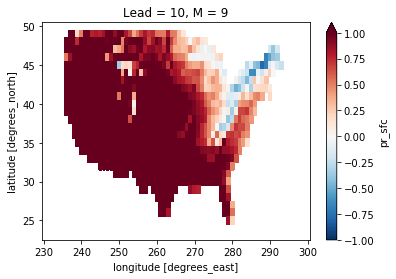

In [29]:
np.log(diff205N.isel(Lead=1, M=9).mean('target_time').pr_sfc).plot(vmax=1)

In [30]:
value2 = xr.concat(value_ds, dim='target_time')
value2T = xr.concat(value_dsT, dim='target_time')
value2C = xr.concat(value_dsC, dim='target_time')

In [31]:
diff3 = diff2.sortby('target_time')
diff305 = diff205.sortby('target_time')
diff305N = diff205N.sortby('target_time')
diff3075 = diff2075.sortby('target_time')
value3 = value2.sortby('target_time')
value3T = value2T.sortby('target_time')
value3C = value2C.sortby('target_time')


In [32]:
diff305 = diff305.squeeze()
diff305
diff305N = diff305N.squeeze()
diff305
diff3075 = diff3075.squeeze()
diff3075

<xarray.Dataset>
Dimensions:      (Lead: 3, M: 10, lat: 28, lon: 71, target_time: 2814)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * Lead         (Lead) int64 8 10 12
  * lat          (lat) float64 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * target_time  (target_time) datetime64[ns] 1999-01-13T12:00:00 ... 2017-01-08T12:00:00
    St           (Lead, target_time) object (Timestamp('1999-01-06 00:00:00'), Timedelta('7 days 12:00:00')) ... (Timestamp('2016-12-28 00:00:00'), Timedelta('11 days 12:00:00'))
Data variables:
    pr_sfc       (Lead, M, lat, lon, target_time) float64 nan nan ... nan nan

# Calculate occurrences Y>85% with NARR and CPC

In [33]:
narr_clim_test_3d=xr.open_dataset('narr_clim_test_3d_aug2020.nc')

In [431]:
narr_clim_test_3d

<xarray.Dataset>
Dimensions:      (lat: 28, lon: 71, quant: 5, target_clim: 365, window: 3)
Coordinates:
  * quant        (quant) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * window       (window) int64 7 15 31
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    apcp         (target_clim, window, quant, lat, lon) float64 ...

In [34]:
cpc_clim_test_3d=xr.open_dataset('cpc_clim_test_3d_aug2020.nc')

In [35]:
import xesmf as xe

In [36]:
ds_out =smooth_clim_cauchy[['lon','lat']]
ds_out

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 71)
Coordinates:
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    *empty*

In [37]:
# CPC data all
cpc1 = xr.open_dataset('https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.RETRO/.rain/Y/25/50/RANGE/T/(1999)/(2006)/RANGEEDGES/dods')
cpc2 = xr.open_dataset('https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.CONUS/.v1p0/.REALTIME/.rain/Y/25/50/RANGE/T/(2007)/(2016)/RANGEEDGES/dods')
cpc1 = cpc1.rename({'T':'time','X':'lon','Y':'lat'})
cpc2 = cpc2.rename({'T':'time','X':'lon','Y':'lat'})
cpc1.coords['lon'] = cpc1.lon.values+360
cpc2.coords['lon'] = cpc2.lon.values+360
regridderc = xe.Regridder(cpc2, ds_out, 'bilinear')
cpc1_out = regridderc(cpc1)
cpc2_out = regridderc(cpc2)

cpc_out = xr.combine_by_coords([cpc1_out, cpc2_out])
cpc_out = cpc_out.rolling(time=3, center=False).sum()
cpc_out.coords['time'] = cpc_out.time.values-np.timedelta64(2,'D')

Overwrite existing file: bilinear_101x300_28x71.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable rain as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable rain as the horizontal dimensions for this dataset.


In [38]:
# NARR all
narr_ls=[]
for iy in np.arange(1999, 2017):
    temp = xr.open_dataset('/crunch/c0/NARR/3_hr_all/apcp/apcp.'+np.str(iy)+'.nc',
                          drop_variables='Lambert_Conformal')
    # aggregate to daily
    temp = temp.resample(time='1D').sum()
#     print(temp)
#     pause
    narr_ls.append(temp)
    del temp
    
temp_latlon = narr_ls[0][['lat','lon']]
narr_ds = xr.combine_by_coords(narr_ls)
narr_ds = narr_ds.drop('lon')
narr_ds.coords['lon']=temp_latlon.lon

tempnarr = narr_ds.rolling(time=3, center=False).sum()
tempnarr.coords['time'] = tempnarr.time.values-np.timedelta64(2,'D')

tempnarr = tempnarr.drop(['x','y'])
regridder = xe.Regridder(tempnarr, ds_out, 'bilinear')
narr_out = regridder(tempnarr)


Overwrite existing file: bilinear_277x349_28x71.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('y', 'x') from data variable apcp as the horizontal dimensions for this dataset.


# NARR

In [39]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")

diff_ds_narr = []
value_ds_narr = []
for iT in target_all:
    # extract values that correspond to the target dates
    temp = narr_out.where((narr_out.time.dt.month==iT.month.values[0])&
                          (narr_out.time.dt.day==iT.day.values[0]), drop=True)
    smooth_data = narr_clim_test_3d.isel(window=2).isel(quant=4).where((narr_clim_test_3d.target_clim.dt.month==iT.month.values[0])&
                              (narr_clim_test_3d.target_clim.dt.day==iT.day.values[0]), drop=True)
    #to match coordinates of the data
    smooth_data = smooth_data.rename({'target_clim':'time'})
    diff  = temp - smooth_data.isel(time=0) 
    diff_ds_narr.append(diff)
    value_ds_narr.append(temp )
diff_ds_narr2 = xr.concat(diff_ds_narr, dim='time')
diff_ds_narr3 = diff_ds_narr2.sortby('time')

value_ds_narr2 = xr.concat(value_ds_narr, dim='time')
value_ds_narr3 = value_ds_narr2.sortby('time')


### cleaning up the target_time and extracting the days for which I have NARR

In [40]:
cc = diff3.target_time-np.timedelta64(12, 'h')
cc = cc.sel(target_time=slice(diff_ds_narr3.time[0],diff_ds_narr3.time[-1]))
diff4 = diff3.sel(target_time=slice(diff_ds_narr3.time[0],diff_ds_narr3.time[-1]))
# transforming negative to 0 and positive to 1
diff5 = xr.where(diff4.pr_sfc>0,1,0)
diff4b = diff4.pr_sfc
# diff4b

In [42]:
diff405 = diff305.sel(target_time=diff4.target_time)
# transforming negative to 0 and positive to 1
diff505 = xr.where(diff405.pr_sfc>0,1,0)
diff4b05 = diff405.pr_sfc

In [41]:
diff405N = diff305N.sel(target_time=diff4.target_time)
# transforming negative to 0 and positive to 1
diff505N = xr.where(diff405N.pr_sfc>0,1,0)
diff4b05N = diff405N.pr_sfc

In [43]:
diff4075 = diff3075.sel(target_time=diff4.target_time)
# transforming negative to 0 and positive to 1
diff5075 = xr.where(diff4075.pr_sfc>0,1,0)
diff4b075 = diff4075.pr_sfc

In [44]:
# cc = value3.target_time-np.timedelta64(12, 'h')
# cc = cc.sel(target_time=slice(diff_ds_narr3.time[0],diff_ds_narr3.time[-1]))
value4 = value3.sel(target_time=diff4.target_time)
value4B = value4.pr_sfc

In [45]:
# cc = value3T.target_time-np.timedelta64(12, 'h')
# cc = cc.sel(target_time=slice(diff_ds_narr3.time[0],diff_ds_narr3.time[-1]))
value4T = value3T.sel(target_time=diff4.target_time)
value4BT = value4T.tas_2m

In [46]:
# cc = value3C.target_time-np.timedelta64(12, 'h')
# cc = cc.sel(target_time=slice(diff_ds_narr3.time[0],diff_ds_narr3.time[-1]))
value4C = value3C.sel(target_time=diff4.target_time)
value4BC = value4C.cape

In [47]:
diff_ds_narr4 = diff_ds_narr3.sel(time=cc.values)
diff_ds_narr5 = xr.where(diff_ds_narr4.apcp>0,1,0)
diff_ds_narr4B = diff_ds_narr4.apcp


In [48]:
value_ds_narr4 = value_ds_narr3.sel(time=cc.values)


In [49]:
mask_conus = (np.isnan(diff4.mean('M').sel(Lead=8).mean('target_time').pr_sfc)==0).drop('Lead')

In [50]:
def correlate_target_clim(dsin):
    forecast_v = dsin.pr_sfc.values
    if np.sum(np.isnan(forecast_v)==0)>0:
        print
        out = np.corrcoef(dsin.apcp.values[np.isnan(forecast_v)==0],
                     forecast_v[np.isnan(forecast_v)==0])
#         print(out)
        out=out[0][1]
    else:
        out=np.nan
# #         print(np.sum(np.isnan(dsin.apcp.values)==0))
#         print(np.sum(np.isnan(dsin.pr_sfc.values)==0))
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(out)


## because of the discrete start dates, target dates are not all available at all specific lead times. so I have to be careufl in dropping the times when i don't have data 

In [51]:
ml = []
for iL in np.array([8,10,12]):
    ml01 = diff5.sel(Lead=iL).mean('M').sum(['lat','lon'])>0
    ml01 = ml01.expand_dims('Lead')
    ml.append(ml01)
    
mask_times_Lead = xr.concat(ml,dim='Lead')
mask_times_Lead = mask_times_Lead.drop('St')

In [52]:
corr_narri = []
for iL in np.arange(0,3):
    stack_f = diff5.isel(Lead=iL).mean('M').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_o = diff_ds_narr5.transpose('lat','lon','time').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_f = stack_f.where(mask_times_Lead.isel(Lead=iL), drop=True)
    ds_stack = xr.merge((stack_f, 
                         stack_o.sel(time=stack_f.target_time-np.timedelta64(12, 'h'))))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_narri.append(corr_clim_map)
corr_narr01_gefs01 = xr.concat(corr_narri,dim='Lead')


In [ ]:
corr_narri = []
for iL in np.arange(0,3):
    stack_f = diff4b05.isel(Lead=iL).mean('M').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_o = diff_ds_narr5.transpose('lat','lon','time').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_f = stack_f.where(mask_times_Lead.isel(Lead=iL), drop=True)
    ds_stack = xr.merge((stack_f, 
                         stack_o.sel(time=stack_f.target_time-np.timedelta64(12, 'h'))))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_narri.append(corr_clim_map)
corr_narr01_gefs05 = xr.concat(corr_narri,dim='Lead')


In [ ]:
corr_narri = []
for iL in np.arange(0,3):
    stack_f = diff4b.isel(Lead=iL).mean('M').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_o = diff_ds_narr4B.transpose('lat','lon','time').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_f = stack_f.where(mask_times_Lead.isel(Lead=iL), drop=True)
    ds_stack = xr.merge((stack_f, 
                         stack_o.sel(time=stack_f.target_time-np.timedelta64(12, 'h'))))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_narri.append(corr_clim_map)
corr_narr01_gefs01_value_diff = xr.concat(corr_narri,dim='Lead')


In [ ]:
corr_narri = []
for iL in np.arange(0,3):
    stack_f = diff4b05.isel(Lead=iL).mean('M').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_o = diff_ds_narr4B.transpose('lat','lon','time').where(mask_conus).stack(allpoints=['lat','lon']) 
    stack_f = stack_f.where(mask_times_Lead.isel(Lead=iL), drop=True)
    ds_stack = xr.merge((stack_f, 
                         stack_o.sel(time=stack_f.target_time-np.timedelta64(12, 'h'))))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_narri.append(corr_clim_map)
corr_narr01_gefs01_value_diff05 = xr.concat(corr_narri,dim='Lead')


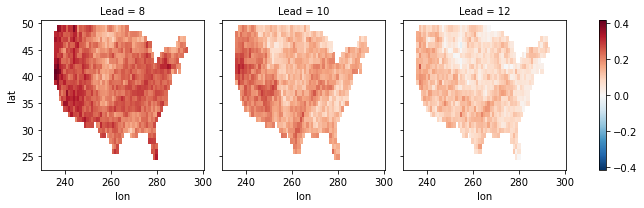

In [96]:
corr_narr01_gefs01.plot(col='Lead')

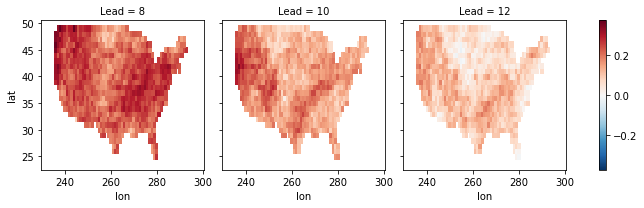

In [100]:
corr_narr01_gefs05.plot(col='Lead')

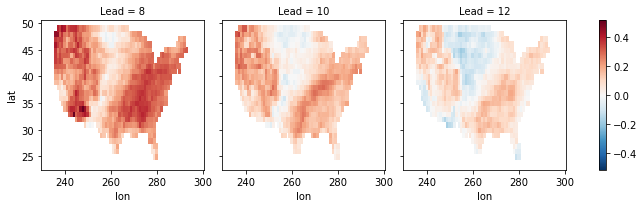

In [98]:
corr_narr01_gefs01_value_diff05.plot(col='Lead')

In [ ]:
corr_narr01_gefs01_value_diff.plot(col='Lead')

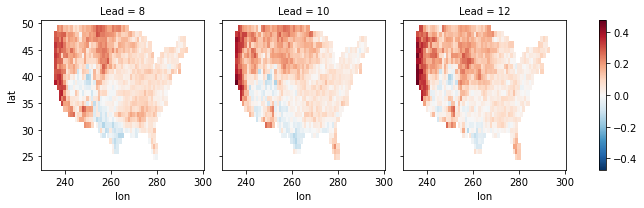

In [86]:
(corr_narr01_gefs01_value_diff-corr_narr01_gefs01).plot(col='Lead')

In [235]:
ds_f

<xarray.DataArray 'pr_sfc' (lat: 28, lon: 71, target_time: 937)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan

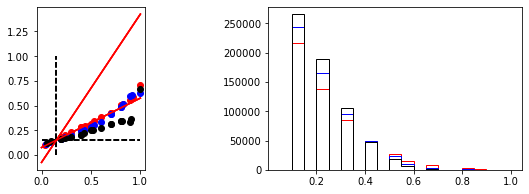

In [242]:
colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')

for iL in np.arange(0,3):
    ds_f=diff5.isel(Lead=iL).mean('M').where(mask_conus).where(mask_times_Lead.isel(Lead=iL), drop=True).drop('St').drop('Lead')
    ds_o = diff_ds_narr5.transpose('lat','lon','time').where(mask_conus).drop('window').drop('quant')
    ds_o = ds_o.sel(time=ds_f.target_time-np.timedelta64(12, 'h'))
    ds_both = xr.merge([ds_o.to_dataset(name='apcp'), ds_f.to_dataset(name='pr_sfc')])
    df_both = ds_both.to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((df_both.pr_sfc.values>=ip-0.05)&(df_both.pr_sfc.values<=ip+0.05))
        vO = df_both.apcp.values[vM]
        ax1.plot(np.nanmean(df_both.pr_sfc.values[vM]),np.nanmean(vO),colcol[iL]+'o')
    #         ax1.errorbar(np.nanmean(values_meanM[vM]),np.nanmean(vO),
    #                     yerr = np.nanstd(vO))

    ax2.hist(df_both.pr_sfc.values, histtype='step',color=colcol[iL], bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')


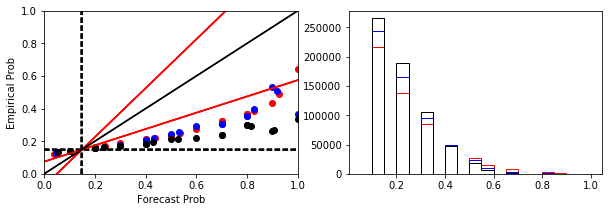

In [101]:
# colcol = ['r','b','k']
# plt.figure(figsize=(10,3))
# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)

# for iL in np.arange(0,3):
    
    
#     values_meanM = diff5.isel(Lead=iL).mean('M').where(mask_conus).where(mask_times_Lead.isel(Lead=iL), drop=True)
#     values_obs = diff_ds_narr5.transpose('lat','lon','time').where(mask_conus)
#     values_obs = values_obs.sel(time=values_meanM.target_time-np.timedelta64(12, 'h'))
#     values_meanM = values_meanM.values.ravel()
#     values_obs = values_obs.values.ravel()
#     for ip in np.arange(0.05,1.05,0.05):
#         vM = np.argwhere((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
#         vO = values_obs[vM]
#         ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),colcol[iL]+'o')
# #         ax1.errorbar(np.nanmean(values_meanM[vM]),np.nanmean(vO),
# #                     yerr = np.nanstd(vO))
        
#     ax2.hist(values_meanM, histtype='step',color=colcol[iL], bins=np.arange(0.05,1.05,0.05))
#     ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
#     ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
#     ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    
    
# ax1.plot([0,1],[0,1],'-k')
# ax1.set_xlim([0,1])
# ax1.set_ylim([0,1])

# ax1.set_xlabel('Forecast Prob')
# ax1.set_ylabel('Empirical Prob')
# ax1.plot([0,1],[0,1],'k')

### repeate 10 times for each ensemble member

In [53]:
diff_ds_narr4_M = diff_ds_narr4B * xr.DataArray(np.array([1,1,1,1,1,1,1,1,1,1]), 
                                                       coords=[np.arange(0,10)], dims=["M"])

In [54]:
diff_ds_narr5_M = diff_ds_narr5 * xr.DataArray(np.array([1,1,1,1,1,1,1,1,1,1]), 
                                                       coords=[np.arange(0,10)], dims=["M"])

In [55]:
value_ds_narr4_M = value_ds_narr4.apcp * xr.DataArray(np.array([1,1,1,1,1,1,1,1,1,1]), 
                                                       coords=[np.arange(0,10)], dims=["M"])

### let's order all the dataarray with the same coordinate order

In [72]:
value_forecast_diff = diff4b.transpose('lat', 'lon', 'target_time' , 'Lead','M')
value_forecast_diff05 = diff4b05.transpose('lat', 'lon', 'target_time' , 'Lead','M')
value_forecast_diff05N = diff4b05N.transpose('lat', 'lon', 'target_time' , 'Lead','M')
value_forecast_diff075 = diff4b075.transpose('lat', 'lon', 'target_time' , 'Lead','M')
value_forecast = value4B.transpose('lat', 'lon', 'target_time' , 'Lead','M')

In [73]:
value_forecastT = value4BT.transpose('lat', 'lon', 'target_time' , 'Lead','M')
value_forecastC = value4BC.transpose('lat', 'lon', 'target_time' , 'Lead','M')

In [74]:
value_forecast01 = diff5.transpose('lat', 'lon', 'target_time' , 'Lead','M')

In [75]:
value_repeated_NARR01 = diff_ds_narr5_M.transpose('lat', 'lon', 'time' , 'M')
value_repeated_diff_NARR = diff_ds_narr4_M.transpose('lat', 'lon', 'time' , 'M')
value_repeated_NARR = value_ds_narr4_M.transpose('lat', 'lon', 'time' , 'M')

### create the time coordinate that is the START of the interval

In [76]:
value_forecast.coords['time'] = value_forecast.target_time-np.timedelta64(12, 'h')
value_forecastT.coords['time'] = value_forecastT.target_time-np.timedelta64(12, 'h')
value_forecastC.coords['time'] = value_forecastC.target_time-np.timedelta64(12, 'h')
value_forecast_diff.coords['time'] = value_forecast_diff.target_time-np.timedelta64(12, 'h')
value_forecast_diff05.coords['time'] = value_forecast_diff05.target_time-np.timedelta64(12, 'h')
value_forecast_diff05N.coords['time'] = value_forecast_diff05N.target_time-np.timedelta64(12, 'h')
value_forecast_diff075.coords['time'] = value_forecast_diff075.target_time-np.timedelta64(12, 'h')

In [77]:
value_forecast01.coords['time'] = value_forecast01.target_time-np.timedelta64(12, 'h')

In [78]:
value_forecast = value_forecast.swap_dims({'target_time':'time'})
value_forecastT = value_forecastT.swap_dims({'target_time':'time'})
value_forecastC = value_forecastC.swap_dims({'target_time':'time'})
value_forecast_diff = value_forecast_diff.swap_dims({'target_time':'time'})
value_forecast_diff05 = value_forecast_diff05.swap_dims({'target_time':'time'})
value_forecast_diff075 = value_forecast_diff075.swap_dims({'target_time':'time'})
value_forecast_diff05N = value_forecast_diff05N.swap_dims({'target_time':'time'})

In [79]:
value_forecast01 = value_forecast01.swap_dims({'target_time':'time'})


### DATAFRAME

### merge the datasets so they are all aligned

In [80]:
ds_combined = xr.merge([value_forecast.to_dataset(name='pr'),
                        value_forecastT.to_dataset(name='tas'),
                        value_forecastC.to_dataset(name='cape'),
                        value_forecast01.to_dataset(name='pr01'),
                        value_forecast_diff.to_dataset(name='pr_diff'),
                        value_forecast_diff05.to_dataset(name='pr_diff05'),
                        value_forecast_diff05N.to_dataset(name='pr_diff05N'),
                        value_forecast_diff075.to_dataset(name='pr_diff075'),
                        value_repeated_diff_NARR.to_dataset(name='narr_diff'),
                        value_repeated_NARR.to_dataset(name='narr_pr'),
                        value_repeated_NARR01.to_dataset(name='y')])

In [647]:
ds_combined.to_netcdf('ds_combinedall.nc')

In [82]:
ds_combined = ds_combined.drop('window').drop('quant').drop('St')
ds_combined

<xarray.Dataset>
Dimensions:      (Lead: 3, M: 10, lat: 28, lon: 71, time: 2809)
Coordinates:
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * Lead         (Lead) int64 8 10 12
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
    target_time  (time) datetime64[ns] 1999-01-13T12:00:00 ... 2016-12-28T12:00:00
  * time         (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28
Data variables:
    pr           (lat, lon, time, Lead, M) float32 0.8 0.2 0.3 ... nan nan nan
    tas          (lat, lon, time, Lead, M) float32 875.14 875.4 ... nan nan
    cape         (lat, lon, time, Lead, M) float32 20.0 3.0 4.0 ... nan nan nan
    pr01         (lat, lon, time, Lead, M) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    pr_diff      (lat, lon, time, Lead, M) float64 nan nan nan ... nan nan nan
    pr_diff05    (lat, lon, time, Lead, M) float64 nan nan nan ... nan nan nan
    pr_diff05N 

In [83]:
ds_combined = ds_combined.drop('target_time')

In [84]:
ds_combined

<xarray.Dataset>
Dimensions:     (Lead: 3, M: 10, lat: 28, lon: 71, time: 2809)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * Lead        (Lead) int64 8 10 12
  * M           (M) int64 0 1 2 3 4 5 6 7 8 9
  * time        (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28
Data variables:
    pr          (lat, lon, time, Lead, M) float32 0.8 0.2 0.3 ... nan nan nan
    tas         (lat, lon, time, Lead, M) float32 875.14 875.4 ... nan nan
    cape        (lat, lon, time, Lead, M) float32 20.0 3.0 4.0 ... nan nan nan
    pr01        (lat, lon, time, Lead, M) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    pr_diff     (lat, lon, time, Lead, M) float64 nan nan nan ... nan nan nan
    pr_diff05   (lat, lon, time, Lead, M) float64 nan nan nan ... nan nan nan
    pr_diff05N  (lat, lon, time, Lead, M) float64 nan nan nan ... nan nan nan
    pr_diff075  (lat, lon, time,

In [85]:
ds_combined_meanM = ds_combined.mean('M')

In [86]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

In [87]:
ds_combined_meanM

<xarray.Dataset>
Dimensions:     (Lead: 3, lat: 28, lon: 71, time: 2809)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * Lead        (Lead) int64 8 10 12
  * time        (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28
Data variables:
    pr          (lat, lon, time, Lead) float32 0.234 nan nan ... nan nan
    tas         (lat, lon, time, Lead) float32 875.1709 nan nan ... nan nan
    cape        (lat, lon, time, Lead) float32 7.2 nan nan nan ... 3.8 nan nan
    pr01        (lat, lon, time, Lead) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    pr_diff     (lat, lon, time, Lead) float64 nan nan nan nan ... nan nan nan
    pr_diff05   (lat, lon, time, Lead) float64 nan nan nan nan ... nan nan nan
    pr_diff05N  (lat, lon, time, Lead) float64 nan nan nan nan ... nan nan nan
    pr_diff075  (lat, lon, time, Lead) float64 nan nan nan nan ... nan nan nan
    narr

In [88]:
mask_times_Lead_time = mask_times_Lead.rename({'target_time':'time'})
mask_times_Lead_time.coords['time'] = mask_times_Lead_time.time-np.timedelta64(12, 'h')

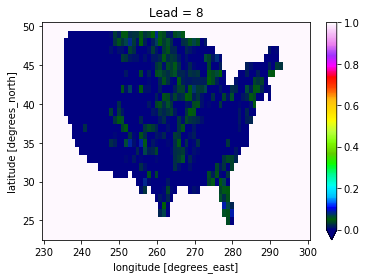

In [90]:

tt1 = np.log(ds_combined_meanM.pr_diff05N).sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).where(mask_conus)
climatology = tt1.groupby("time.month").mean("time")
# tt1_anomalies = tt1.groupby("time.month") - climatology

tt2 = ds_combined_meanM.y.sel(time = tt1.time).where(mask_conus)
climatology = tt2.groupby("time.month").mean("time")
# tt2_anomalies = tt2.groupby("time.month") - climatology

spearman_correlation(tt2, 
                     tt1,'time').plot(vmin=0,vmax=1, cmap='gist_ncar')

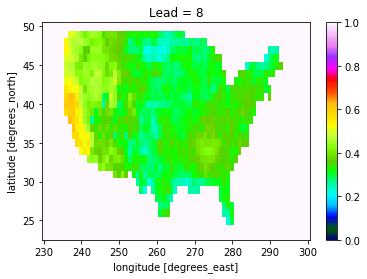

In [92]:

tt1 = ds_combined_meanM.pr.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).where(mask_conus)
climatology = tt1.groupby("time.month").mean("time")
tt1_anomalies = tt1.groupby("time.month") - climatology

tt2 = ds_combined_meanM.narr_pr.sel(time = tt1.time).where(mask_conus)
climatology = tt2.groupby("time.month").mean("time")
tt2_anomalies = tt2.groupby("time.month") - climatology

spearman_correlation(tt2_anomalies, 
                     tt1_anomalies,'time').plot(vmin=0,vmax=1, cmap='gist_ncar')

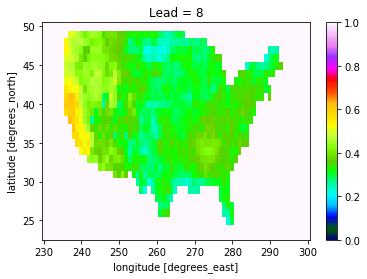

In [93]:

tt1 = ds_combined_meanM.pr.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).where(mask_conus)
climatology = tt1.groupby("time.month").mean("time")
tt1_anomalies = tt1.groupby("time.month") - climatology

tt2 = ds_combined_meanM.narr_pr.sel(time = tt1.time).where(mask_conus)
climatology = tt2.groupby("time.month").mean("time")
tt2_anomalies = tt2.groupby("time.month") - climatology

spearman_correlation(tt2_anomalies, 
                     tt1_anomalies,'time').plot(vmin=0,vmax=1, cmap='gist_ncar')

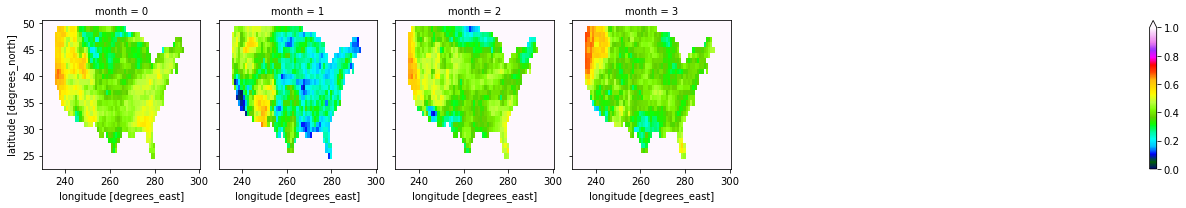

In [94]:
ds_group = ds_combined_meanM.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).groupby('time.season')
list_sc =[]
for k, dssub in ds_group:
#     print( dssub)
    tt1 = dssub.pr.where(mask_conus)
    list_sc.append(spearman_correlation(dssub.narr_pr.where(mask_conus), 
                     tt1,'time'))
                   
ds_sc = xr.concat(list_sc, dim='month')
ds_sc.plot(col='month',col_wrap=6,vmin=0,vmax=1, cmap='gist_ncar')

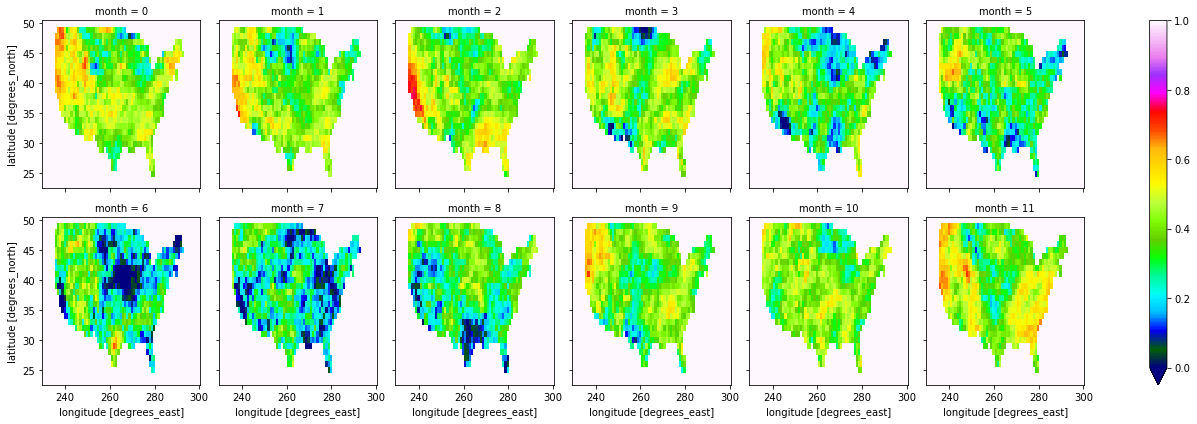

In [95]:
ds_group = ds_combined_meanM.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).groupby('time.month')
list_sc =[]
for k, dssub in ds_group:
#     print( dssub)
    tt1 = dssub.pr.where(mask_conus)
    list_sc.append(spearman_correlation(dssub.narr_pr.where(mask_conus), 
                     tt1,'time'))
                   
ds_sc = xr.concat(list_sc, dim='month')
ds_sc.plot(col='month',col_wrap=6,vmin=0,vmax=1, cmap='gist_ncar')

In [96]:
dssub

<xarray.Dataset>
Dimensions:     (lat: 28, lon: 71, time: 80)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
    Lead        int64 8
  * time        (time) datetime64[ns] 1999-12-01 1999-12-08 ... 2016-12-28
Data variables:
    pr          (lat, lon, time) float32 2.049 16.827 ... 8.733999 10.898001
    tas         (lat, lon, time) float32 878.1629 879.2 ... 810.7009 804.36
    cape        (lat, lon, time) float32 35.3 304.6 103.4 18.8 ... 8.2 7.4 3.8
    pr01        (lat, lon, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pr_diff     (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05   (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05N  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff075  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    narr_diff   (l

[[1.         0.10273617]
 [0.10273617 1.        ]]


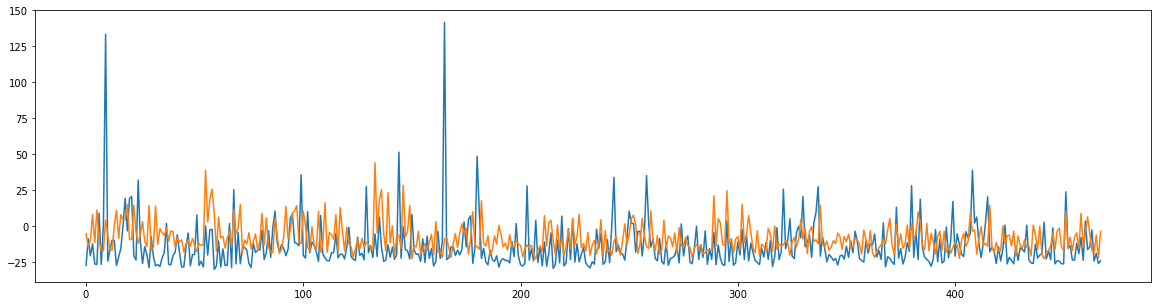

In [97]:
plt.figure(figsize=(20,5))
ds_group = ds_combined_meanM.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True).groupby('time.month')
list_sc =[]
for k, dssub in ds_group:
    if k ==6:
#         dssub = dssub.sel(lon=slice(260,261),lat=slice(31,33))
        dssub = dssub.sel(lon=slice(270,271),lat=slice(30,32))
#         a = dssub.narr_pr.values.ravel()
#         b = dssub.pr.values.ravel()
        a = dssub.narr_diff.values.ravel()
        b = dssub.pr_diff.values.ravel()
        plt.plot(a)
        plt.plot(b)
        print(np.corrcoef(a,b))


# to dataframe Lead = 8

In [98]:
mask_times_Lead

<xarray.DataArray 'pr_sfc' (Lead: 3, target_time: 2809)>
array([[ True, False, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False, False],
       [False, False,  True, ..., False,  True, False]])
Coordinates:
  * target_time  (target_time) datetime64[ns] 1999-01-13T12:00:00 ... 2016-12-28T12:00:00
  * Lead         (Lead) int64 8 10 12

In [99]:
ds8 = ds_combined.sel(Lead=8).where(mask_times_Lead_time.sel(Lead=8), drop=True)
ds8 = ds8.where(mask_conus)
# ds8 = ds8.drop('Lead').drop('St')
ds8

<xarray.Dataset>
Dimensions:     (M: 10, lat: 28, lon: 71, time: 937)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
    Lead        int64 8
  * M           (M) int64 0 1 2 3 4 5 6 7 8 9
  * time        (time) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
Data variables:
    pr          (lat, lon, time, M) float32 nan nan nan nan ... nan nan nan nan
    tas         (lat, lon, time, M) float32 nan nan nan nan ... nan nan nan nan
    cape        (lat, lon, time, M) float32 nan nan nan nan ... nan nan nan nan
    pr01        (lat, lon, time, M) float64 nan nan nan nan ... nan nan nan nan
    pr_diff     (lat, lon, time, M) float64 nan nan nan nan ... nan nan nan nan
    pr_diff05   (lat, lon, time, M) float64 nan nan nan nan ... nan nan nan nan
    pr_diff05N  (lat, lon, time, M) float64 nan nan nan nan ... nan nan nan nan
    pr_diff075  (lat, lon, time, M) float

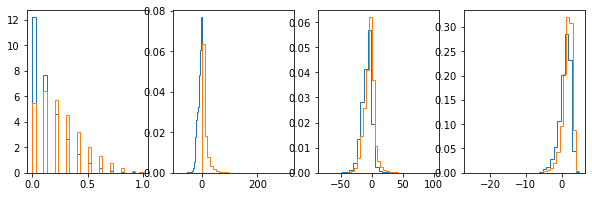

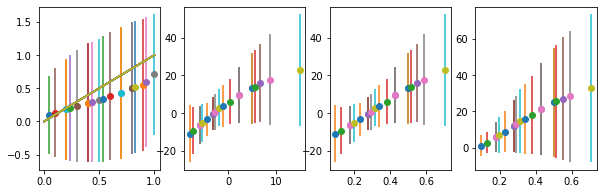

In [494]:
colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

ds8_M = ds8.mean('M')
for ip in np.array([0,1]):
    mask_f01 = ds8_M.where((ds8_M.y==ip))
    ax1.hist(mask_f01.pr01.values.ravel() ,bins=30        
        , histtype='step', density=True)
    ax2.hist(mask_f01.narr_diff.values.ravel()
              ,bins=30                  
       , histtype='step', density=True)
    ax3.hist( mask_f01.pr_diff.values.ravel() ,bins=30                  
        , histtype='step', density=True)    
    ax4.hist( np.log(mask_f01.pr_diff05.values.ravel()) ,bins=30                  
        , histtype='step', density=True)    


plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

for ip in np.arange(0.05,1.05,0.05):
    mask_f01 = ds8_M.where((ds8_M.pr01>=ip-0.05)&(ds8_M.pr01<=ip+0.05))
    ax1.plot(np.nanmean(mask_f01.pr01.values.ravel()), 
             np.nanmean(mask_f01.y.values.ravel())          
        ,'o')
    ax1.plot([0,1],[0,1])
    ax1.errorbar(np.nanmean(mask_f01.pr01.values.ravel()), 
             np.nanmean(mask_f01.y.values.ravel()),
            yerr = 2*np.nanstd(mask_f01.y.values.ravel())
                )
    ax2.plot(np.nanmean(mask_f01.narr_diff.values.ravel()), 
             np.nanmean(mask_f01.pr_diff.values.ravel())           
        ,'o')
    ax2.errorbar(np.nanmean(mask_f01.narr_diff.values.ravel()), 
             np.nanmean(mask_f01.pr_diff.values.ravel()),
            yerr = 2*np.nanstd(mask_f01.pr_diff.values.ravel())
                )
    ax3.plot(np.nanmean(mask_f01.y.values.ravel()), 
             np.nanmean(mask_f01.pr_diff.values.ravel())           
        ,'o')
    ax3.errorbar(np.nanmean(mask_f01.y.values.ravel()), 
             np.nanmean(mask_f01.pr_diff.values.ravel()),
            yerr = 2*np.nanstd((mask_f01.pr_diff.values.ravel()))
                )
    ax4.plot(np.nanmean(mask_f01.y.values.ravel()), 
             np.nanmean(mask_f01.pr_diff05.values.ravel())           
        ,'o')
    ax4.errorbar(np.nanmean(mask_f01.y.values.ravel()), 
             np.nanmean(mask_f01.pr_diff05.values.ravel()),
            yerr = 2*np.nanstd((mask_f01.pr_diff05.values.ravel()))
                )        
#     ax2.hist(values_meanM, histtype='step',color=colcol[iL], bins=np.arange(0.05,1.05,0.05))
#     plt.plot([0,1],[0,1],'-k')
# ax1.set_xlabel('Forecast Prob')
# ax1.set_ylabel('Empirical Prob')
# ax1.plot([0,1],[0,1],'k')

In [106]:
df_LR = ds8_M.to_dataframe()
df_LR = df_LR.reset_index()
df_LR = df_LR.set_index('time')
df_LR = df_LR.drop(columns=['Lead'])

In [107]:
df_LR.head()

lat    lon  pr  tas  cape  pr01  pr_diff  pr_diff05  pr_diff05N  \
time                                                                           
1999-01-13  23.0  230.0 NaN  NaN   NaN   NaN      NaN        NaN         NaN   
1999-01-20  23.0  230.0 NaN  NaN   NaN   NaN      NaN        NaN         NaN   
1999-01-27  23.0  230.0 NaN  NaN   NaN   NaN      NaN        NaN         NaN   
1999-02-03  23.0  230.0 NaN  NaN   NaN   NaN      NaN        NaN         NaN   
1999-02-10  23.0  230.0 NaN  NaN   NaN   NaN      NaN        NaN         NaN   

            pr_diff075  narr_diff  narr_pr   y  
time                                            
1999-01-13         NaN        NaN      NaN NaN  
1999-01-20         NaN        NaN      NaN NaN  
1999-01-27         NaN        NaN      NaN NaN  
1999-02-03         NaN        NaN      NaN NaN  
1999-02-10         NaN        NaN      NaN NaN

In [108]:
df_LRnonan = df_LR.dropna()

In [109]:
df_LR.shape

(1862756, 13)

In [110]:
df_LRnonan.shape

(867662, 13)

In [111]:
df_LRnonan.head()

lat    lon     pr         tas        cape  pr01   pr_diff  \
time                                                                     
1999-01-13  25.0  279.0  5.280  886.278015  443.600006   0.2 -3.802710   
1999-01-20  25.0  279.0  1.566  881.916016  568.400024   0.0 -8.165061   
1999-01-27  25.0  279.0  0.690  888.912964  168.899994   0.0 -9.424779   
1999-02-03  25.0  279.0  3.297  884.067993  199.800003   0.1 -6.848549   
1999-02-10  25.0  279.0  2.286  888.144897  561.599976   0.1 -7.538075   

            pr_diff05  pr_diff05N  pr_diff075  narr_diff   narr_pr    y  
time                                                                     
1999-01-13   3.751680    2.454775    0.774345  -1.691105  2.038285  0.0  
1999-01-20  -0.002731   -0.001741   -3.241572  -3.978047  0.027450  0.0  
1999-01-27  -0.824685   -0.544460   -4.253508  -4.258736  0.030127  0.0  
1999-02-03   1.923004    1.399571   -1.578035  -4.467763  0.202307  0.0  
1999-02-10   1.105794    0.936950   -2.333342  -3.647445  0.379949  0.0

In [112]:
df_LRnonan['month'] = df_LRnonan.index.month

In [116]:
df_LRnonan['tas'] = df_LRnonan['tas']/3.
df_LRnonan['cape'] = df_LRnonan['cape']/3.


In [113]:
from itertools import combinations
import random

In [114]:
def missing_elements(L,start,end):
#     start, end = L[0], L[-1]
    return sorted(set(range(start, end + 1)).difference(L))


In [115]:
# picktrain = random.sample(range(df_LRnonan.shape[0]), int(df_LRnonan.shape[0]/2))
# picktrain = np.sort(picktrain)
# picktest = missing_elements(picktrain,0,int(df_LRnonan.shape[0])-1)
# trainT = df_LRnonan.iloc[picktrain]
# testT = df_LRnonan.iloc[picktest]


In [148]:

trainT = df_LRnonan[0:int(df_LRnonan.shape[0]/3*2)]
testT = df_LRnonan[int(df_LRnonan.shape[0]/3*2):]


In [134]:
# trainT = df_LRnonan*1
# testT = trainT*1

In [119]:
trainT.describe()

lat            lon             pr            tas  \
count  578441.000000  578441.000000  578441.000000  578441.000000   
mean       36.235417     262.104223       6.964382     287.762451   
std         4.124767      13.508681       8.108845      10.465754   
min        25.000000     236.000000      -0.000002     252.174988   
25%        33.000000     251.000000       1.110000     279.954681   
50%        37.000000     262.000000       4.212999     288.640015   
75%        40.000000     273.000000      10.101999     296.526703   
max        43.000000     290.000000     148.121994     312.740021   

                cape           pr01        pr_diff      pr_diff05  \
count  578441.000000  578441.000000  578441.000000  578441.000000   
mean      203.122116       0.142637      -8.048303       4.441257   
std       361.971252       0.167485       8.891555       7.162873   
min         0.000000       0.000000     -74.636328     -19.557250   
25%         1.866667       0.000000     -13.929771       0.079999   
50%        21.733332       0.100000      -6.824951       1.978857   
75%       239.300003       0.200000      -1.880903       6.625159   
max      3427.966797       1.000000     100.061739     137.723686   

         pr_diff05N     pr_diff075      narr_diff        narr_pr  \
count  5.784410e+05  578441.000000  578441.000000  578441.000000   
mean   2.256983e+23      -2.072500      -6.883718       6.196099   
std    2.960178e+25       7.346029      12.431305      12.122657   
min   -9.992872e+19     -48.418724     -85.026727       0.000000   
25%    1.993539e-01      -6.112221     -14.770333       0.024502   
50%    2.019772e+00      -1.575043      -6.369444       0.834973   
75%    9.920282e+00       0.689692      -1.362713       6.969657   
max    1.076409e+28     111.748893     311.117404     340.538548   

                   y          month  
count  578441.000000  578441.000000  
mean        0.149899       6.537885  
std         0.356973       3.444163  
min         0.000000       1.000000  
25%         0.000000       4.000000  
50%         0.000000       7.000000  
75%         0.000000      10.000000  
max         1.000000      12.000000

In [120]:
import statsmodels.api as sm

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve


In [149]:
trainT['const']=1
# trainT['01timesdiff'] = trainT['pr01']*trainT['pr_diff']

In [150]:
testT['const']=1
# testT['01timesdiff'] = testT['pr01']*testT['pr_diff']

In [151]:
# for k, itrain in trainT.drop(columns=['lat','lon','month']).groupby(trainT.index.month):
#     pd.plotting.scatter_matrix(itrain)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               578441
Model:                          Logit   Df Residuals:                   578439
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:                 0.03694
Time:                        21:10:41   Log-Likelihood:            -2.3538e+05
converged:                       True   LL-Null:                   -2.4441e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1728      0.005   -415.575      0.000      -2.183      -2.163
pr             0.0536      0.000    135.431      0.000       0.053       0.054
                           Logit Regression Results 

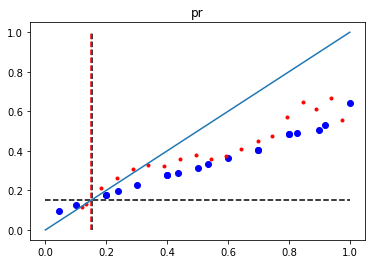

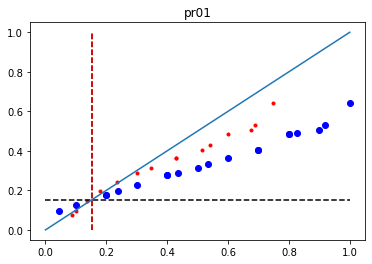

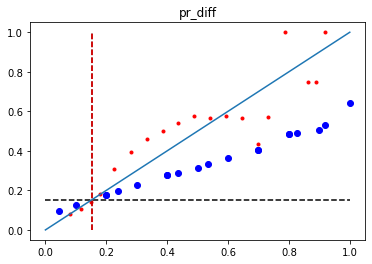

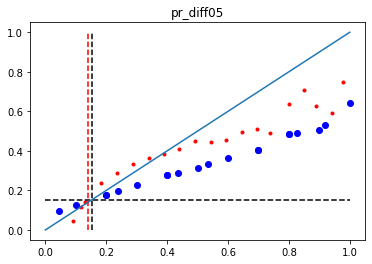

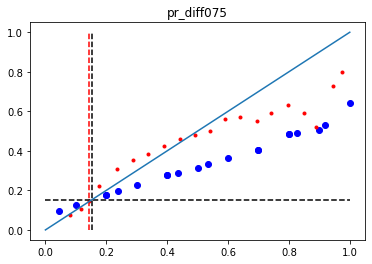

In [153]:
for varname in ['pr','pr01','pr_diff','pr_diff05','pr_diff075']:
    logit_model=sm.Logit(trainT['y'],trainT[['const',varname]])
    resultall=logit_model.fit(disp=0,maxiter=100)
    print(resultall.summary())
    predictions = resultall.predict(testT[['const',varname]])
#     print(roc_auc_score(testT['y'].values, predictions.values))
    values_meanM = testT[['pr01']].values
    values_cal = predictions.values
    values_obs = testT[['y']].values
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = values_obs[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        vC = ((values_cal>=ip-0.05)&(values_cal<=ip+0.05))
        vO = values_obs[vC]
        ax1.plot(np.nanmean(values_cal[vC]),np.nanmean(vO),'r.')
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot(np.nanmean(values_cal)*np.array([1,1]),[0,1], 'r--')
    ax1.plot([0,1],[0,1])
    ax1.set_title(varname)
#     ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               578441
Model:                          Logit   Df Residuals:                   578438
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                 0.04979
Time:                        11:36:35   Log-Likelihood:            -2.3224e+05
converged:                       True   LL-Null:                   -2.4441e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8818      0.006   -304.333      0.000      -1.894      -1.870
pr_diff075     0.0516      0.001     76.377      0.000       0.050       0.053
pr             0.0241      0.001     43.865      0.0

KeyboardInterrupt: 

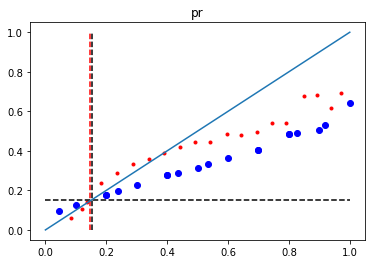

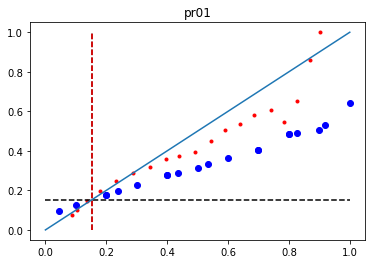

In [291]:
for varname in ['pr','pr01','pr_diff','pr_diff05']:
    logit_model=sm.Logit(trainT['y'],trainT[['const','pr_diff075',varname]])
    resultall=logit_model.fit(disp=0,maxiter=100)
    print(resultall.summary())
    predictions = resultall.predict(testT[['const','pr_diff075',varname]])
#     print(roc_auc_score(testT['y'].values, predictions.values))
    values_meanM = testT[['pr01']].values
    values_cal = predictions.values
    values_obs = testT[['y']].values
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = values_obs[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        vC = ((values_cal>=ip-0.05)&(values_cal<=ip+0.05))
        vO = values_obs[vC]
        ax1.plot(np.nanmean(values_cal[vC]),np.nanmean(vO),'r.')
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot(np.nanmean(values_cal)*np.array([1,1]),[0,1], 'r--')
    ax1.plot([0,1],[0,1])
    ax1.set_title(varname)

In [159]:
ds8_M.to_netcdf('ds8_m.nc')

# Figure baseline using all data to calculate statistics

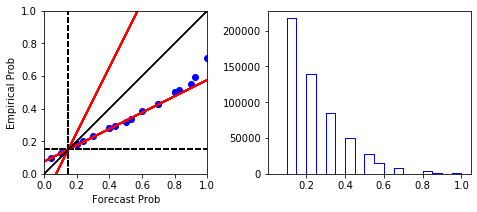

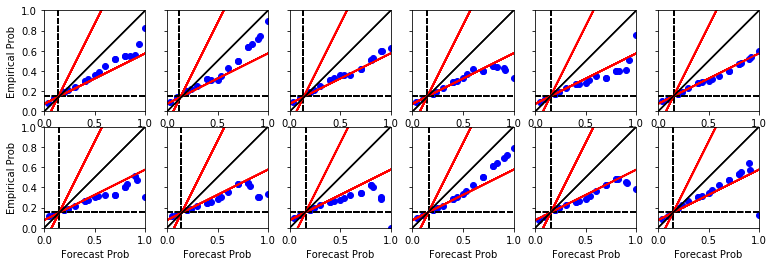

In [460]:
ds_trunc = ds8_M*1.
ds_merged_all = ds_trunc*1.
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all# = ds_merged_all.rename({'time1':'time'})

colcol = ['r','b','k']
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')


df_both = ds_merged_all[['y','pr01']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
    
    
ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

plt.figure(figsize=(13,4))
ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    ax1 = plt.subplot(2,6,k)
    ax1.set_aspect('equal')
    df_both = dsm[['y','pr01']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = df_both.y.values[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')

        ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
        ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
        ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
        ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')

    if( k==1)|(k==7):
        ax1.set_ylabel('Empirical Prob')
    else:
        ax1.set_ylabel('')
        ax1.set_yticklabels('')
    ax1.plot([0,1],[0,1],'-k')
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    if k>=7:
        ax1.set_xlabel('Forecast Prob')
    
    ax1.plot([0,1],[0,1],'k')
plt.subplots_adjust(hspace=0.15, wspace=0.1)

# Relationships

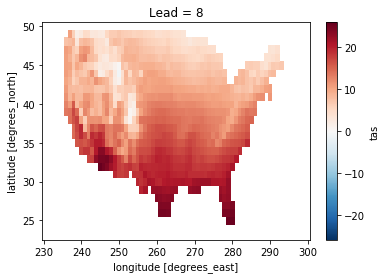

In [510]:
(ds8_M.mean('time').tas/3-273.15).plot()

In [559]:
ds8_M

<xarray.Dataset>
Dimensions:     (lat: 28, lon: 71, time: 937)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
    Lead        int64 8
  * time        (time) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
Data variables:
    pr          (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    tas         (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    cape        (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    pr01        (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff     (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05   (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05N  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff075  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    na

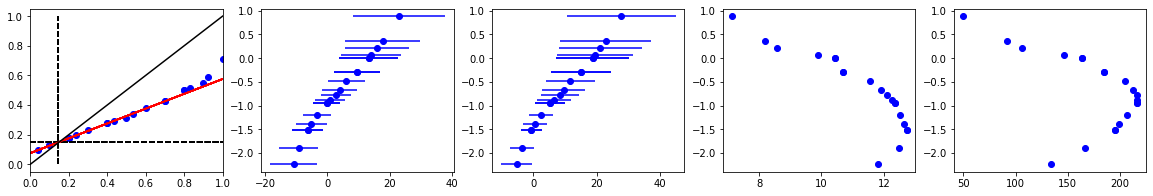

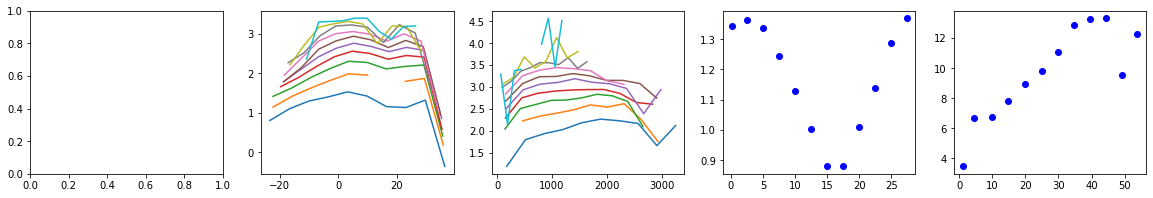

In [644]:
ds_trunc = ds8_M*1.
ds_merged_all = ds_trunc*1.
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all# = ds_merged_all.rename({'time1':'time'})

colcol = ['r','b','k']
plt.figure(figsize=(20,3))
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)


df_both = ds_merged_all.to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
#     
    vd = df_both.pr_diff.values[vM]
    # log(p/(1-p))
    logitp = np.log(np.nanmean(vO)/(1-np.nanmean(vO)))
    
    ax2.plot(np.nanmean(vd),logitp,'bo')
    ax2.errorbar(np.nanmean(vd),logitp ,xerr=np.nanstd(vd), ecolor='b')
    
    vd1 = df_both.pr_diff075.values[vM]
    ax3.plot(np.nanmean(vd1),logitp,'bo')
    
    ax3.errorbar(np.nanmean(vd1),logitp ,xerr=np.nanstd(vd1), ecolor='b')

    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vd2 = df_both.tas.values[vM]/3.-273.15
    tt = vd2 #np.exp(vd2)
    ax4.plot(np.nanmean(tt[np.isfinite(tt)]),logitp,'bo')

    vd3 = df_both.cape.values[vM]/3
    tt = vd3
    ax5.plot(np.nanmean(tt[np.isfinite(tt)]),logitp,'bo')

#     ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
ax1.plot([0,1],[0,1],'k')
ax1.set_xlim((0,1))
# for ax in [ax1,ax2, ax3, ax4, ax5]:
#     ax.set_ylim((0,1))
# ax4.set_xlim((0,4))

plt.figure(figsize=(20,3))
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

for ip in np.arange(0.1,1.05,0.1):
    vM = ((values_meanM>=ip-0.075)&(values_meanM<=ip+0.075))
#     vO = df_both.y.values[vM]
    # log(p/(1-p))
    logitp = np.log(np.nanmean(vO)/(1-np.nanmean(vO)))
    
    
    vd2 = df_both.tas.values[vM]/3.-273.15
    vd3 = df_both.pr.values[vM]
    df_fd = pd.DataFrame(data = {'col1': np.log(vd3), 'col2': pd.cut(vd2,10)})
    mid = [(a.left + a.right)/2 for a in df_fd.groupby('col2').mean().index.tolist()]
    ax2.plot(mid, df_fd.groupby('col2').mean().col1)
    
    vd2 = df_both.cape.values[vM]/3.
    vd3 = df_both.pr.values[vM]
    df_fd = pd.DataFrame(data = {'col1':np.log(vd3), 'col2': pd.cut(vd2,10)})
    mid = [(a.left + a.right)/2 for a in df_fd.groupby('col2').mean().index.tolist()]
    ax3.plot(mid, df_fd.groupby('col2').mean().col1)

#     vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
#     vd2 = df_both.tas.values[vM]/3.-273.15
#     tt = vd2 #np.exp(vd2)
#     ax4.plot(np.nanmean(tt[np.isfinite(tt)]),logitp,'bo')

#     vd3 = df_both.cape.values[vM]/3
#     tt = vd3
#     ax5.plot(np.nanmean(tt[np.isfinite(tt)]),logitp,'bo')
    
values_meanM = df_both.tas.values/3.-273.15
for ip in np.arange(0,30,2.5):
    vM = ((values_meanM>=ip-2.5)&(values_meanM<=ip+2.5))
    vO = (df_both.pr.values)[vM]
    logvO = np.log(vO)
    ax4.plot(np.nanmean(values_meanM[vM]),np.nanmean(logvO[np.isfinite(logvO)]),'bo')
    
values_meanM = (df_both.cape.values/3.)**0.5
for ip in np.arange(0,60,5):
    vM = ((values_meanM>=ip-2.5)&(values_meanM<=ip+2.5))
    vO = df_both.narr_pr.values[vM]
    ax5.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')



In [617]:
values_meanM[vM].shape

(539549,)

In [619]:
vd2.shape

(539549,)

In [620]:
df_fd = pd.DataFrame(data = {'col1': values_meanM[vM], 'col2': pd.cut(vd2,10)})
mid = [(a.left + a.right)/2 for a in df_fd.groupby('col2').mean().index.tolist()]


In [634]:
df_fd.groupby('col2').mean().index.tolist().right

-20.073

In [637]:
mid = [(a.left + a.right)/2 for a in df_fd.groupby('col2').mean().index.tolist()]
mid

[-23.4205,
 -16.758,
 -10.128499999999999,
 -3.4995,
 3.1295,
 9.7585,
 16.387999999999998,
 23.0175,
 29.6465,
 36.2755]

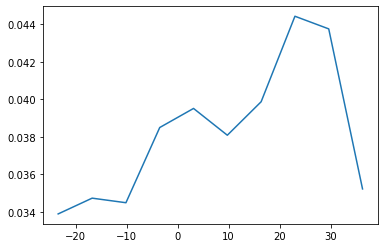

In [638]:
plt.plot(mid, df_fd.groupby('col2').mean().col1)

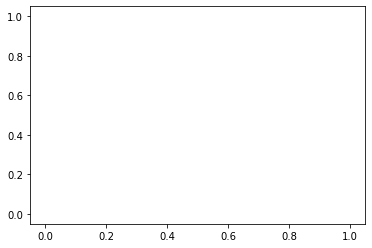

In [554]:
plt.plot(np.nanmean(values_meanM[vM]),np.nanmean(np.log(vO)),'bo')

In [557]:
np.log(vO)

array([-0.12869305,  3.08441269, -3.05952846, ...,  2.41036062,
        2.75313258,  2.60390623])

In [555]:
np.nanmean(values_meanM[vM])

27.368168

In [543]:
values_meanM = (df_both.cape.values/3.)**0.5

In [545]:
values_meanM.max()

58.54884

# BSS

Text(0, 0.5, 'BSS (0.15)')

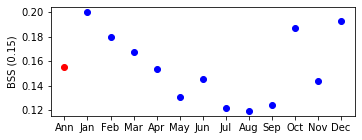

In [456]:
    
    
ds_trunc = ds8_M*1.
ds_merged_all = ds_trunc*1.
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all# = ds_merged_all.rename({'time1':'time'})

colcol = ['r','b','k']
plt.figure(figsize=(12,2))
ax1 = plt.subplot(1,2,1)

df_both = ds_merged_all[['y','pr01']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
vO = df_both.y.values
BS_ref = np.nanmean(vO)
BS = np.mean((values_meanM-vO)**2)
BSS = 1. - (BS/BS_ref)
ax1.plot(0, BSS, 'ro')


ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    df_both = dsm[['y','pr01']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    vO = df_both.y.values
    BS_ref = np.nanmean(vO)
    BS = np.mean((values_meanM-vO)**2)
    BSS = 1. - (BS/BS_ref)
    ax1.plot(k, BSS, 'bo')
ax1.set_xticks(np.arange(0,13))
ax1.set_xticklabels(['Ann','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.set_ylabel('BSS (0.15)')

In [461]:
np.nanmean(vO)

0.125

In [462]:
def calculateBSS(dsin):
    df_both = dsin[['y','pr01']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    vO = df_both.y.values
    BS_ref = 0.15
    BS = np.mean((values_meanM-vO)**2)
    BSS = 1. - (BS/BS_ref)
    return(xr.DataArray(BSS))
 

In [489]:
ds_trunc = ds8_M*1.
ds_merged_all = ds_trunc*1.
ds_merged_all = ds_merged_all.drop('Lead')
ds_month = ds_merged_all.groupby('time.month')
ds_BSS_month = []
for k, dsm in ds_month:
    ds_merged_all_stacked = dsm[['y','pr01']].stack(allpoints=['lat','lon'])
    ds_BSS_i = ds_merged_all_stacked.groupby('allpoints').apply(calculateBSS)
    ds_BSS_i = ds_BSS_i.unstack()
    ds_BSS_i.coords['month']=k
    ds_BSS_i = ds_BSS_i.expand_dims('month')
    ds_BSS_month.append(ds_BSS_i)
ds_BSS_month = xr.concat(ds_BSS_month)

TypeError: concat() missing 1 required positional argument: 'dim'

In [491]:
ds_BSS_month = xr.concat(ds_BSS_month, dim='month')

In [475]:
ds_BSS.to_netcdf('ds_BSS.nc')

In [492]:
ds_BSS_month.to_netcdf('ds_BSS_month.nc')

In [ ]:
ds_trunc = ds8_M*1.
ds_merged_all = ds_trunc*1.
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all_stacked = ds_merged_all[['y','pr01']].stack(allpoints=['lat','lon'])
ds_BSS = ds_merged_all_stacked.groupby('allpoints').apply(calculateBSS)

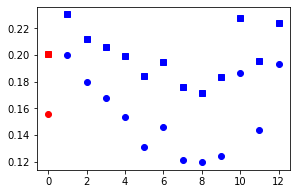

In [564]:
ds_trunc = ds8_M*1.

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)

ds_merged_all = xr.merge([ds_trunc, pp[['predictall']].transpose('lat','lon','time1').rename({'time1':'time'})])
ds_merged_all = ds_merged_all.drop('Lead')
df_both = ds_merged_all[['y','pr01','predictall']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predictall.values
vO = df_both.y.values
BS_ref = np.nanmean(vO)
BS = np.mean((values_meanM-vO)**2)
BSS = 1. - (BS/BS_ref)
ax1.plot(0, BSS, 'ro')
BS = np.mean((values_meanC-vO)**2)
BSS = 1. - (BS/BS_ref)
ax1.plot(0, BSS, 'rs')


ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    df_both = dsm[['y','pr01','predictall']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    values_meanC = df_both.predictall.values
    vO = df_both.y.values
    BS_ref = np.nanmean(vO)
    BS = np.mean((values_meanM-vO)**2)
    BSS = 1. - (BS/BS_ref)
    ax1.plot(k, BSS, 'bo')
    BS = np.mean((values_meanC-vO)**2)
    BSS = 1. - (BS/BS_ref)
    ax1.plot(k, BSS, 'bs')


In [561]:
# fit to launch on chiara.iri

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import statsmodels.api as sm
def fit_to_kernel(dsin):   
    df= dsin.to_dataframe()
    df = df.reset_index()
    df = df.set_index('time')
    df = df.dropna()
    df['const']=1 
    df = df[0:int(df.shape[0]/3*2)]
    wherecenter= np.int(np.floor(dsin.xx.shape[0]/2)-1)+1
    touse_predict = dsin.sel(yy=wherecenter,xx=wherecenter).isel(time=slice(-330,None))
    touse_predictall = dsin.sel(yy=wherecenter,xx=wherecenter)
    if df.dropna().count()[0]>0:           
        logit_model=sm.Logit(df['y'],df[['const','pr_diff075', 'pr01','logT']])
        resultall=logit_model.fit(disp=0,maxiter=100)
        dfp= touse_predict.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictions = resultall.predict(dfp[['const','pr_diff075', 'pr01','logT']]).values
        dfp= touse_predictall.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictionsall = resultall.predict(dfp[['const','pr_diff075', 'pr01','logT']]).values
        resultall=resultall.params.values
    else:
        resultall = np.array([np.nan, np.nan, np.nan, np.nan])
        predictions = np.ones(touse_predict.time.shape)*np.nan 
        predictionsall = np.ones(touse_predictall.time.shape)*np.nan 
    dsout = xr.Dataset({"params": (["dim"], resultall), "predict":(["time"], predictions), "predictall":(["time1"], predictionsall)}, 
                       coords={"dim": (["dim"], np.arange(0,4)),"time": (["time"], touse_predict.time),"time1": (["time1"], touse_predictall.time)})
    return dsout

ds8_M = xr.open_dataset('ds8_m.nc')
ds8_M['logT'] = np.log(ds8_M.tas)
ds_fun = ds8_M[['y','pr_diff075', 'pr01','logT']]#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.rolling(lat=7, lon=7,center=True).construct(window_dim={'lat':'yy','lon':'xx'})
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)
out_u = out.unstack()
out_u.to_netcdf('7x7_075_01_logT.nc')



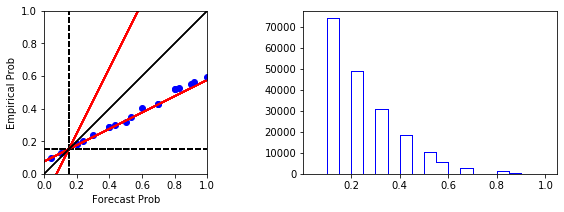

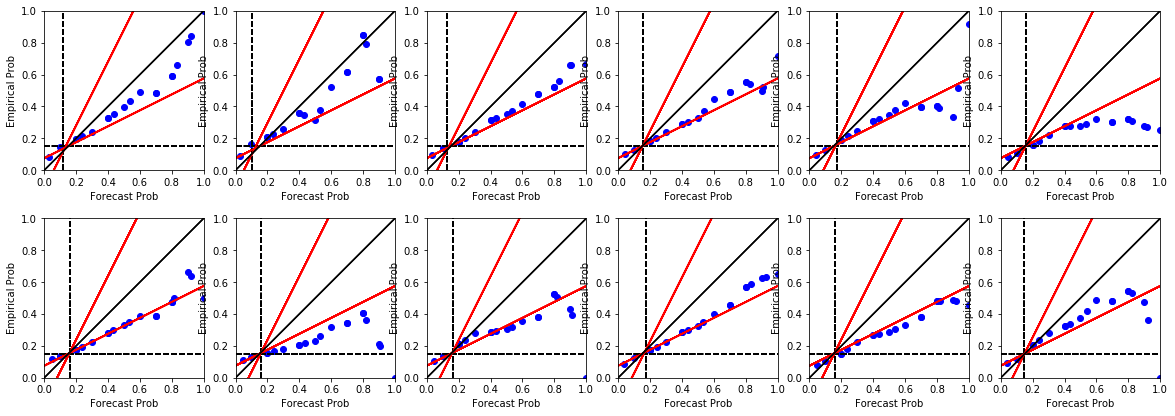

In [433]:
pp = xr.open_dataset('7x7_075_01_logT.nc')

pp
ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')

ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')

df_both = ds_merged_all[['y','pr01','predict']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predict.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
    vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
    vO = df_both.y.values[vC]
#     ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
#     ax2.hist(values_meanC, histtype='step',color='r', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
    
    
ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(20,7))
# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)


ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    ax1 = plt.subplot(2,6,k)
    ax1.set_aspect('equal')
    df_both = dsm[['y','pr01','predict']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    values_meanC = df_both.predict.values
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = df_both.y.values[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
        vO = df_both.y.values[vC]
#         ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')

        ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
        ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
        ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
    #     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
        ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')


    ax1.plot([0,1],[0,1],'-k')
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])

    ax1.set_xlabel('Forecast Prob')
    ax1.set_ylabel('Empirical Prob')
    ax1.plot([0,1],[0,1],'k')

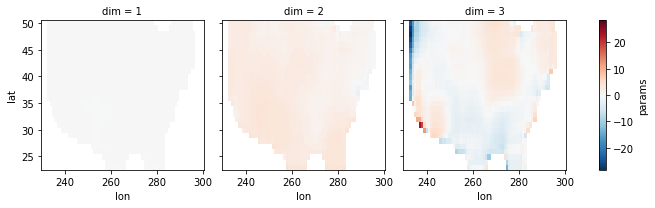

In [384]:
pp.params[1:].plot(col='dim')

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import statsmodels.api as sm
def fit_to_kernel(dsin):   
    df= dsin.to_dataframe()
    df = df.reset_index()
    df = df.set_index('time')
    df = df.dropna()
    df['const']=1 
    df = df[0:int(df.shape[0]/3*2)]
    wherecenter= np.int(np.floor(dsin.xx.shape[0]/2)-1)+1
    touse_predict = dsin.sel(yy=wherecenter,xx=wherecenter).isel(time=slice(-330,None))
    touse_predictall = dsin.sel(yy=wherecenter,xx=wherecenter)
    if df.dropna().count()[0]>0:           
        logit_model=sm.Logit(df['y'],df[['const','pr_diff075', 'pr01']])
        resultall=logit_model.fit(disp=0,maxiter=100)
        dfp= touse_predict.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictions = resultall.predict(dfp[['const','pr_diff075', 'pr01']]).values
        dfp= touse_predictall.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictionsall = resultall.predict(dfp[['const','pr_diff075', 'pr01']]).values
        resultall=resultall.params.values
    else:
        resultall = np.array([np.nan, np.nan, np.nan])
        predictions = np.ones(touse_predict.time.shape)*np.nan 
        predictionsall = np.ones(touse_predictall.time.shape)*np.nan 
    dsout = xr.Dataset({"params": (["dim"], resultall), "predict":(["time"], predictions), "predictall":(["time1"], predictionsall)}, 
                       coords={"dim": (["dim"], np.arange(0,3)),"time": (["time"], touse_predict.time),"time1": (["time1"], touse_predictall.time)})
    return dsout

ds8_M = xr.open_dataset('ds8_m.nc')
ds_fun = ds8_M[['y','pr_diff075', 'pr01']]#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.rolling(lat=7, lon=7,center=True).construct(window_dim={'lat':'yy','lon':'xx'})
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)
out_u = out.unstack()
out_u.to_netcdf('7x7_075_01.nc')



In [385]:
pp = xr.open_dataset('7x7_075_01.nc')

pp

<xarray.Dataset>
Dimensions:     (dim: 3, lat: 28, lon: 71, time: 330, time1: 937)
Coordinates:
  * dim         (dim) int64 0 1 2
  * time        (time) datetime64[ns] 2010-09-01 2010-09-08 ... 2016-12-28
  * time1       (time1) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
    Lead        int64 ...
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
Data variables:
    params      (dim, lat, lon) float64 ...
    predict     (time, lat, lon) float64 ...
    predictall  (time1, lat, lon) float64 ...

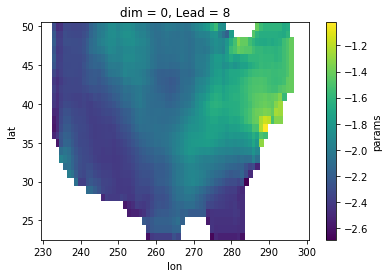

In [391]:
pp.params[ip.values].plot()

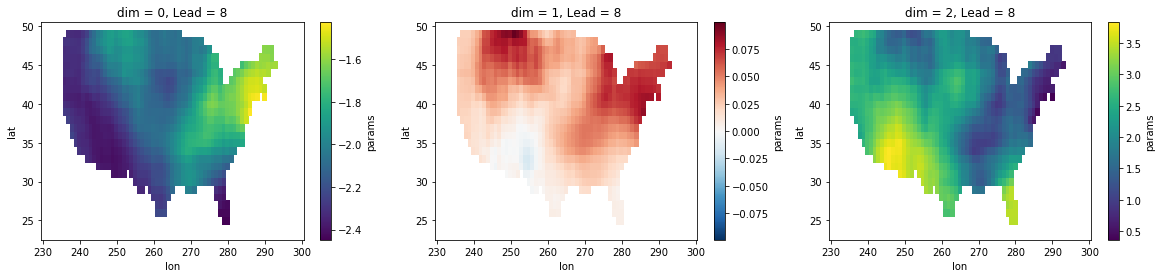

In [400]:
plt.figure(figsize=(20,4))
for ip in pp.dim:
    ax1 = plt.subplot(1,3,ip.values+1)
    pp.params[ip.values].where(mask_conus).plot(ax=ax1)
    

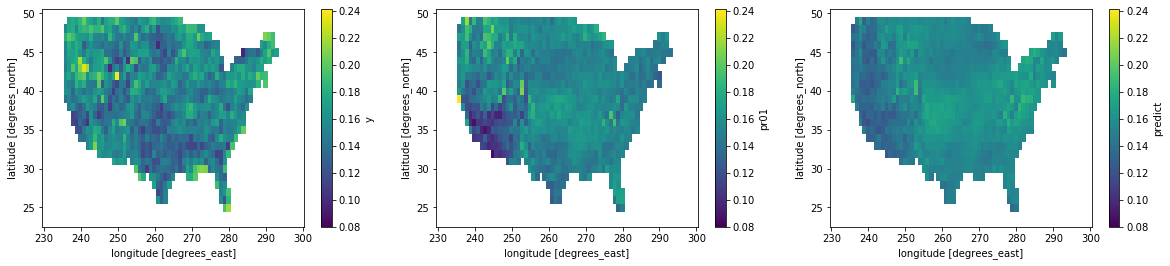

In [403]:
ds_trunc = ds8_M.sel(time=pp.time)
ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')

plt.figure(figsize=(20,4))
ax1 = plt.subplot(1,3,1)
ds_merged_all.y.mean('time').plot(ax=ax1, vmin=0.08, vmax=0.241)
ax1 = plt.subplot(1,3,2)
ds_merged_all.pr01.mean('time').plot(ax=ax1, vmin=0.08, vmax=0.241)
ax1 = plt.subplot(1,3,3)
ds_merged_all.predict.mean('time').plot(ax=ax1, vmin=0.08, vmax=0.241)

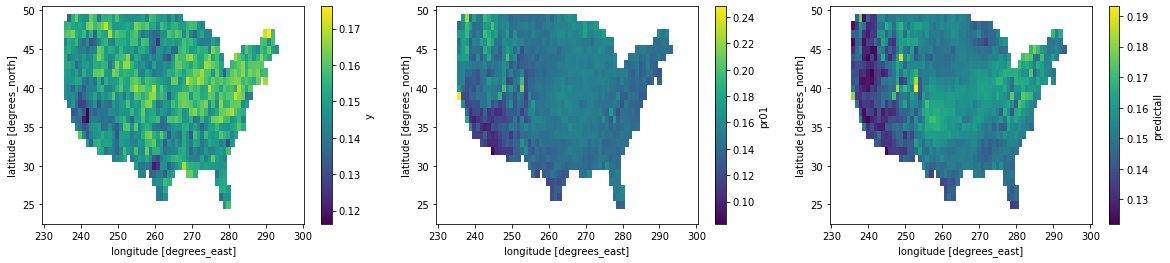

In [408]:
ds_trunc = ds8_M*1
ds_merged_all = xr.merge([ds_trunc, pp[['predictall']].transpose('lat','lon','time1').rename({'time1':'time'})])
ds_merged_all = ds_merged_all.drop('Lead')

plt.figure(figsize=(20,4))
ax1 = plt.subplot(1,3,1)
ds_merged_all.y.mean('time').plot(ax=ax1)
ax1 = plt.subplot(1,3,2)
ds_merged_all.pr01.mean('time').plot(ax=ax1)
ax1 = plt.subplot(1,3,3)
ds_merged_all.predictall.mean('time').plot(ax=ax1)

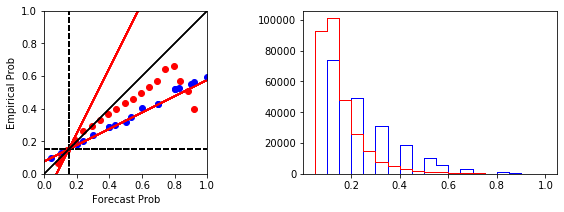

In [395]:
ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')

ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')

df_both = ds_merged_all[['y','pr01','predict']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predict.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
    vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
    vO = df_both.y.values[vC]
    ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax2.hist(values_meanC, histtype='step',color='r', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
    
    
ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

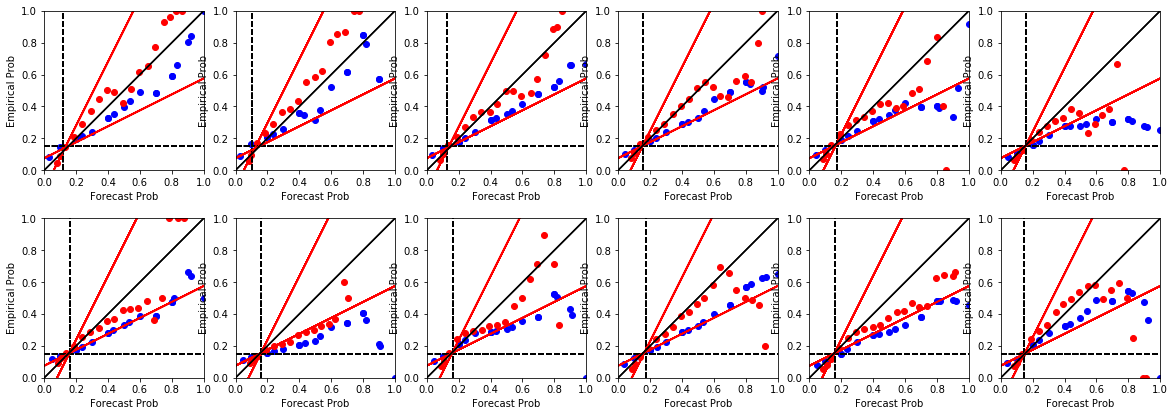

In [381]:
ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(20,7))
# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)


ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    ax1 = plt.subplot(2,6,k)
    ax1.set_aspect('equal')
    df_both = dsm[['y','pr01','predict']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    values_meanC = df_both.predict.values
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = df_both.y.values[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
        vO = df_both.y.values[vC]
        ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')

        ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
        ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
        ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
    #     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
        ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')


    ax1.plot([0,1],[0,1],'-k')
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])

    ax1.set_xlabel('Forecast Prob')
    ax1.set_ylabel('Empirical Prob')
    ax1.plot([0,1],[0,1],'k')

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import statsmodels.api as sm
def fit_to_kernel(dsin):   
    df= dsin.to_dataframe()
    df = df.reset_index()
    df = df.set_index('time')
    df = df.dropna()
    df['const']=1 
    df = df[0:int(df.shape[0]/3*2)]
    wherecenter= np.int(np.floor(dsin.xx.shape[0]/2)-1)+1
    touse_predict = dsin.sel(yy=wherecenter,xx=wherecenter).isel(time=slice(-330,None))
    touse_predictall = dsin.sel(yy=wherecenter,xx=wherecenter)
    if df.dropna().count()[0]>0:           
        logit_model=sm.Logit(df['y'],df[['const','pr_diff075']])
        resultall=logit_model.fit(disp=0,maxiter=100)
        dfp= touse_predict.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictions = resultall.predict(dfp[['const','pr_diff075']]).values
        dfp= touse_predictall.to_dataframe()
        dfp = dfp.reset_index()
        dfp = dfp.set_index('time')
        dfp['const']=1 
        predictionsall = resultall.predict(dfp[['const','pr_diff075']]).values
        resultall=resultall.params.values
    else:
        resultall = np.array([np.nan, np.nan])
        predictions = np.ones(touse_predict.time.shape)*np.nan 
        predictionsall = np.ones(touse_predictall.time.shape)*np.nan 
    dsout = xr.Dataset({"params": (["dim"], resultall), "predict":(["time"], predictions), "predictall":(["time1"], predictionsall)}, 
                       coords={"dim": (["dim"], np.arange(0,2)),"time": (["time"], touse_predict.time),"time1": (["time1"], touse_predictall.time)})
    return dsout

ds8_M = xr.open_dataset('ds8_m.nc')
ds_fun = ds8_M[['y','pr_diff075']]#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.rolling(lat=7, lon=7,center=True).construct(window_dim={'lat':'yy','lon':'xx'})
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)
out_u = out.unstack()
out_u.to_netcdf('7x7_075b.nc')

        #     else:
#         resultall=np.array([np.nan, np.nan])
        


In [565]:
pp = xr.open_dataset('7x7_075b.nc')

pp

<xarray.Dataset>
Dimensions:     (dim: 2, lat: 28, lon: 71, time: 330, time1: 937)
Coordinates:
  * dim         (dim) int64 0 1
  * time        (time) datetime64[ns] 2010-09-01 2010-09-08 ... 2016-12-28
  * time1       (time1) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
    Lead        int64 ...
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
Data variables:
    params      (dim, lat, lon) float64 ...
    predict     (time, lat, lon) float64 ...
    predictall  (time1, lat, lon) float64 ...

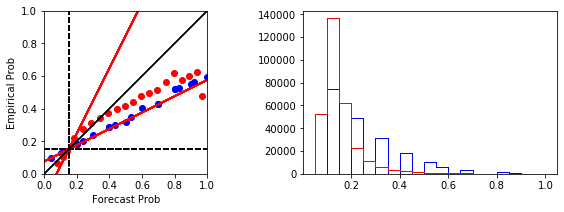

In [566]:
ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')

ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')

df_both = ds_merged_all[['y','pr01','predict']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predict.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
    vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
    vO = df_both.y.values[vC]
    ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax2.hist(values_meanC, histtype='step',color='r', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
    
    
ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

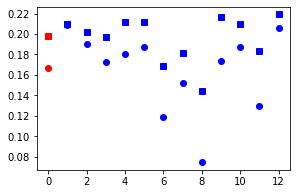

In [569]:
ds_trunc =  ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)

ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
df_both = ds_merged_all[['y','pr01','predict']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predict.values
vO = df_both.y.values
BS_ref = np.nanmean(vO)
BS = np.mean((values_meanM-vO)**2)
BSS = 1. - (BS/BS_ref)
ax1.plot(0, BSS, 'ro')
BS = np.mean((values_meanC-vO)**2)
BSS = 1. - (BS/BS_ref)
ax1.plot(0, BSS, 'rs')


ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    df_both = dsm[['y','pr01','predict']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    values_meanC = df_both.predict.values
    vO = df_both.y.values
    BS_ref = np.nanmean(vO)
    BS = np.mean((values_meanM-vO)**2)
    BSS = 1. - (BS/BS_ref)
    ax1.plot(k, BSS, 'bo')
    BS = np.mean((values_meanC-vO)**2)
    BSS = 1. - (BS/BS_ref)
    ax1.plot(k, BSS, 'bs')


In [571]:
ds_trunc = ds8_M.sel(time=pp.time)
ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_month = ds_merged_all.groupby('time.month')
ds_BSS_month = []
for k, dsm in ds_month:
    ds_merged_all_stacked = dsm[['y','predict']].stack(allpoints=['lat','lon'])
    ds_merged_all_stacked = ds_merged_all_stacked.rename({'predict':'pr01'})
    ds_BSS_i = ds_merged_all_stacked.groupby('allpoints').apply(calculateBSS)
    ds_BSS_i = ds_BSS_i.unstack()
    ds_BSS_i.coords['month']=k
    ds_BSS_i = ds_BSS_i.expand_dims('month')
    ds_BSS_month.append(ds_BSS_i)


TypeError: concat() missing 1 required positional argument: 'dim'

In [572]:
ds_BSS_month_predict = xr.concat(ds_BSS_month, dim='month')

In [580]:
ds_BSS_month_predict.to_netcdf('ds_BSS_month_predict.nc')

In [574]:
ds_trunc = ds8_M.sel(time=pp.time)
ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all_stacked = ds_merged_all[['y','predict']].stack(allpoints=['lat','lon'])
ds_merged_all_stacked = ds_merged_all_stacked.rename({'predict':'pr01'})
ds_BSS_predict = ds_merged_all_stacked.groupby('allpoints').apply(calculateBSS)


In [577]:
ds_BSS_predict = ds_BSS_predict.unstack()

In [581]:
ds_BSS_predict.to_netcdf('ds_BSS_predict.nc')

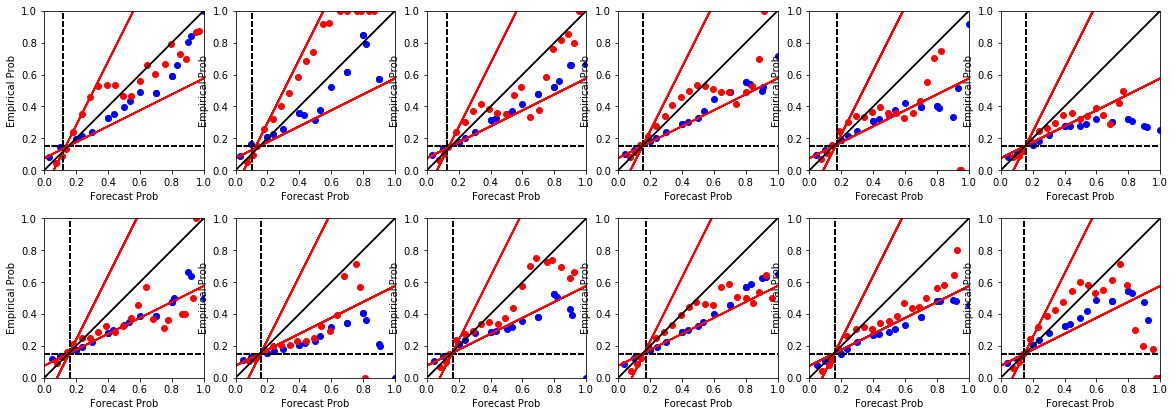

In [377]:
ds_trunc = ds8_M.sel(time=pp.time)

colcol = ['r','b','k']
plt.figure(figsize=(20,7))
# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1,2,2)


ds_merged_all = xr.merge([ds_trunc, pp[['predict']].transpose('lat','lon','time')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_month = ds_merged_all.groupby('time.month')
for k, dsm in ds_month:
    ax1 = plt.subplot(2,6,k)
    ax1.set_aspect('equal')
    df_both = dsm[['y','pr01','predict']].to_dataframe().reset_index()
    df_both = df_both.dropna()
    df_both = df_both.set_index('time')
    values_meanM = df_both.pr01.values
    values_meanC = df_both.predict.values
    for ip in np.arange(0.05,1.05,0.05):
        vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
        vO = df_both.y.values[vM]
        ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
        vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
        vO = df_both.y.values[vC]
        ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')

        ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
        ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
        ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
    #     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
        ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')


    ax1.plot([0,1],[0,1],'-k')
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])

    ax1.set_xlabel('Forecast Prob')
    ax1.set_ylabel('Empirical Prob')
    ax1.plot([0,1],[0,1],'k')

In [370]:
ds_trunc = ds8_M*1.
ds_merged_all = xr.merge([ds_trunc, pp[['predictall']].transpose('lat','lon','time1').rename({'time1':'time'})])
ds_merged_all1 = xr.merge([ds_merged_all, prob_est.to_dataset(name='predict')])
ds_merged_all1

<xarray.Dataset>
Dimensions:     (lat: 28, lon: 71, time: 937)
Coordinates:
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * time        (time) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
    Lead        int64 8
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
Data variables:
    pr          (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    tas         (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    cape        (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    pr01        (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff     (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05   (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05N  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff075  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    na

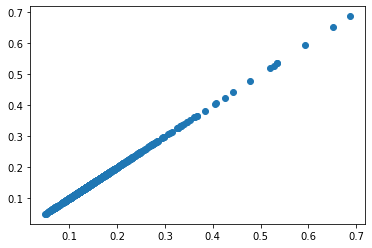

In [371]:
plt.plot(ds_merged_all1.predict.sel(lat=41,lon=260), ds_merged_all1.predictall.sel(lat=41,lon=260).values, 'o')


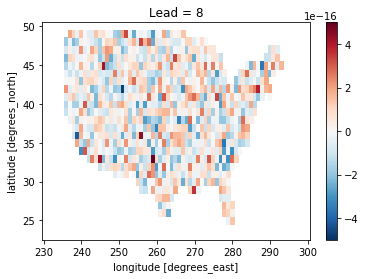

In [372]:
(ds_merged_all1.predict.mean('time')-ds_merged_all1.predictall.mean('time')).plot()

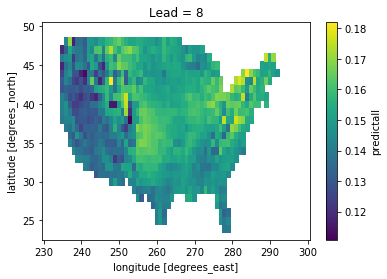

In [343]:
ds_merged_all1.predictall.mean('time').plot()

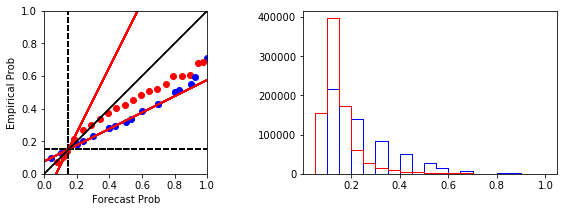

In [373]:
ds_trunc = ds8_M*1.
ds_merged_all = xr.merge([ds_trunc, pp[['predictall']].transpose('lat','lon','time1').rename({'time1':'time'})])
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all# = ds_merged_all.rename({'time1':'time'})

colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')


df_both = ds_merged_all[['y','pr01','predictall']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predictall.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
    vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
    vO = df_both.y.values[vC]
    ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax2.hist(values_meanC, histtype='step',color='r', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')
    
    
ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

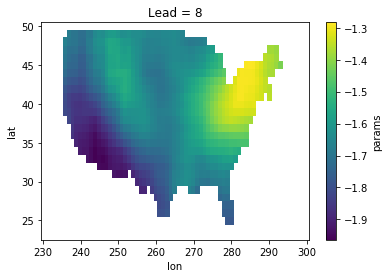

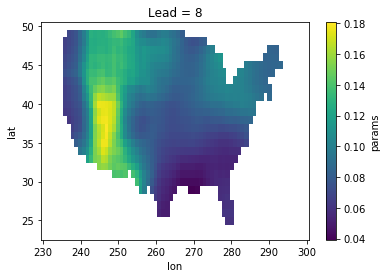

In [247]:
outu = xr.open_dataset('7x7_new.nc')
outu = outu.rename({'__xarray_dataarray_variable__':'params'
})
plt.figure()
outu.params.where(mask_conus)[0].plot()
plt.figure()
outu.params.where(mask_conus)[1].plot()


In [360]:
function = pp.params[0]+pp.params[1]*ds8_M.pr_diff075
prob_est = np.exp(function)/(np.exp(function)+1)
prob_est1 = 1/(1+np.exp(-function))

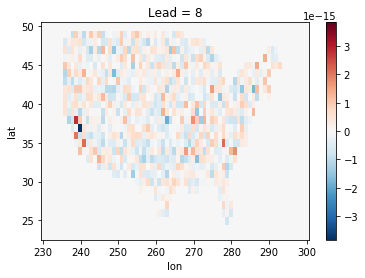

In [362]:
(prob_est-prob_est1).sum('time').plot()

In [349]:
ds_merged_all = xr.merge([ds8_M, prob_est.to_dataset(name='predict')])
ds_merged_all = ds_merged_all.drop('Lead')
ds_merged_all

<xarray.Dataset>
Dimensions:     (lat: 28, lon: 71, time: 937)
Coordinates:
  * lat         (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * time        (time) datetime64[ns] 1999-01-13 1999-01-20 ... 2016-12-28
Data variables:
    pr          (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    tas         (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    cape        (lat, lon, time) float32 nan nan nan nan nan ... nan nan nan nan
    pr01        (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff     (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05   (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff05N  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    pr_diff075  (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan
    narr_diff   (lat, lon, tim

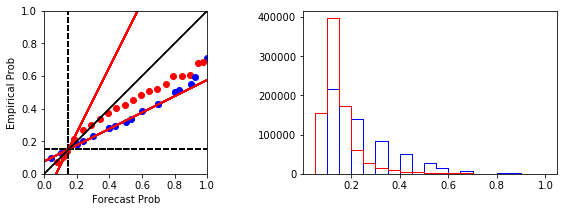

In [355]:
colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.set_aspect('equal')

ds_merged_all = xr.merge([ds8_M, prob_est.to_dataset(name='predict')])
ds_merged_all = ds_merged_all.drop('Lead')
df_both = ds_merged_all[['y','pr01','predict']].to_dataframe().reset_index()
df_both = df_both.dropna()
df_both = df_both.set_index('time')
values_meanM = df_both.pr01.values
values_meanC = df_both.predict.values
for ip in np.arange(0.05,1.05,0.05):
    vM = ((values_meanM>=ip-0.05)&(values_meanM<=ip+0.05))
    vO = df_both.y.values[vM]
    ax1.plot(np.nanmean(values_meanM[vM]),np.nanmean(vO),'bo')
    vC = ((values_meanC>=ip-0.05)&(values_meanC<=ip+0.05))
    vO = df_both.y.values[vC]
    ax1.plot(np.nanmean(values_meanC[vC]),np.nanmean(vO),'ro')
        
    ax2.hist(values_meanM, histtype='step',color='b', bins=np.arange(0.05,1.05,0.05))
    ax2.hist(values_meanC, histtype='step',color='r', bins=np.arange(0.05,1.05,0.05))
    ax1.plot([0,1],np.nanmean(values_obs)*np.array([1,1]), 'k--')
    ax1.plot(np.nanmean(values_meanM)*np.array([1,1]),[0,1], 'k--')
    ax1.plot([0,1], [np.nanmean(values_obs)/2. , np.nanmean(values_obs)+(1-np.nanmean(values_obs))/2.],'r-')
#     ax1.plot([0,1], [-np.nanmean(values_obs)/2. , 1+(1-np.nanmean(values_obs))/2.],'r-')
    ax1.plot([np.nanmean(values_meanM)/2,1-(1-np.nanmean(values_meanM))/2], [0 , 1],'r-')

ax1.plot([0,1],[0,1],'-k')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])

ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

In [232]:
# predictions = result1.predict(testT[['const','apcp','apcp_diff']])
predictions = resultall.predict(testT[['const','apcp','tas','cape','month']])

In [234]:
ROCAUC1 = roc_auc_score(testT['y'].values, predictions.values)
ROCAUC1

0.5959547398924915

In [282]:
ROCAUC1 = roc_auc_score(testT['y'].values, testT['pr01'].values)
ROCAUC1

0.6719387410627867

(array([7.58625707, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.41374293]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

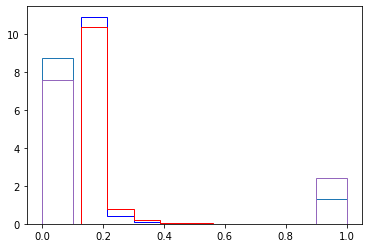

In [236]:
plt.hist(predictions[testT['y']==0].values, histtype='step', density=True, color='blue')
plt.hist(predictions[testT['y']==1].values, histtype='step', density=True, color='red')
plt.hist(testT[testT['y']==0]['apcp01'].values, histtype='step', density=True, color='C00')
plt.hist(testT[testT['y']==1]['apcp01'].values, histtype='step', density=True, color='C04')

In [272]:
trainT.head()

M   lat    lon       apcp         tas        cape  apcp01  \
time                                                                    
1999-01-13  0  25.0  279.0   2.500000  294.760040   29.000000     0.0   
1999-01-27  0  25.0  279.0   0.200000  296.156647    7.333333     0.0   
1999-02-03  0  25.0  279.0  14.999996  296.570038  291.000000     1.0   
1999-02-10  0  25.0  279.0   1.100000  295.333374   91.666664     0.0   
1999-03-10  0  25.0  279.0   0.100000  293.553314  118.666664     0.0   

            apcp_diff    y   Lbeg  month  const  
time                                             
1999-01-13  -6.582710  0.0  14-33      1      1  
1999-01-27  -9.914779  0.0  14-33      1      1  
1999-02-03   4.854448  0.0  14-33      2      1  
1999-02-10  -8.724075  0.0  14-33      2      1  
1999-03-10  -7.193664  0.0  14-33      3      1

In [273]:
trainT['logp'] = np.log(trainT['apcp'])
testT['logp'] = np.log(testT['apcp'])

trainT['logT'] = np.log(trainT['tas'])
testT['logT'] = np.log(testT['tas'])
# trainT['logTd'] = np.log(trainT['apcp'])
# testT['logTd'] = np.log(testT['apcp'])
trainT['logCape'] = np.log(trainT['cape'])
testT['logCape'] = np.log(testT['cape'])

In [274]:
trainT2 = trainT.dropna()

In [275]:
testT2 = testT.dropna()

In [276]:
trainT2 = trainT2.replace([np.inf, -np.inf], np.nan).dropna()
testT2 = testT2.replace([np.inf, -np.inf], np.nan).dropna()


In [240]:
logit_model=sm.Logit(trainT2['y'],trainT2[['const','logp','logCape']])
result1=logit_model.fit(disp=0,maxiter=100)
predictions = result1.predict(testT2[['const','logp','lon','lat']])

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              2657794
Model:                          Logit   Df Residuals:                  2657791
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                 0.01060
Time:                        13:37:30   Log-Likelihood:            -1.2226e+06
converged:                       True   LL-Null:                   -1.2357e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7121      0.002   -851.842      0.000      -1.716      -1.708
apcp           0.0110      0.000    104.298      0.000       0.011       0.011
logp           0.0357      0.001     58.021      0.0

KeyboardInterrupt: 

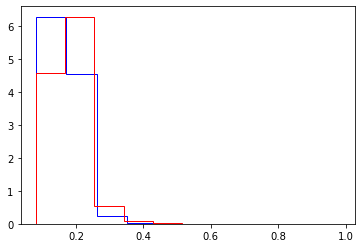

In [278]:
for varname in ['logp','logCAPE']:
    logit_model=sm.Logit(trainT2['y'],trainT2[['const','apcp',varname]])
    resultall=logit_model.fit(disp=0,maxiter=100)
    print(resultall.summary())
    predictions = resultall.predict(testT2[['const','apcp',varname]])
    print(roc_auc_score(testT2['y'].values, predictions.values))
    plt.figure()
    plt.hist(predictions[testT2['y']==0].values, histtype='step', density=True, color='blue')
    plt.hist(predictions[testT2['y']==1].values, histtype='step', density=True, color='red')
    plt.hist(testT[testT2['y']==0]['apcp01'].values, histtype='step', density=True, color='C00')
    plt.hist(testT[testT2['y']==1]['apcp01'].values, histtype='step', density=True, color='C04')


In [241]:
result1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit            Pseudo R-squared: 0.009       
Dependent Variable: y                AIC:              2969548.8693
Date:               2020-10-09 13:05 BIC:              2969600.9651
No. Observations:   3348285          Log-Likelihood:   -1.4848e+06 
Df Model:           3                LL-Null:          -1.4987e+06 
Df Residuals:       3348281          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     6.0000                                         
---------------------------------------------------------------------
            Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
---------------------------------------------------------------------
const      -0.0101     0.0328    -0.3086   0.7576   -0.0744    0.0542
logp        0.0660     0.0004   146.8000   0.0000    0.0651    0.0668
lon        -0.0053     0.0001   -48.1984   0.0000   -0.0055   -0.0051
lat        -0.0063     0.0003   -24.2242   0.0000   -0.0068   -0.0058
===================================================================

"""

In [242]:
ROCAUC1 = roc_auc_score(testT2['y'].values, predictions.values)
ROCAUC1

0.5857661548508342

(array([ 0.57157647,  1.55474758,  0.02123158,  0.0466536 ,  1.56890197,
         9.11970831, 19.25266581, 15.58891467,  3.41390759,  0.19276039]),
 array([0.04519043, 0.06467181, 0.08415319, 0.10363457, 0.12311595,
        0.14259733, 0.16207871, 0.18156009, 0.20104147, 0.22052285,
        0.24000422]),
 <a list of 1 Patch objects>)

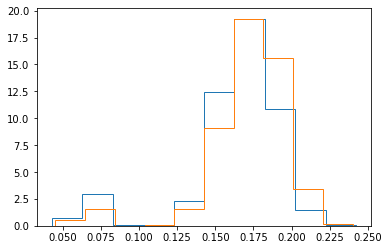

In [95]:
plt.hist(predictions[testT2['y']==0].values, histtype='step', density=True)
plt.hist(predictions[testT2['y']==1].values, histtype='step', density=True)

In [96]:
trainT.describe()

M           lat           lon          apcp           tas  \
count  4.338310e+06  4.338310e+06  4.338310e+06  4.338310e+06  4.338310e+06   
mean   4.500845e+00  3.940062e+01  2.613262e+02  6.996756e+00  2.809140e+02   
std    2.872721e+00  5.708697e+00  1.402403e+01  1.319786e+01  1.236169e+01   
min    0.000000e+00  2.500000e+01  2.360000e+02 -3.357232e-05  2.366300e+02   
25%    2.000000e+00  3.500000e+01  2.500000e+02  2.384186e-07  2.765900e+02   
50%    5.000000e+00  4.000000e+01  2.610000e+02  1.500000e+00  2.861100e+02   
75%    7.000000e+00  4.400000e+01  2.720000e+02  8.300000e+00  2.945000e+02   
max    9.000000e+00  4.900000e+01  2.930000e+02  6.559000e+02  3.151334e+02   

               cape        apcp01     apcp_diff             y         month  \
count  4.338310e+06  4.338310e+06  4.338310e+06  4.338310e+06  4.338310e+06   
mean   1.592728e+02  1.463902e-01 -7.778686e+00  1.505377e-01  6.537999e+00   
std    3.704633e+02  3.534970e-01  1.345027e+01  3.575977e-01  3.444493e+00   
min    0.000000e+00  0.000000e+00 -7.805864e+01  0.000000e+00  1.000000e+00   
25%    0.000000e+00  0.000000e+00 -1.567669e+01  0.000000e+00  4.000000e+00   
50%    3.666667e+00  0.000000e+00 -7.564438e+00  0.000000e+00  7.000000e+00   
75%    9.966666e+01  0.000000e+00 -2.065742e+00  0.000000e+00  1.000000e+01   
max    4.818667e+03  1.000000e+00  6.103508e+02  1.000000e+00  1.200000e+01   

           const          logp  
count  4338310.0  4.109769e+06  
mean         1.0          -inf  
std          0.0           NaN  
min          1.0          -inf  
25%          1.0 -2.302591e+00  
50%          1.0  6.418539e-01  
75%          1.0  2.193885e+00  
max          1.0  6.486008e+00

In [98]:
result1.params.values

array([-0.00441705,  0.06473927, -0.00530903, -0.00629758])

In [99]:
trainT_1 = trainT[trainT['y']==1]
trainT_0 = trainT[trainT['y']==0]
params_all = []
for isample in np.arange(0,20):
    print(isample)
    pick15_0 = random.sample(range(trainT_0.shape[0]), int(trainT_1.shape[0]))
    pick15_0 = np.sort(pick15_0)
    trainT_015 = trainT_0.iloc[pick15_0]
    train_sub = trainT_1.append(trainT_015)
    logit_model=sm.Logit(train_sub['y'],train_sub[['const','apcp','tas','cape','month']])
    result1=logit_model.fit(disp=0,maxiter=100)
    params_all.append(result1.params.values)
    predictions = result1.predict(train_sub[['const','apcp','tas','cape','month']])
    ROCAUC1 = roc_auc_score(train_sub['y'].values, predictions.values)
    print(ROCAUC1)

#     print(result1.summary())
    

0
0.5987984425619206
1
0.5986756686133071
2
0.5979430300264714
3
0.5988960350339025
4
0.5990604196452874
5
0.5989471295723696
6
0.5990204978182244
7
0.5988616708441346
8
0.5988423870877003
9
0.5985619404450456
10
0.5993060282981069
11
0.5985466585485326
12
0.5993014169034241
13
0.5990893823843892
14
0.5989820366211941
15
0.5985886187570074
16
0.5988701955959902
17
0.5979149011803192
18
0.5988345796846432
19
0.5988893005099355


In [100]:
parall = np.asarray(params_all)
parall.shape

(20, 5)

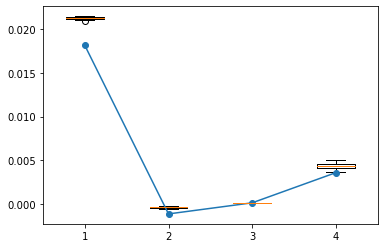

In [101]:
plt.boxplot(parall[:,1:])
plt.plot(np.array([1,2,3,4]),resultall.params.values[1:],'o-')

# Do on the mean

In [113]:
df_LR_meanM = ds_combined_meanM.sel(Lead=8).to_dataframe()
df_LR_meanM = df_LR_meanM.reset_index()
df_LR_meanM = df_LR_meanM.set_index('time')
df_LR_meanM = df_LR_meanM.drop(columns=['Lead'])
df_LR_meanMnonan = df_LR_meanM.dropna()
df_LR_meanMnonan['month'] = df_LR_meanMnonan.index.month
df_LR_meanMnonan['tas']  = df_LR_meanMnonan['tas']/3.
df_LR_meanMnonan['cape'] = df_LR_meanMnonan['cape']/3.

picktrain_mM = random.sample(range(df_LR_meanMnonan.shape[0]), int(df_LR_meanMnonan.shape[0]/2))
picktrain_mM = np.sort(picktrain_mM)
picktest_mM = missing_elements(picktrain_mM,0,int(df_LR_meanMnonan.shape[0])-1)

trainT_mM = df_LR_meanMnonan.iloc[picktrain_mM]
testT_mM = df_LR_meanMnonan.iloc[picktest_mM]
trainT_mM['const']=1
testT_mM['const']=1

trainT_mM['logp'] = np.log(trainT_mM['apcp'])
testT_mM['logp'] = np.log(testT_mM['apcp'])

In [114]:
logit_model=sm.Logit(trainT_mM['y'],trainT_mM[['const','apcp01']])
resultall_mM=logit_model.fit(disp=0,maxiter=100)
resultall_mM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               433831
Model:                          Logit   Df Residuals:                   433829
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:                 0.05896
Time:                        11:45:06   Log-Likelihood:            -1.7268e+05
converged:                       True   LL-Null:                   -1.8350e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3338      0.006   -361.976      0.000      -2.346      -2.321
apcp01         3.3565      0.023    147.942      0.000       3.312       3.401
==============================================================================
"""

In [115]:
predictions = resultall_mM.predict(testT_mM[['const','apcp01']])

In [116]:
ROCAUC1 = roc_auc_score(testT_mM['y'].values, predictions.values)
ROCAUC1

0.6738614848146816

In [117]:
ROCAUC1 = roc_auc_score(testT_mM['y'].values, testT_mM['apcp01'].values)
ROCAUC1

0.6738614848146816

(array([1.80638555, 2.15195097, 3.41851473, 0.        , 1.08147763,
        1.09584435, 0.24102462, 0.        , 0.12807776, 0.07672439]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

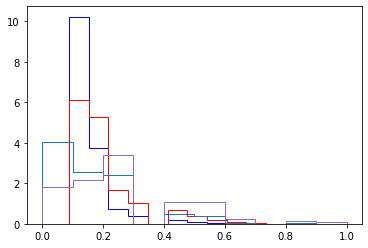

In [118]:
plt.hist(predictions[testT_mM['y']==0].values, histtype='step', density=True, color='blue')
plt.hist(predictions[testT_mM['y']==1].values, histtype='step', density=True, color='red')
plt.hist(testT_mM[testT_mM['y']==0]['apcp01'].values, histtype='step', density=True, color='C00')
plt.hist(testT_mM[testT_mM['y']==1]['apcp01'].values, histtype='step', density=True, color='C04')

# Spatiallyvarying

In [236]:
# def correlate_target_clim(dsin):
# #     print(np.sum(np.isnan(dsin.pr_sfc.values)==0))
# #     print(np.sum(np.isnan(dsin.apcp.values)==0))
    
# #     if np.sum(np.isnan(dsin.pr_sfc))==0:
# #         print(np.sum(np.isnan(dsin.pr_sfc.values)==0))
# #         print(np.sum(np.isnan(dsin.pr_sfc.values)==0))
#     out = np.corrcoef(dsin.pr_sfc.values,dsin.apcp.values)
# #         print(out)
#     out=out[0][1]
# #     else:
# #         out=np.nan
# # #         print(np.sum(np.isnan(dsin.apcp.values)==0))
# #         print(np.sum(np.isnan(dsin.pr_sfc.values)==0))
#     # we need to return a dataarray or else xarray's groupby won't be happy
#     return xr.DataArray(out)

def fit_to_kernel(dsin):
#     print(dsin)
    
    df= dsin.to_dataframe()
    df = df.reset_index()
    df = df.set_index('time')
    df = df.dropna()
#     print(df.count()[0])
    if df.count()[0]>0:
        df['month'] = df.index.month
        df['tas']  = df['tas']/3.
        df['cape'] = df['cape']/3.

#         pick= random.sample(range(df.shape[0]), int(df.shape[0]/2))
#         pick = np.sort(pick)
#         picktest = missing_elements(pick,0,int(df.shape[0])-1)

#         train = df.iloc[pick]
#         test = df.iloc[picktest]
#         train['const']=1
#         test['const']=1

        df['const']=1
        df['const']=1

        logit_model=sm.Logit(df['y'],df[['const','apcp']])
        resultall=logit_model.fit(disp=0,maxiter=100)
        resultall=resultall.params.values
#         print(resultall)
    else:
        resultall=np.array([np.nan, np.nan])
    return xr.DataArray(resultall)

    

In [ ]:
def try_2droll(dsin):
    print(dsin)
    return

In [244]:
pd.__version__

'0.24.2'

In [261]:
ds_combined_meanM.nbytes/1e9

0.513777868

In [262]:
ds_combined_meanM.to_netcdf('ds_combined_meanM.nc')

In [ ]:
def fit_to_kernel(dsin):    
    df= dsin.to_dataframe()
    df = df.reset_index()
    df = df.set_index('time')
    df = df.dropna()
    if df.count()[0]>0:
        df['month'] = df.index.month
        df['tas']  = df['tas']/3.
        df['cape'] = df['cape']/3.
        df['const']=1
        df['const']=1
        logit_model=sm.Logit(df['y'],df[['const','apcp']])
        resultall=logit_model.fit(disp=0,maxiter=100)
        resultall=resultall.params.values
    else:
        resultall=np.array([np.nan, np.nan])
    return xr.DataArray(resultall)

ds_fun = ds_combined_meanM.isel(Lead=0)#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.drop('Lead')
ds_fun = ds_fun.rolling(lat=7, lon=7,center=True).construct(window_dim={'lat':'yy','lon':'xx'})
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out_lat = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)



In [251]:
# dstemp = ds_combined_meanM.isel(Lead=0)
# ds_fun = xr.concat([dstemp.apcp, 
#                     dstemp.tas, dstemp.cape, 
#                     dstemp.apcp01, dstemp.apcp_diff, 
#                     dstemp.y
#           ], dim='variable')
# ds_fun.coords['variable'] = list(dstemp.var())

# ds_fun = ds_fun.to_dataset(name='data')
ds_fun = ds_combined_meanM.isel(Lead=0)#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.drop('Lead')
ds_fun = ds_fun.rolling(lat=7, center=True).construct('window')
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out_lat = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)

ds_fun = ds_combined_meanM.isel(Lead=0)#.sel(lat=slice(30,34), lon=slice(240, 250))
ds_fun = ds_fun.drop('Lead')
ds_fun = ds_fun.rolling(lon=7, center=True).construct('window')
ds_fun_stack = ds_fun.stack(allpoints=['lat','lon']) 
out_lon = ds_fun_stack.groupby('allpoints').apply(fit_to_kernel)


In [252]:
out.allpoints[0:14]

<xarray.DataArray 'allpoints' (allpoints: 14)>
array([(23.0, 230.0), (23.0, 231.0), (23.0, 232.0), (23.0, 233.0),
       (23.0, 234.0), (23.0, 235.0), (23.0, 236.0), (23.0, 237.0),
       (23.0, 238.0), (23.0, 239.0), (23.0, 240.0), (23.0, 241.0),
       (23.0, 242.0), (23.0, 243.0)], dtype=object)
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - lat        (allpoints) float64 23.0 23.0 23.0 23.0 ... 23.0 23.0 23.0 23.0
  - lon        (allpoints) float64 230.0 231.0 232.0 233.0 ... 241.0 242.0 243.0

In [254]:
out_u1 = out_lat.unstack()
out_u2= out_lon.unstack()

In [256]:
out_u =( out_u1+out_u2)/2

In [270]:
outu = xr.open_dataset('7x7out.nc')
outu = outu.rename({'__xarray_dataarray_variable__':'params'
})

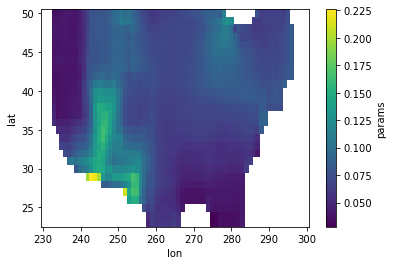

In [271]:
outu.params[1].plot()

In [363]:
ds_combined_meanM.time

<xarray.DataArray 'time' (time: 2809)>
array(['1999-01-13T00:00:00.000000000', '1999-01-15T00:00:00.000000000',
       '1999-01-17T00:00:00.000000000', ..., '2016-12-23T00:00:00.000000000',
       '2016-12-25T00:00:00.000000000', '2016-12-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28

KeyboardInterrupt: 

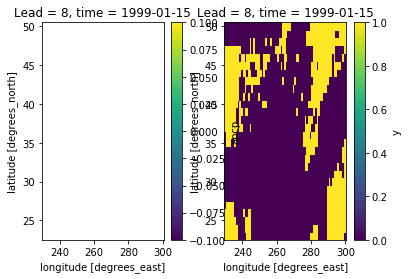

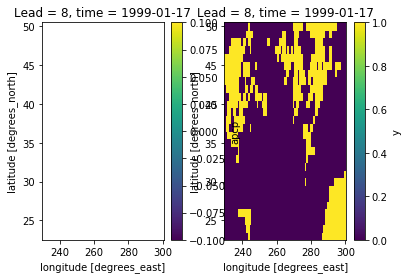

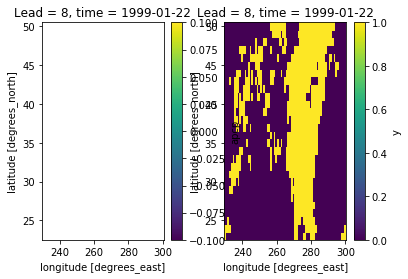

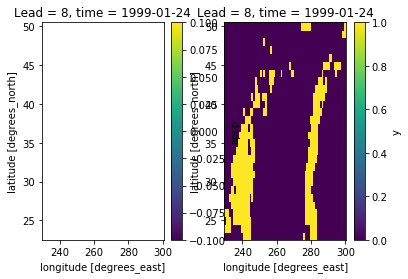

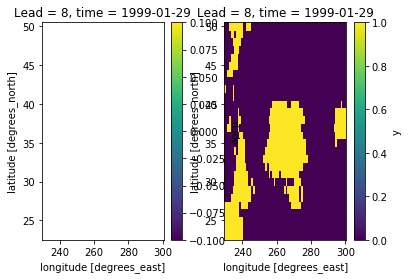

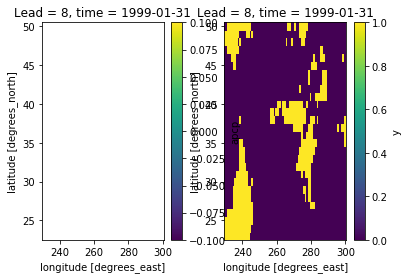

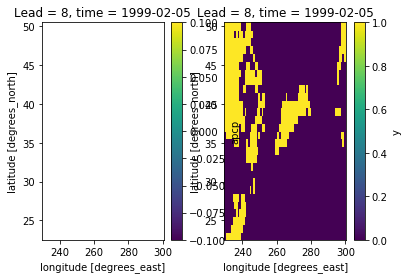

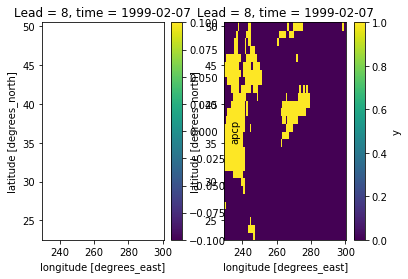

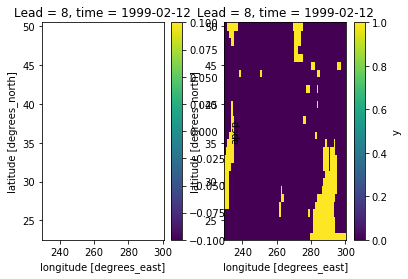

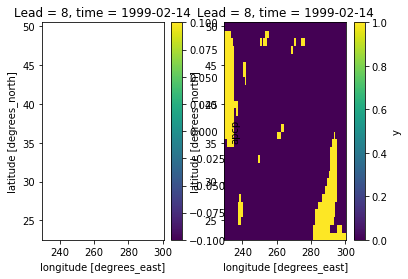

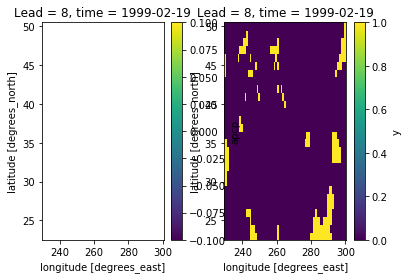

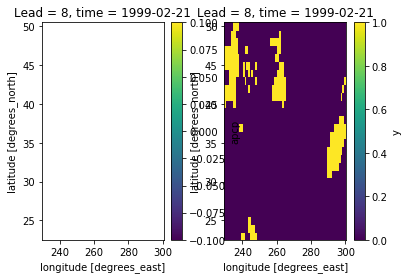

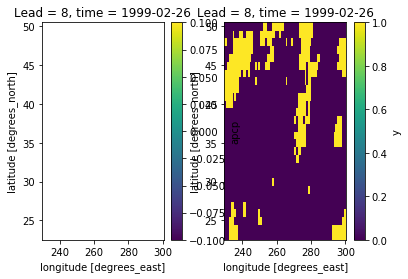

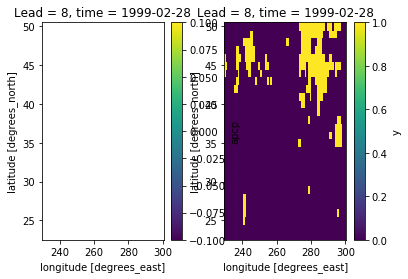

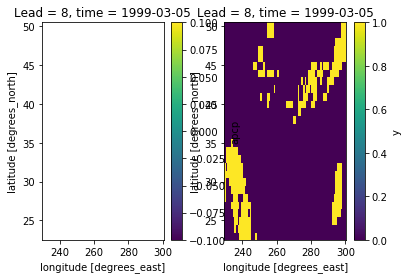

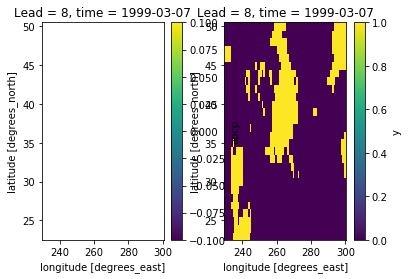

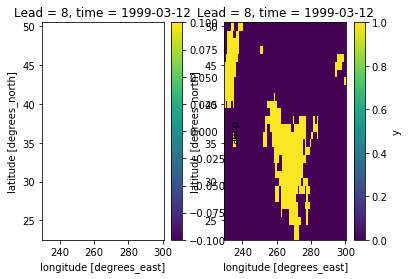

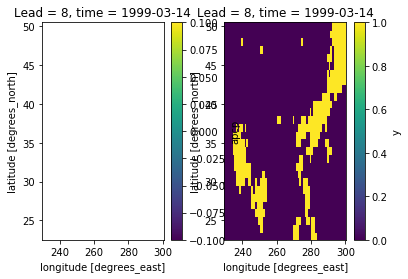

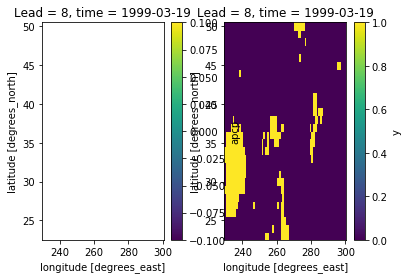

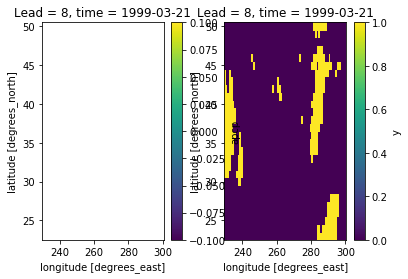

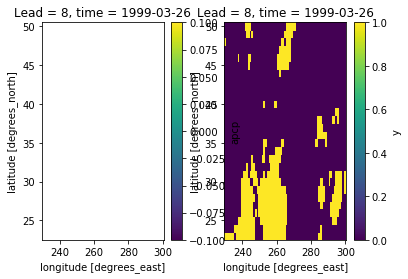

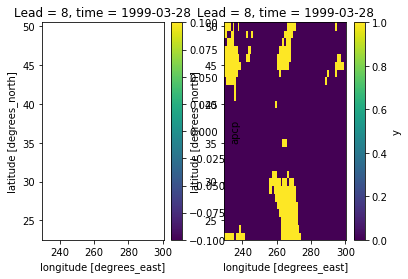

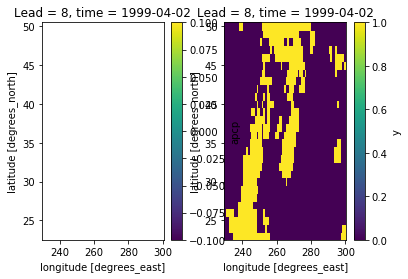

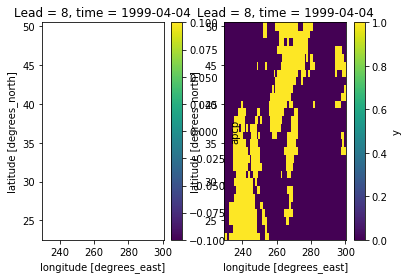

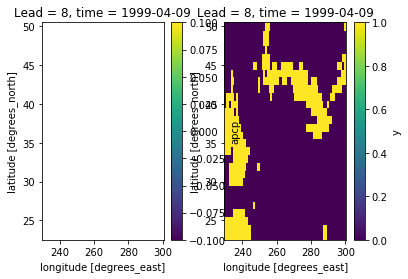

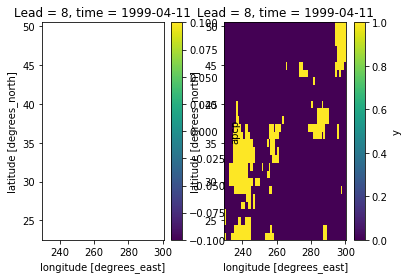

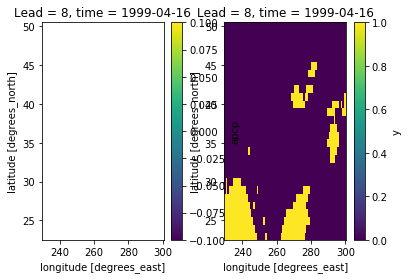

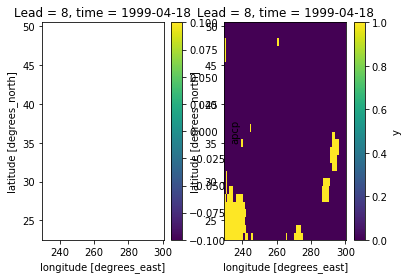

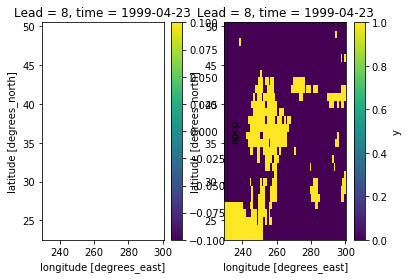

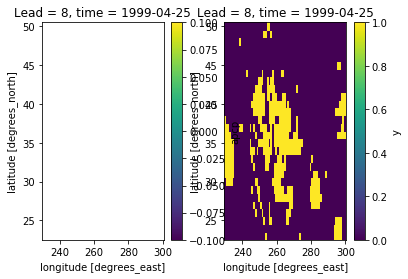

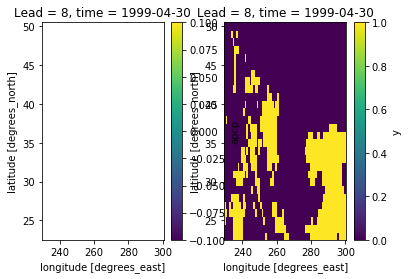

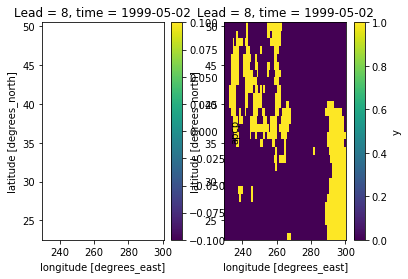

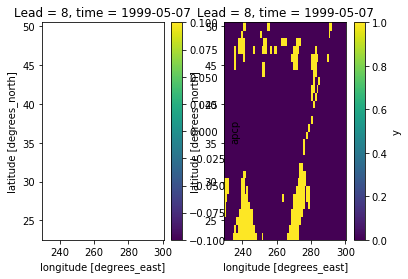

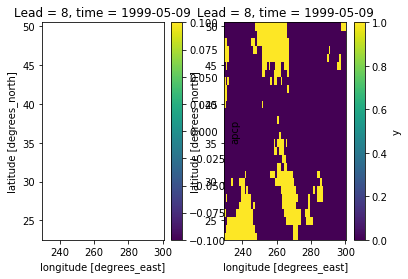

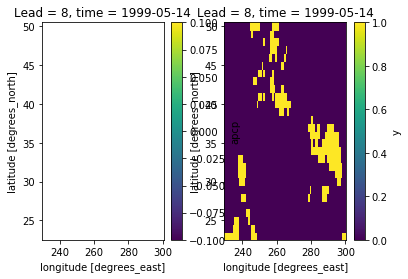

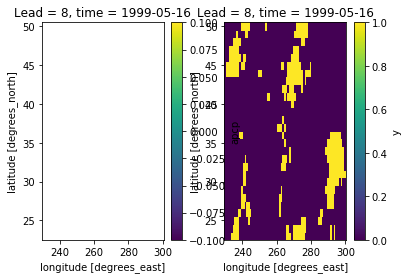

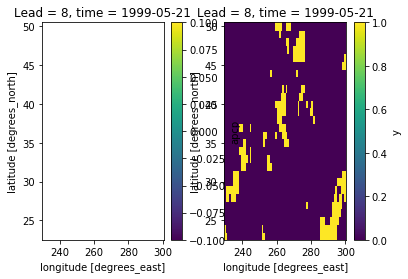

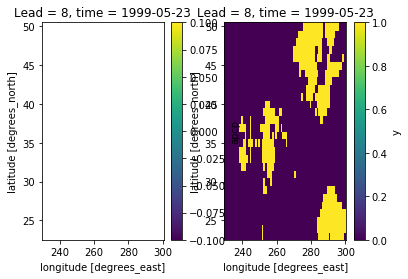

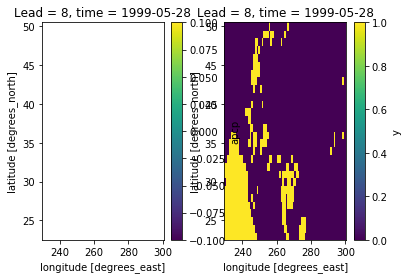

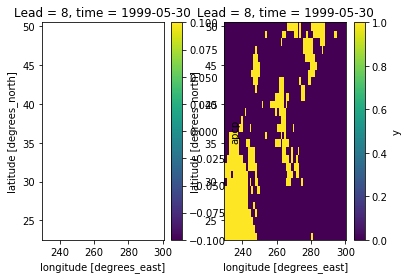

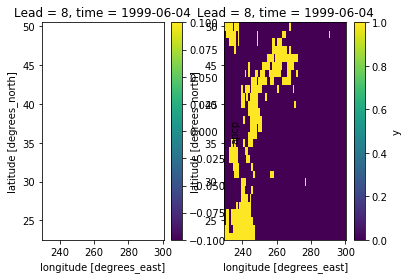

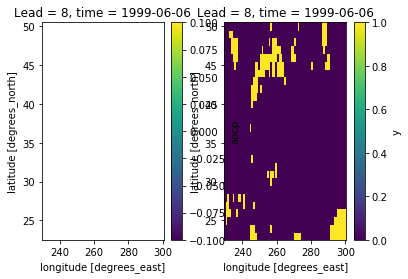

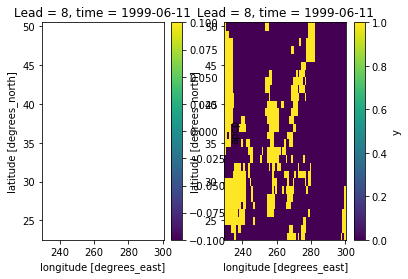

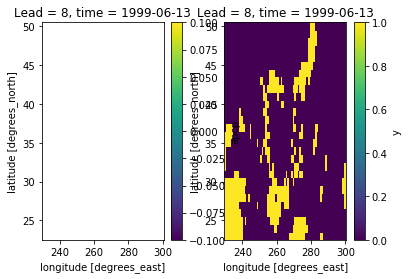

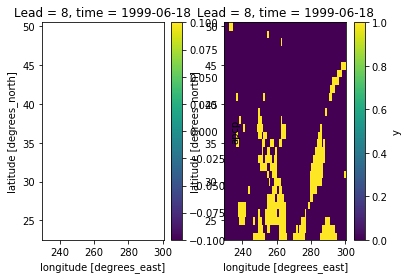

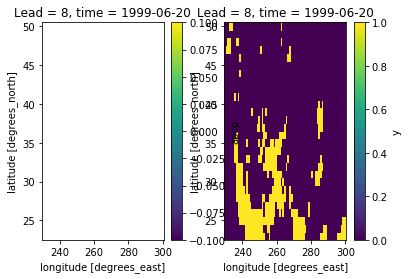

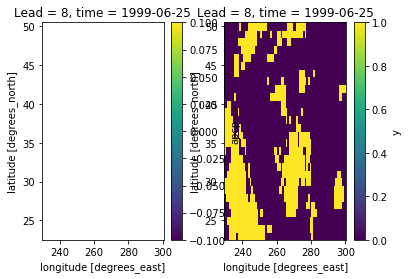

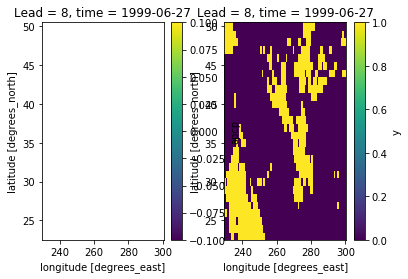

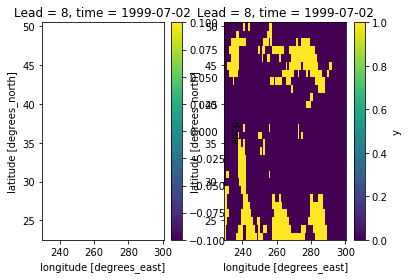

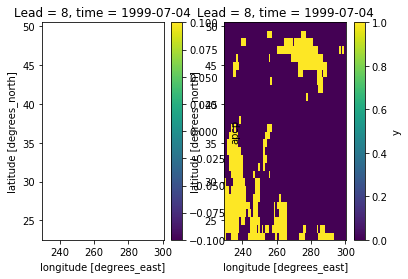

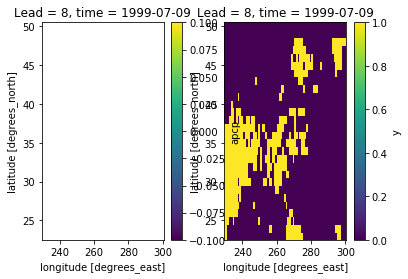

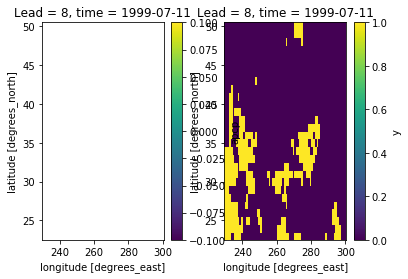

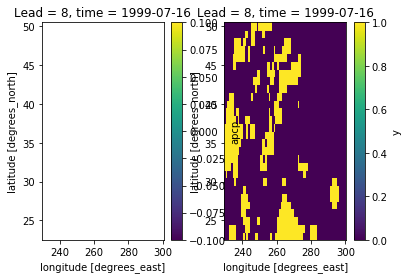

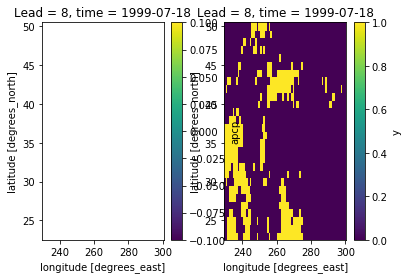

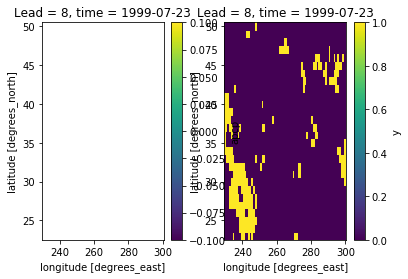

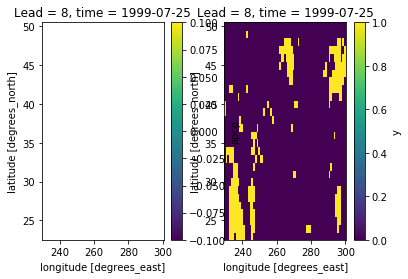

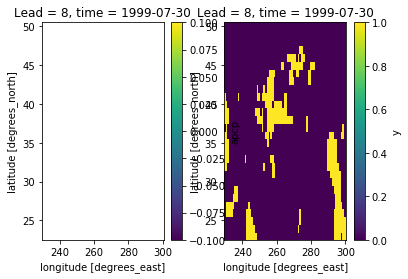

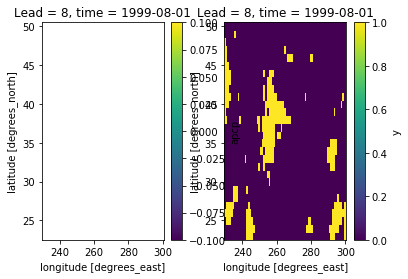

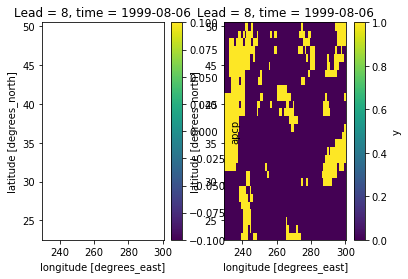

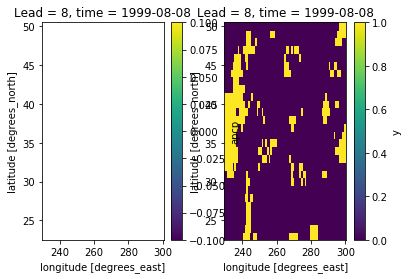

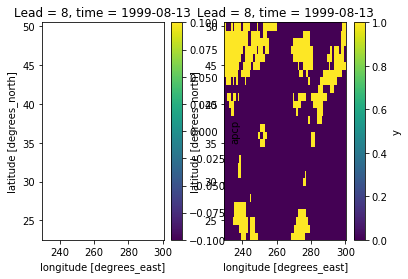

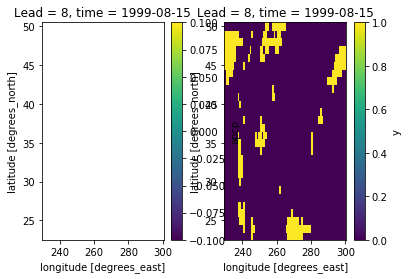

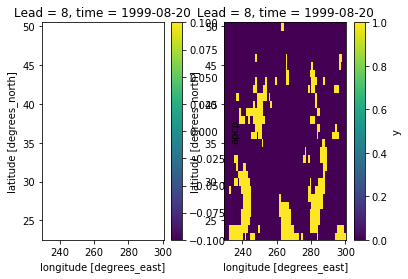

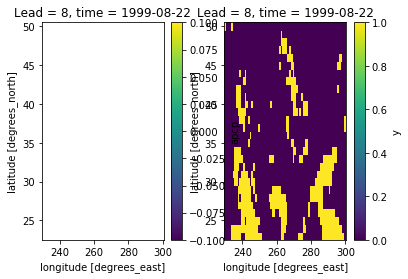

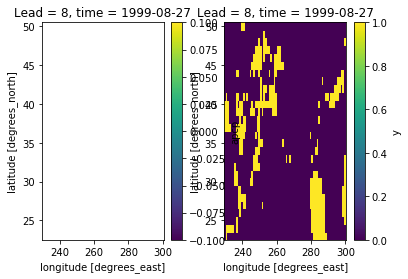

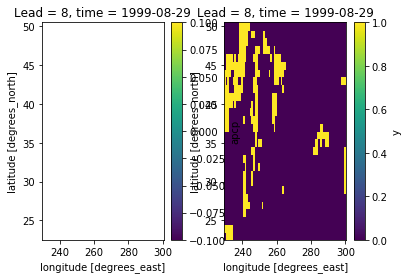

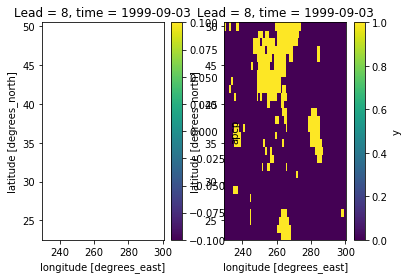

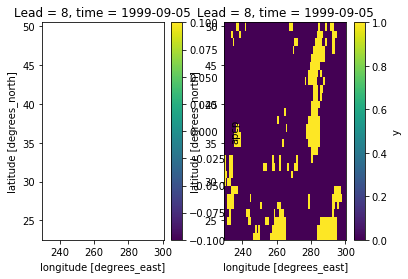

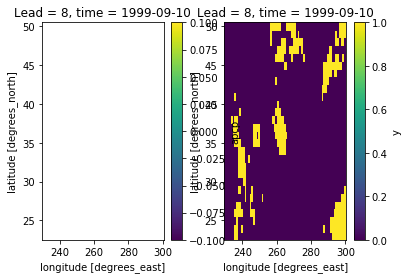

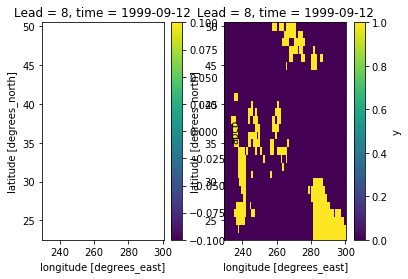

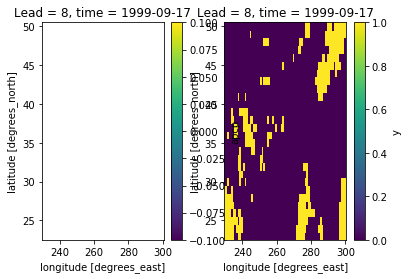

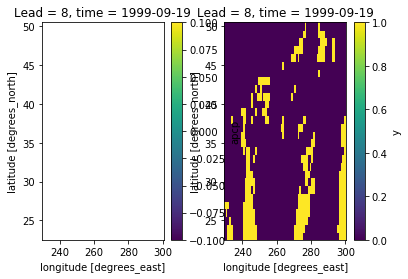

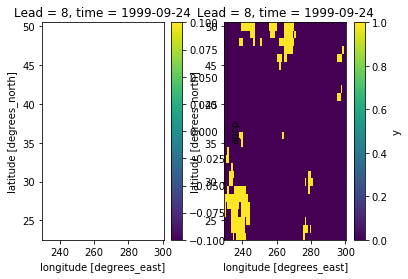

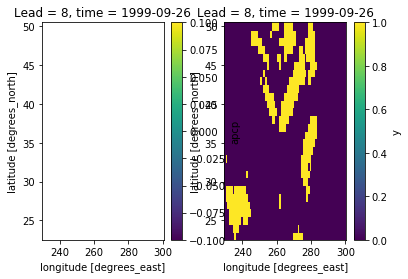

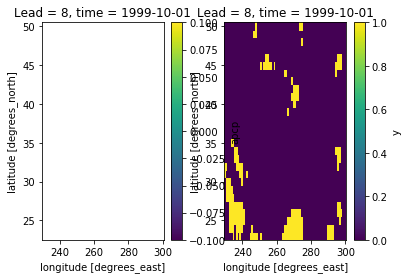

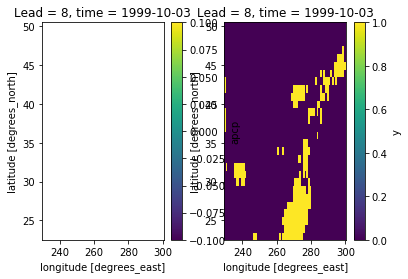

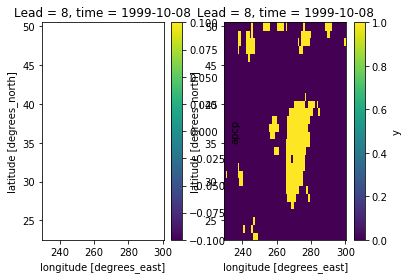

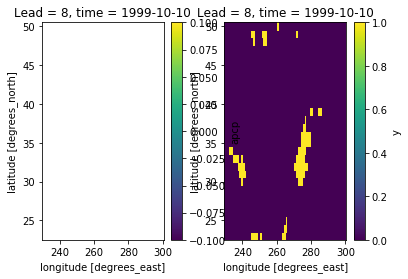

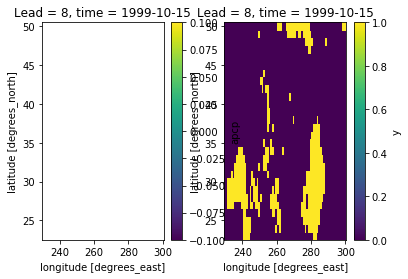

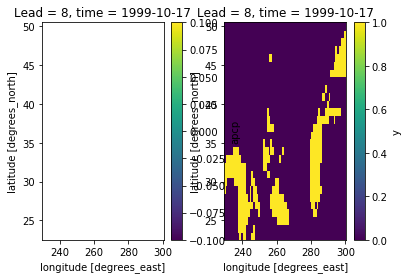

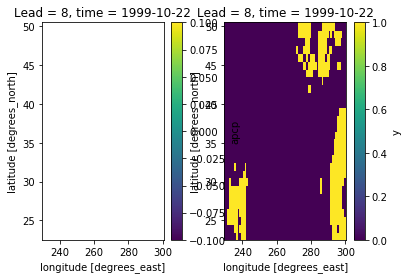

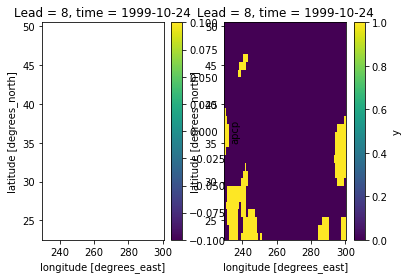

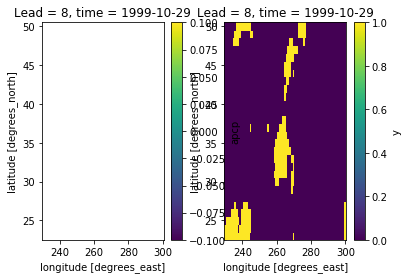

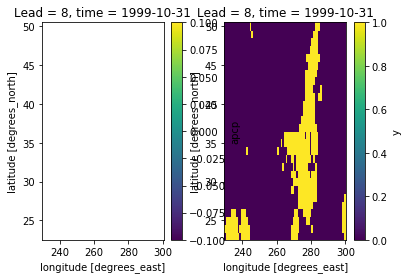

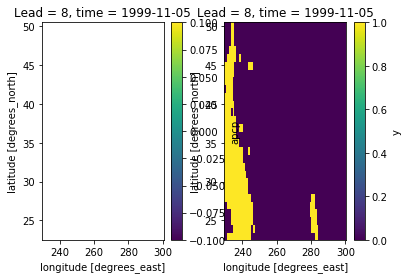

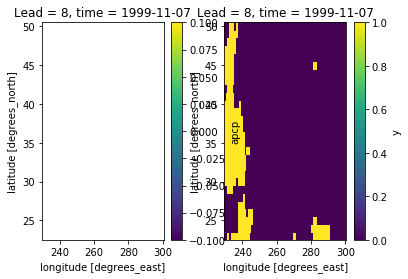

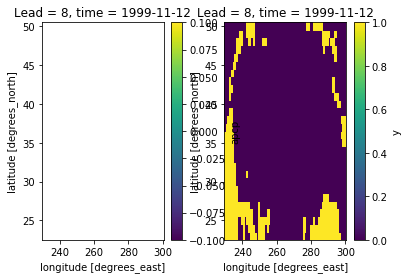

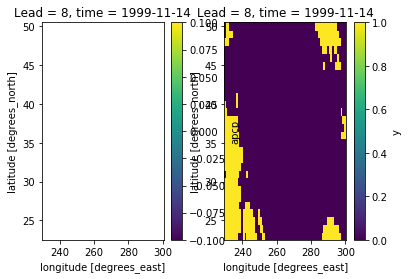

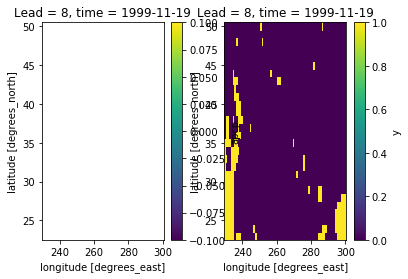

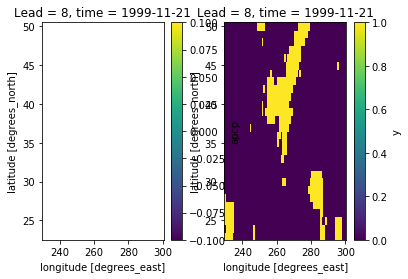

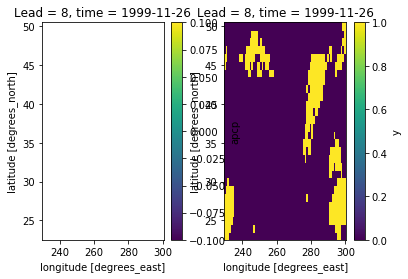

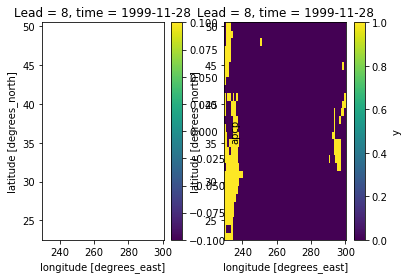

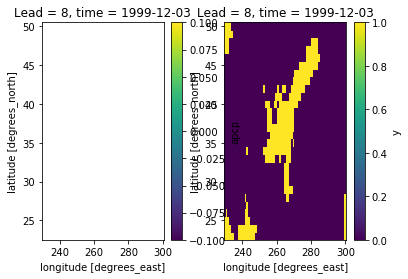

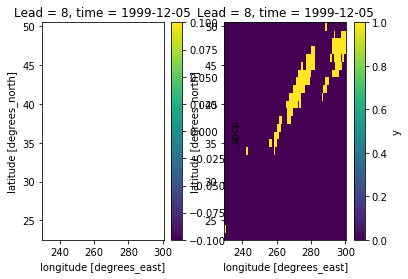

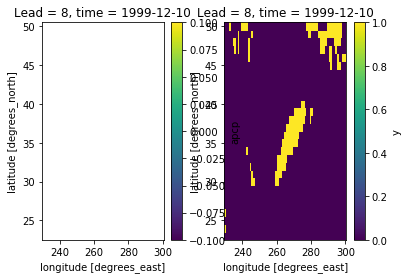

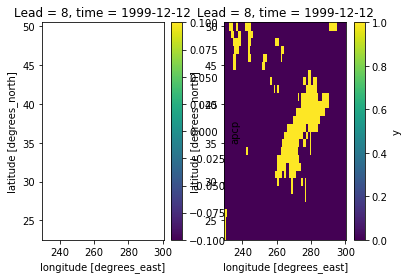

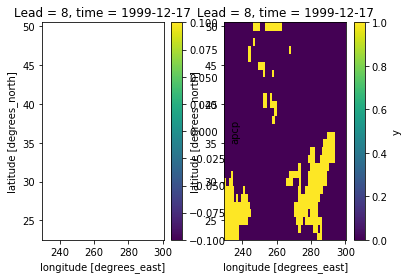

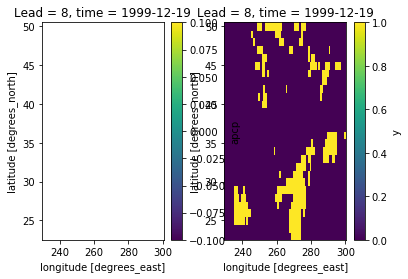

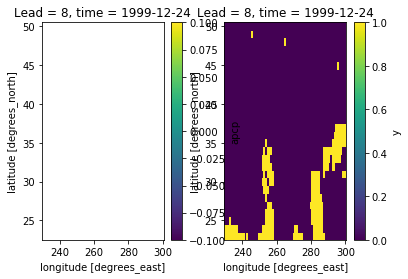

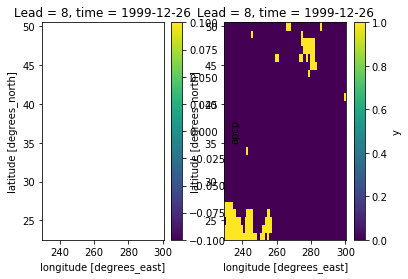

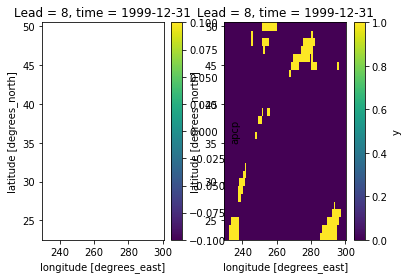

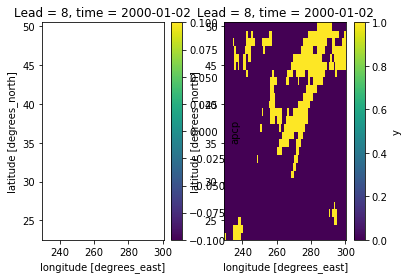

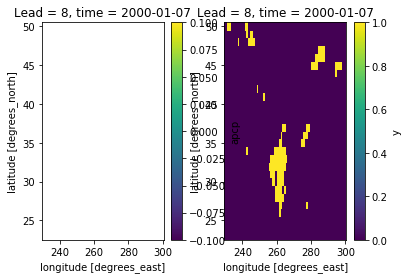

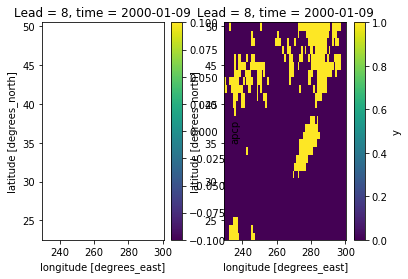

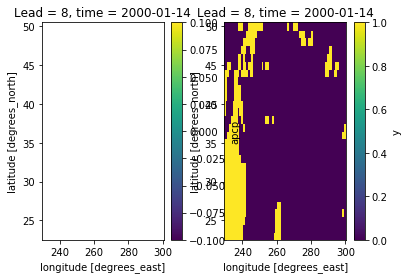

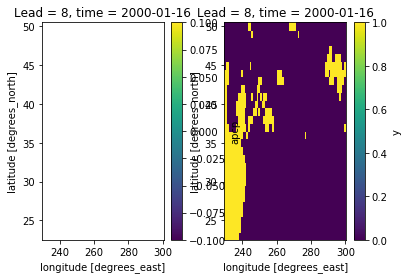

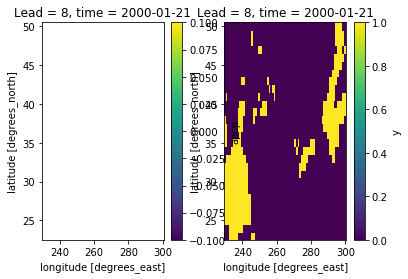

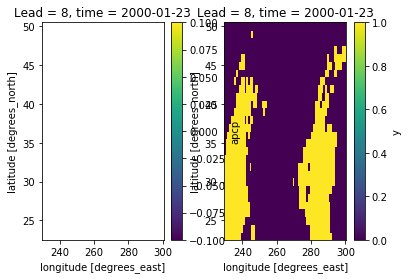

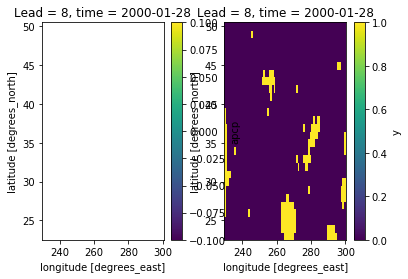

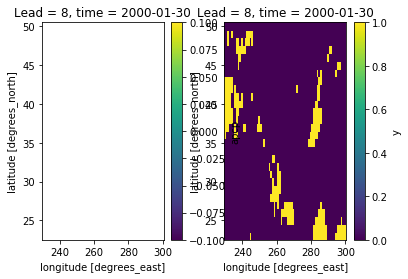

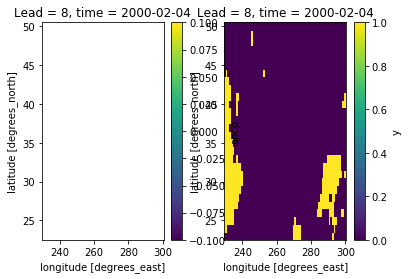

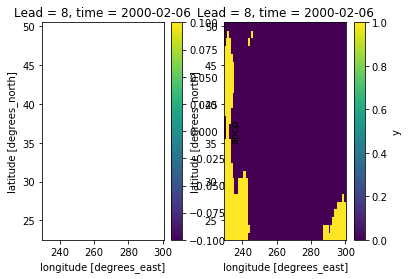

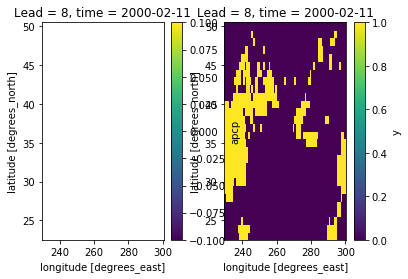

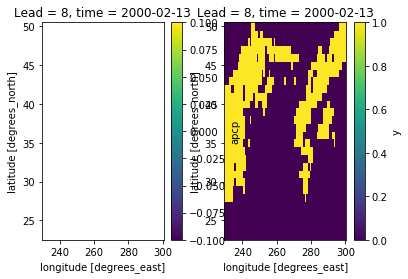

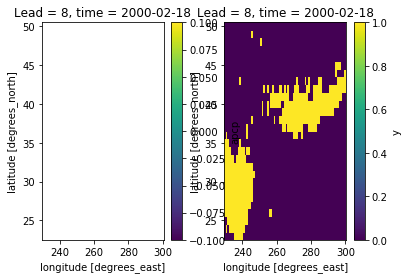

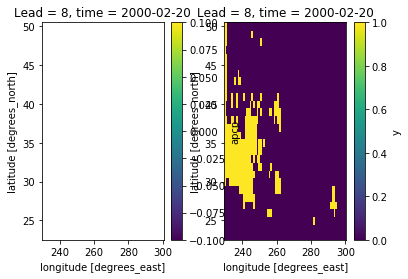

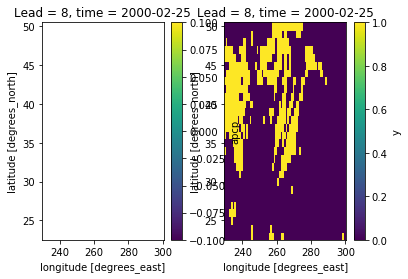

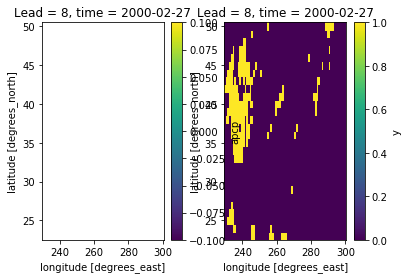

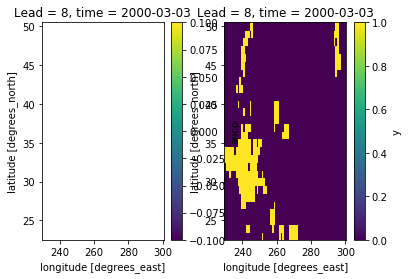

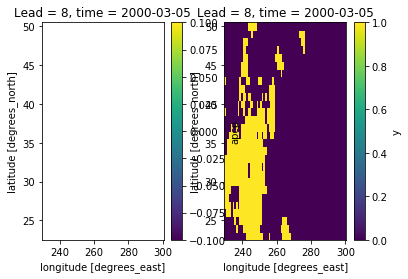

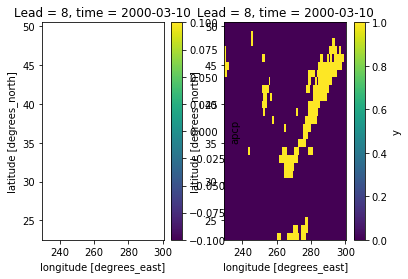

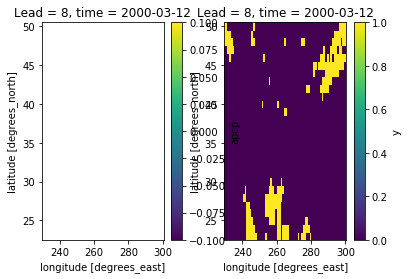

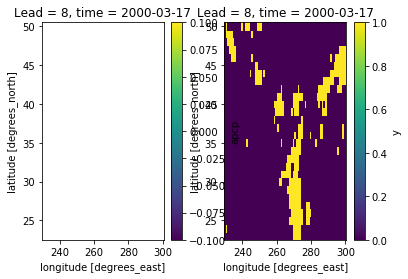

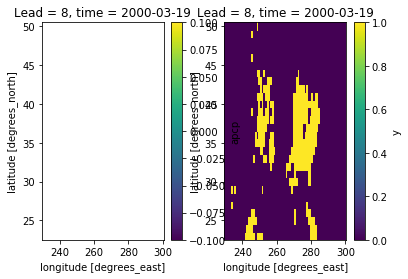

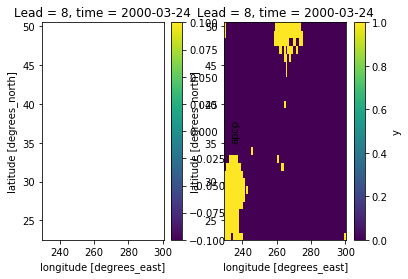

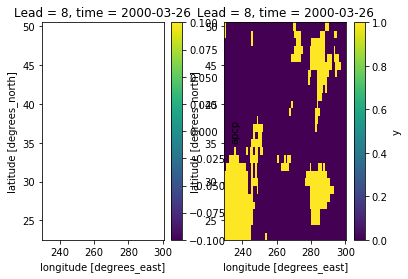

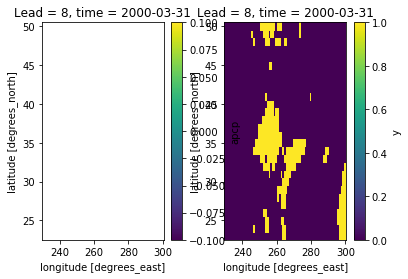

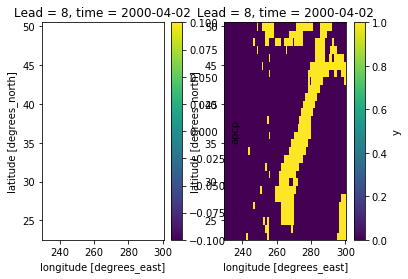

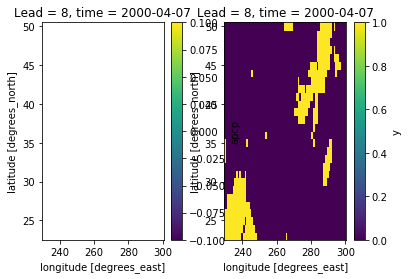

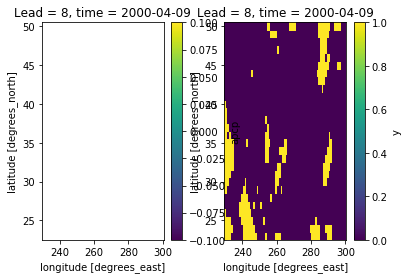

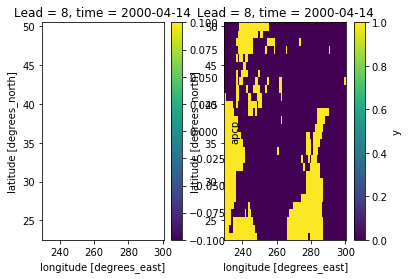

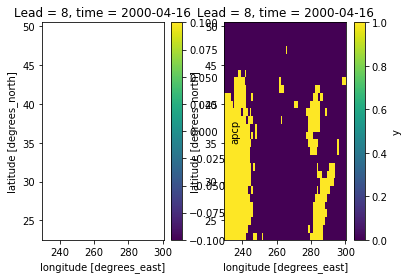

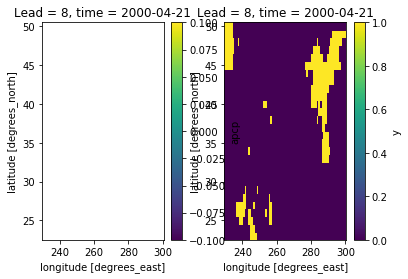

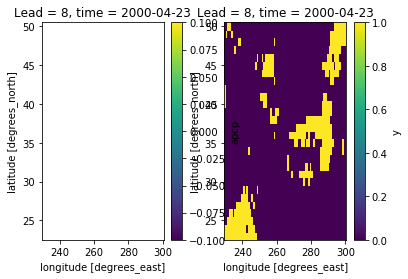

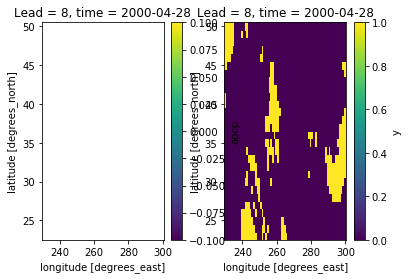

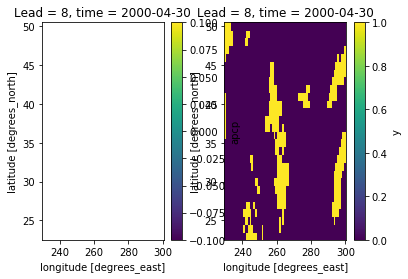

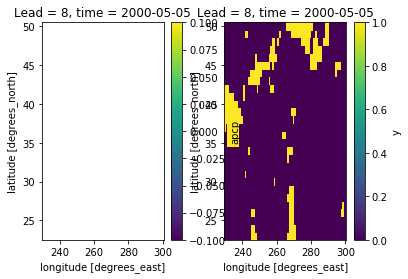

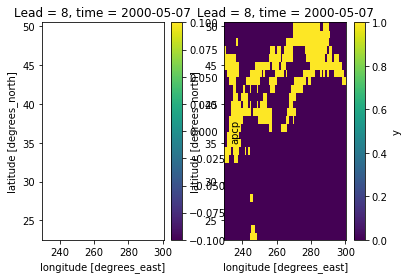

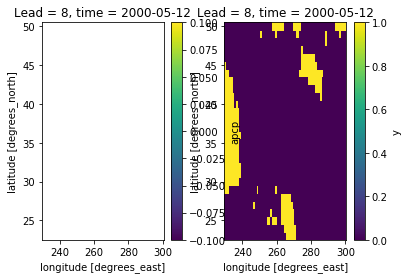

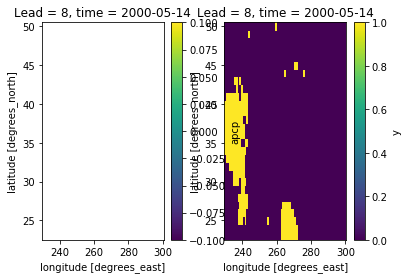

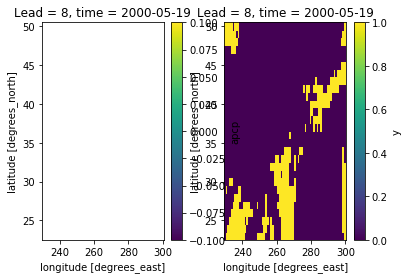

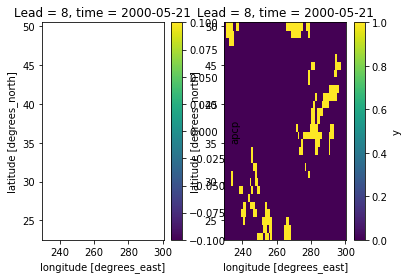

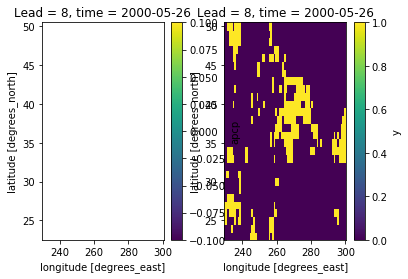

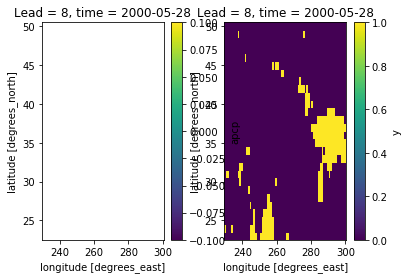

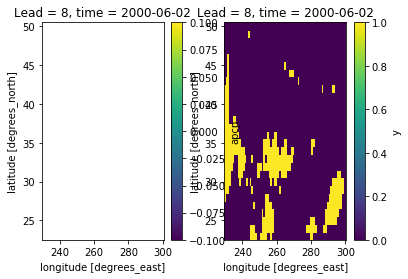

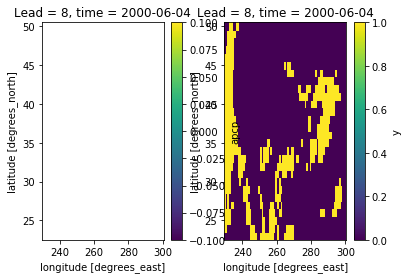

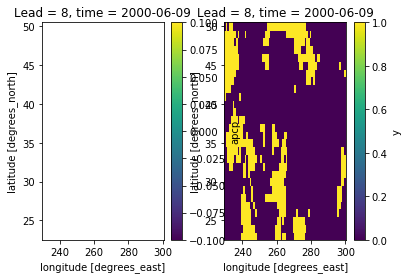

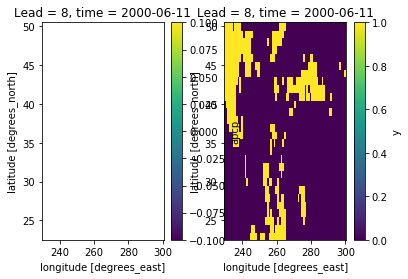

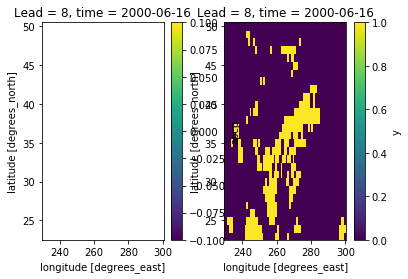

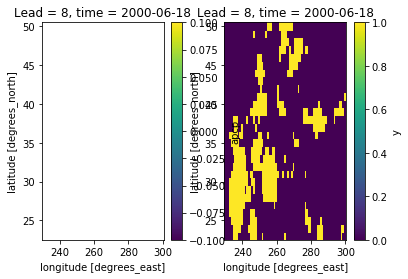

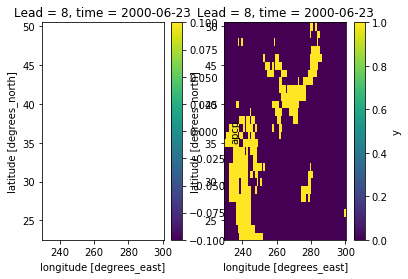

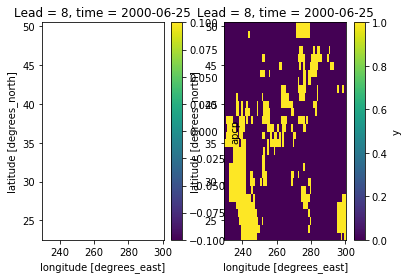

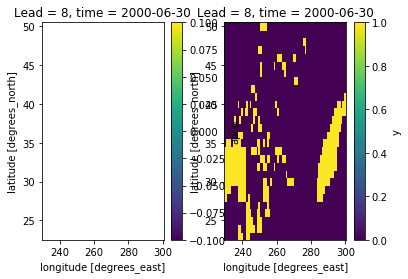

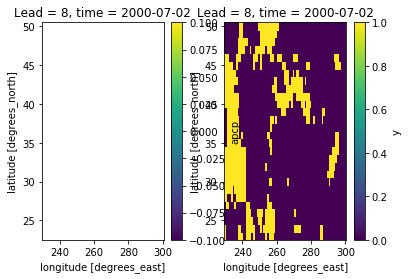

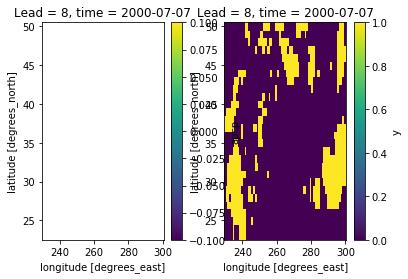

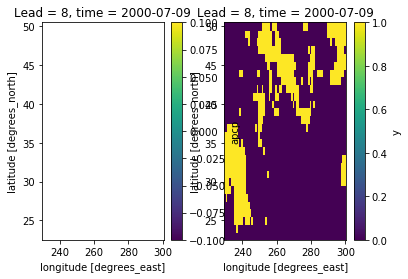

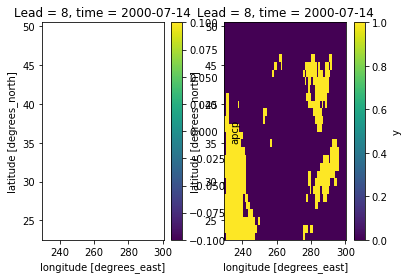

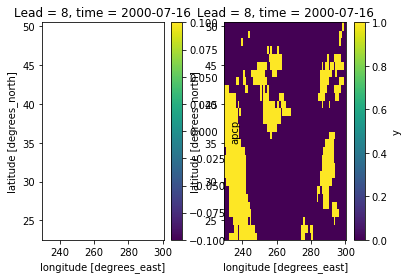

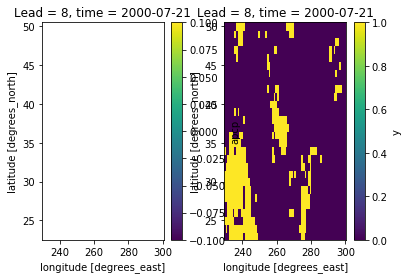

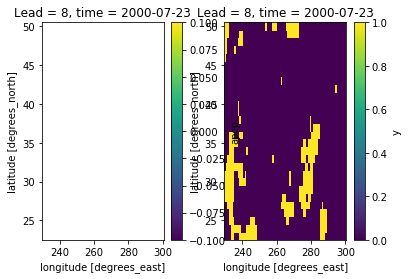

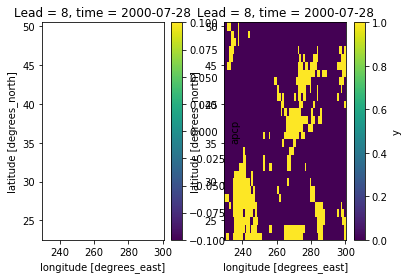

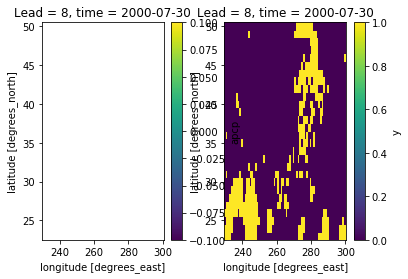

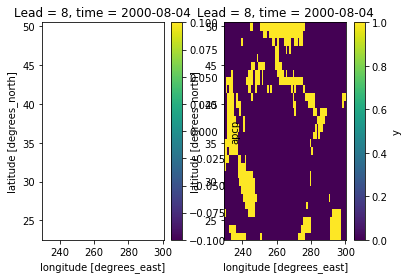

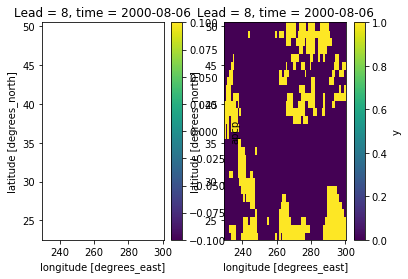

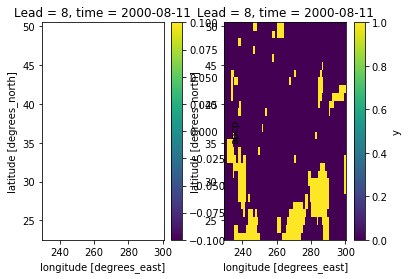

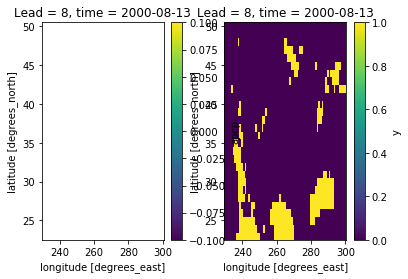

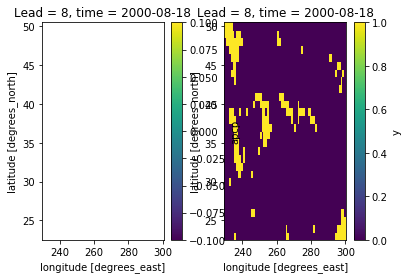

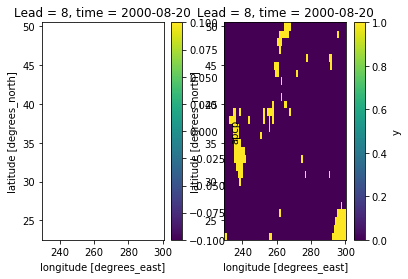

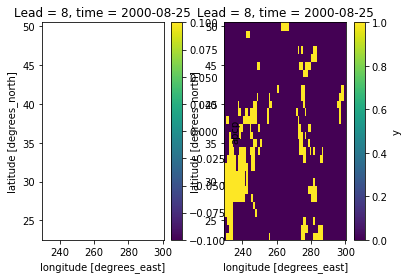

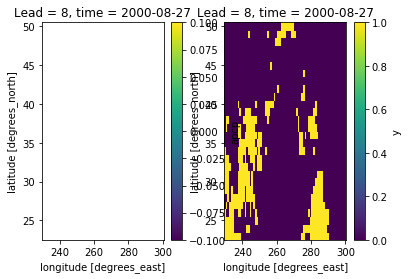

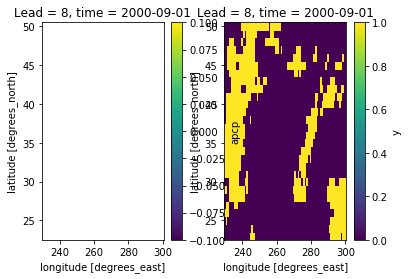

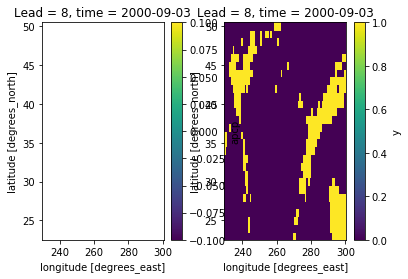

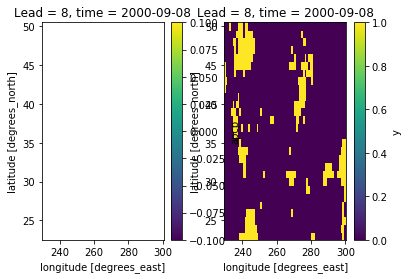

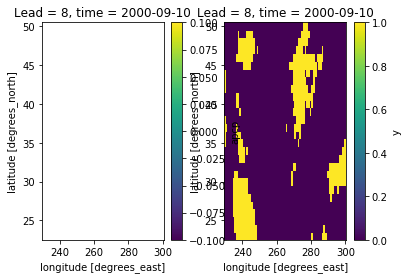

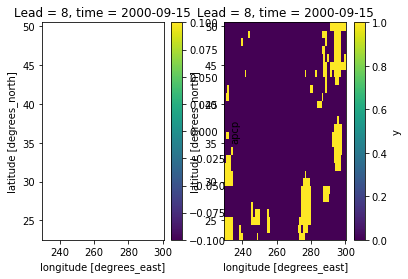

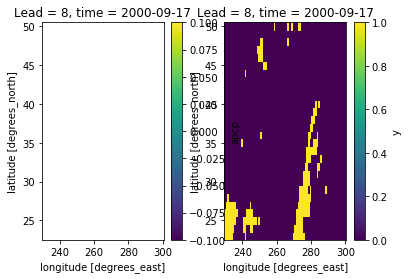

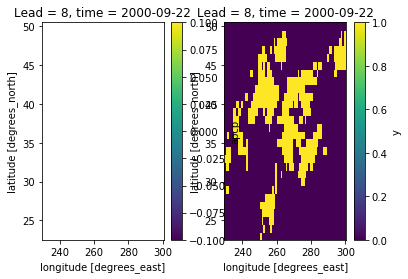

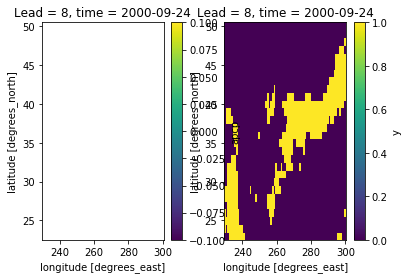

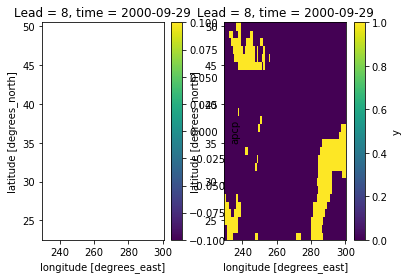

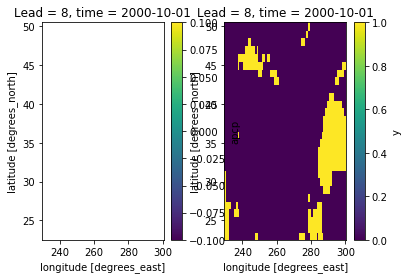

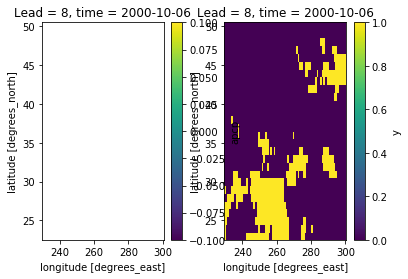

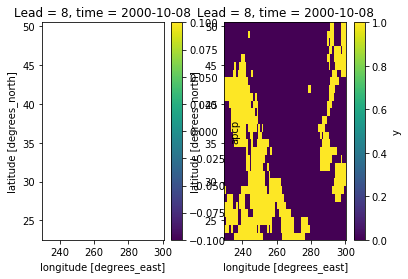

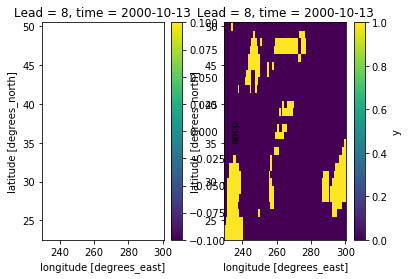

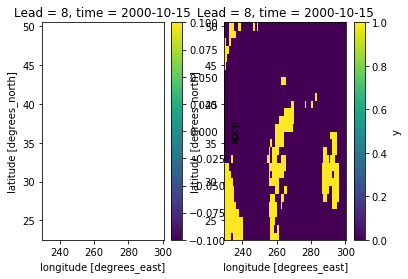

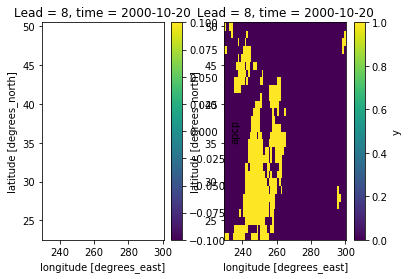

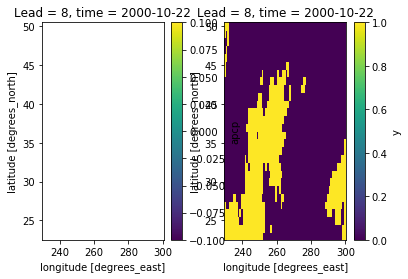

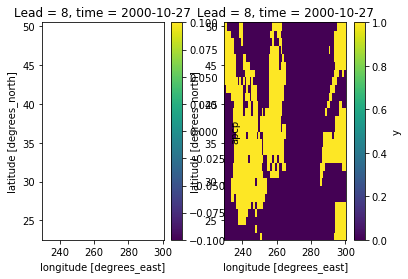

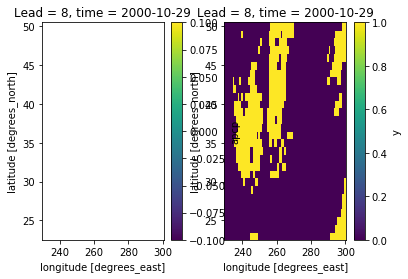

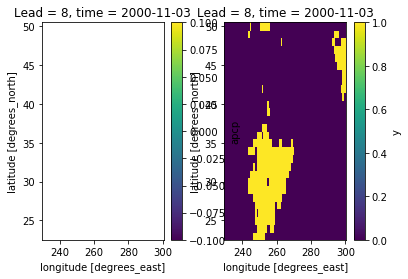

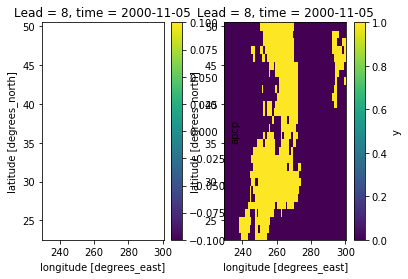

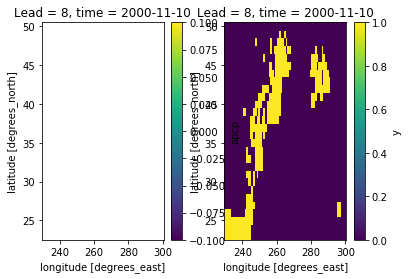

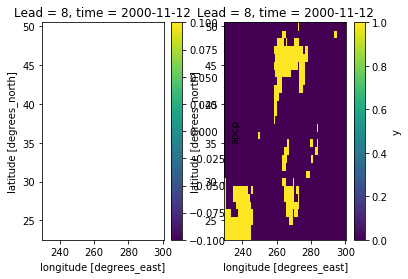

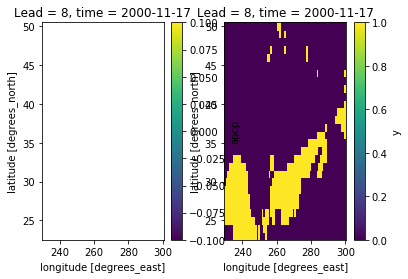

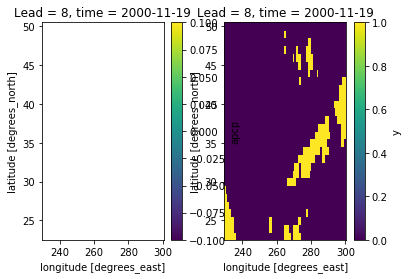

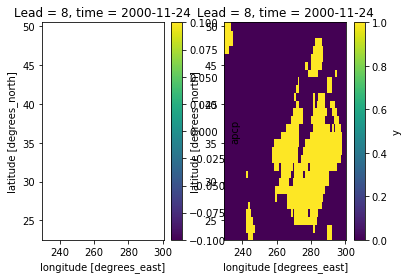

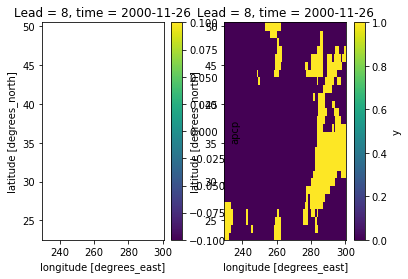

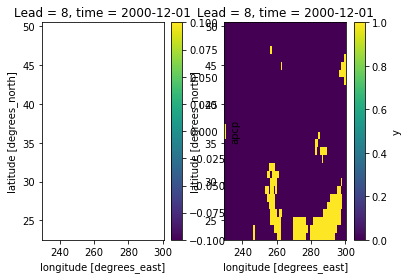

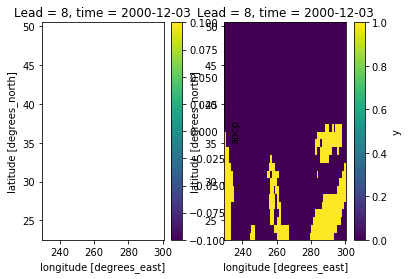

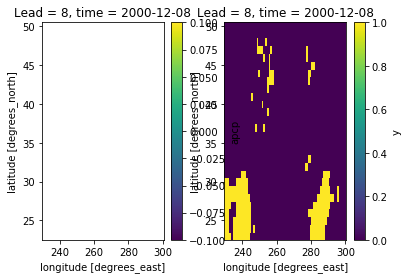

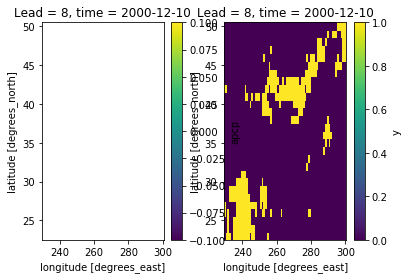

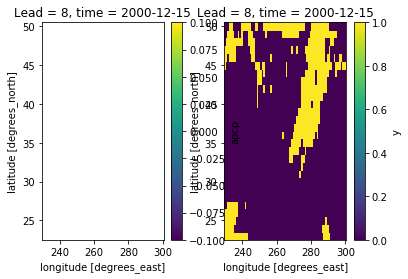

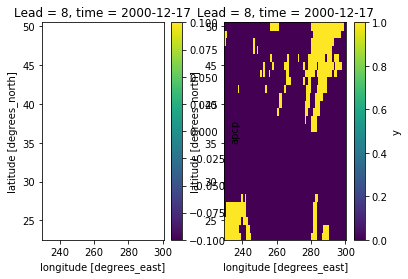

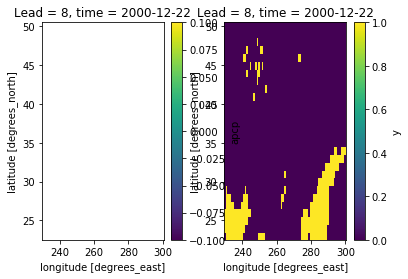

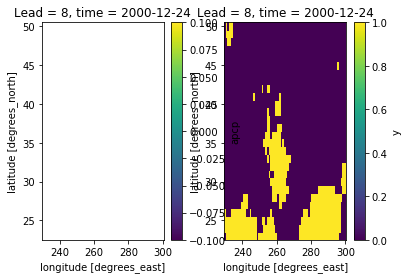

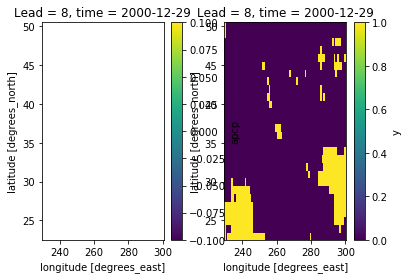

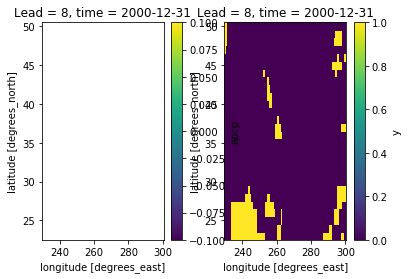

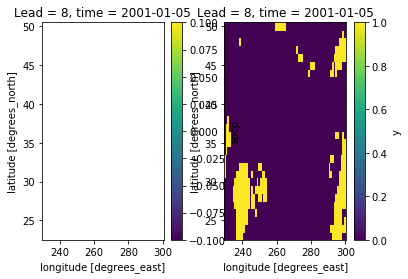

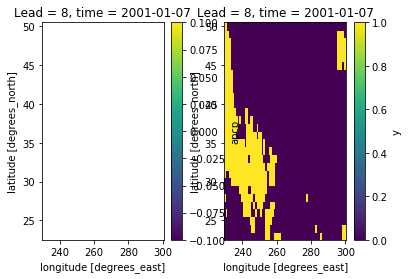

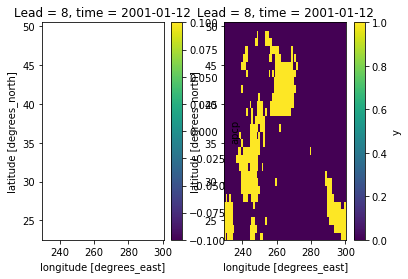

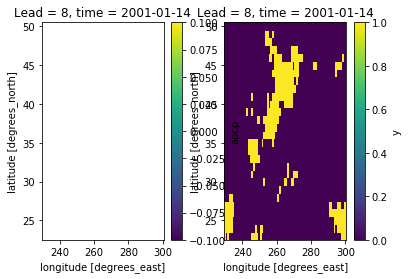

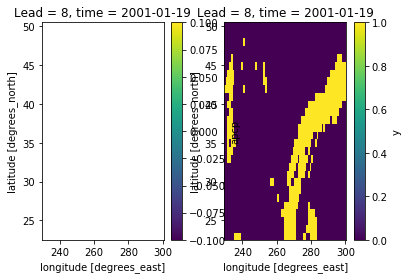

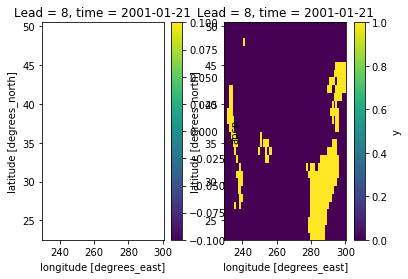

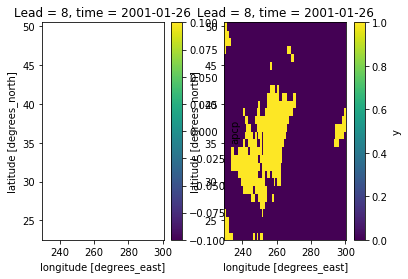

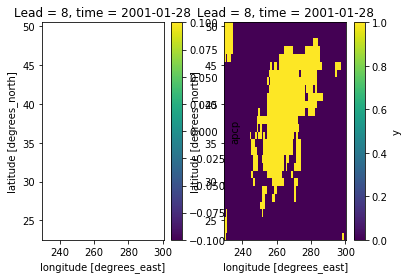

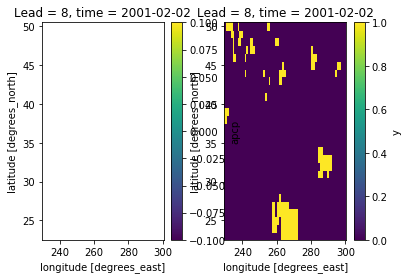

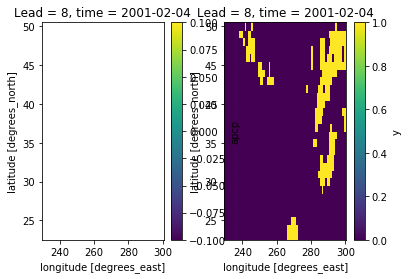

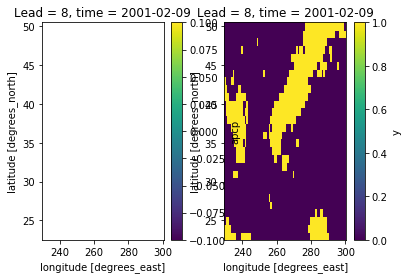

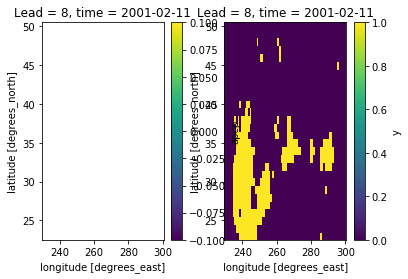

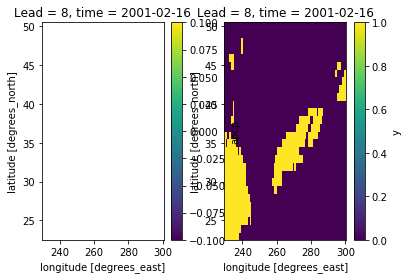

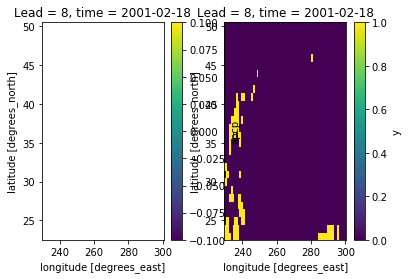

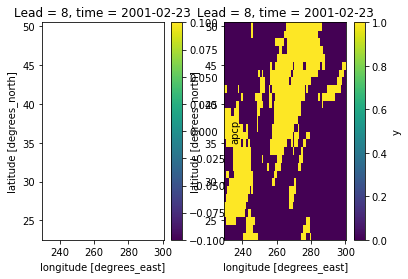

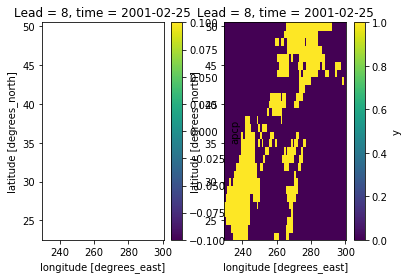

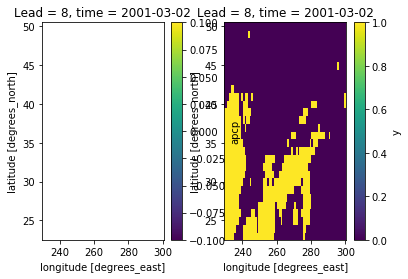

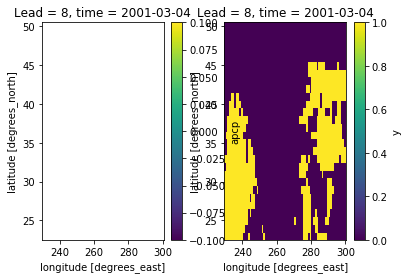

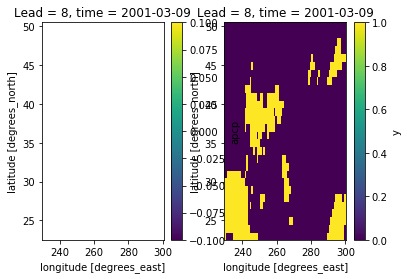

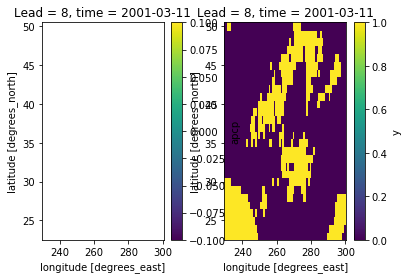

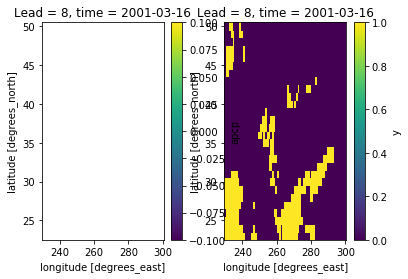

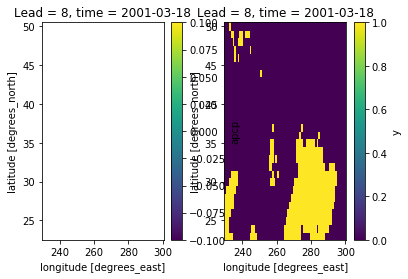

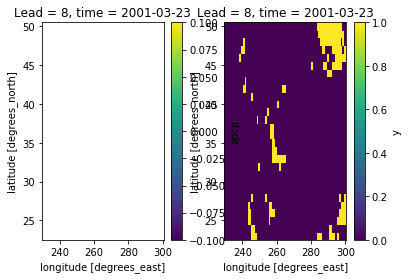

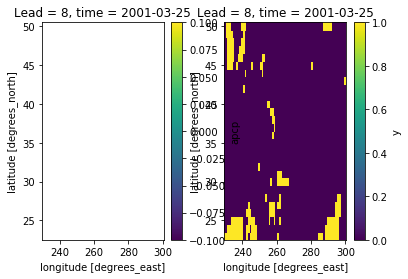

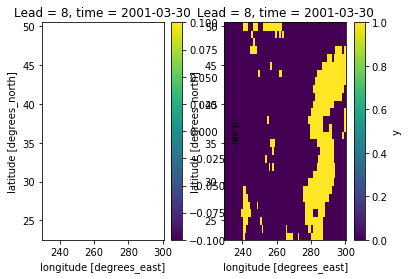

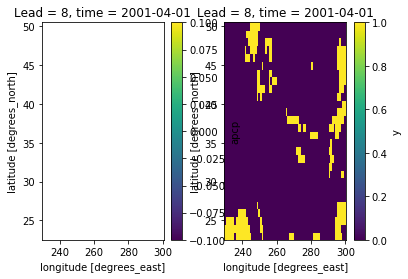

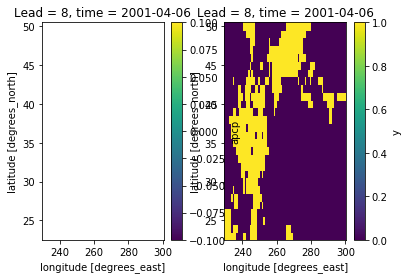

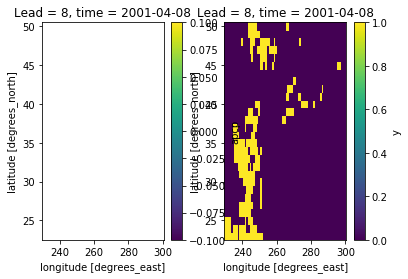

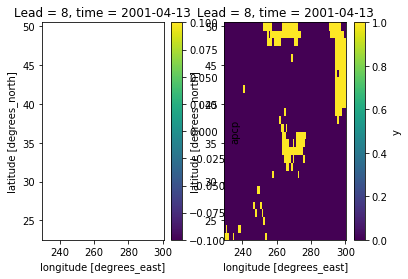

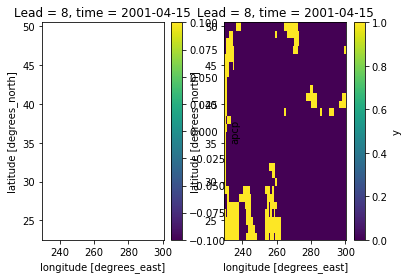

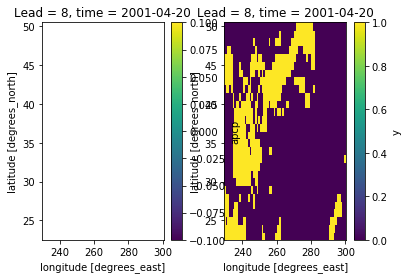

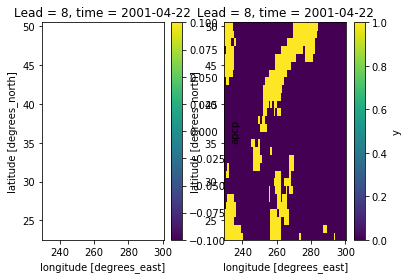

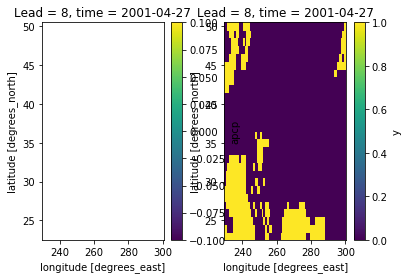

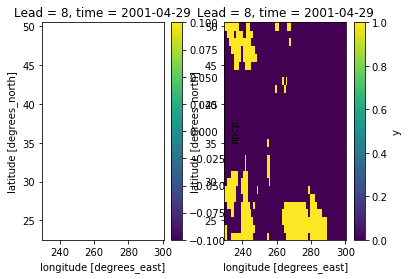

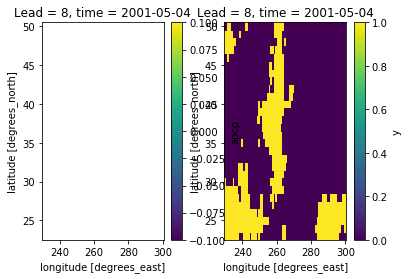

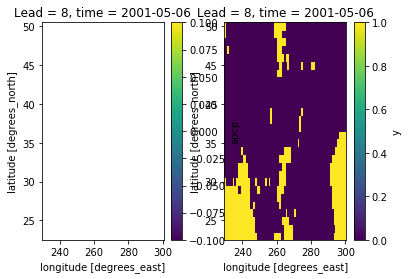

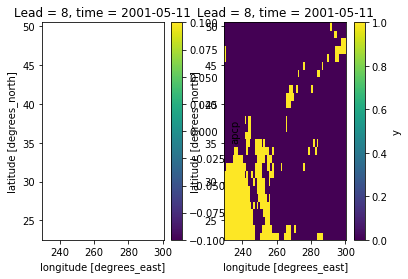

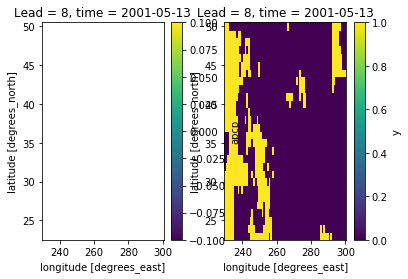

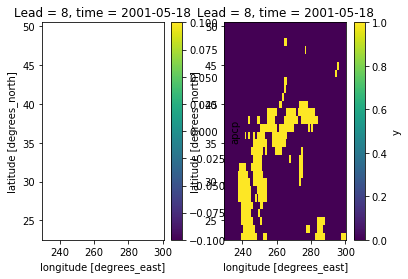

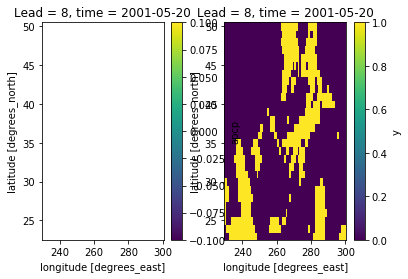

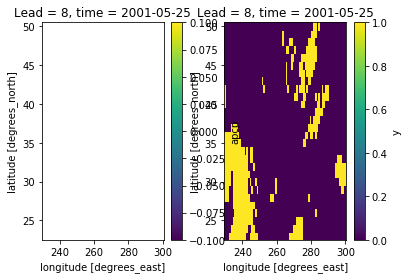

In [ ]:
for iT in ds_combined_meanM.time:
    if np.sum(np.isnan(ds_combined_meanM.isel(Lead=0).apcp.sel(time=iT))==0)==0:
        plt.figure(figsize=(10,3))
        ax1 = plt.subplot(141)
        ax2 = plt.subplot(142)
        ax3 = plt.subplot(143)
        ax4 = plt.subplot(144)
        ds_combined_meanM.isel(Lead=0).apcp.sel(time=iT).plot(ax=ax1)
        ds_combined_meanM.isel(Lead=1).apcp.sel(time=iT).plot(ax=ax1)
        ds_combined_meanM.isel(Lead=2).apcp.sel(time=iT).plot(ax=ax1)
        ds_combined_meanM.isel(Lead=0).y.sel(time=iT).plot(ax=ax2)


In [280]:
outu = xr.open_dataset('7x7out.nc')
outu = outu.rename({'__xarray_dataarray_variable__':'params'
})

function = outu.params[0]+outu.params[1]*ds_combined_meanM.isel(Lead=0).apcp
prob_est = np.exp(function)/(np.exp(function)+1)

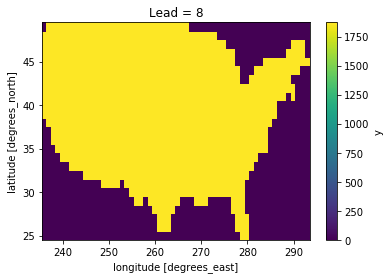

In [362]:
ds_combined_meanM.isel(Lead=0).y.where(np.isnan(ds_combined_meanM.isel(Lead=0).apcp)==1, drop=True).where(mask, drop=True).count('time').plot()

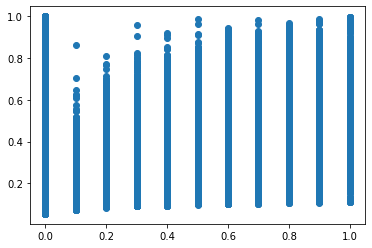

In [281]:
plt.plot(ds_combined_meanM.isel(Lead=0).apcp01.values.ravel(), prob_est.values.ravel(),'o')

In [283]:
prob_est.where(ds_combined_meanM.isel(Lead=0).apcp01==ip).mean()

<xarray.DataArray ()>
array(0.56015169)
Coordinates:
    Lead     int64 8

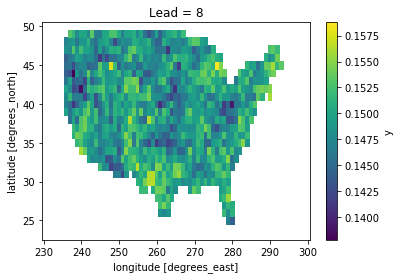

In [294]:
ds_combined_meanM.isel(Lead=0).y.mean('time').where(mask).plot()


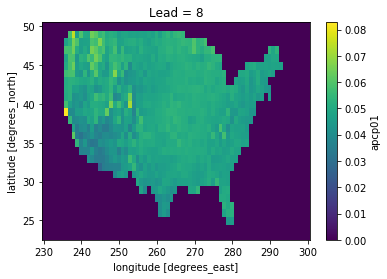

In [290]:
ds_combined_meanM.isel(Lead=0).apcp01.mean('time').plot()
mask = ds_combined_meanM.isel(Lead=0).apcp01.mean('time')>0

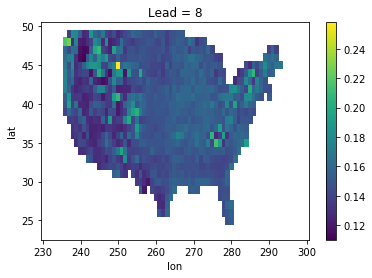

In [292]:
prob_est.mean('time').where(mask).plot()

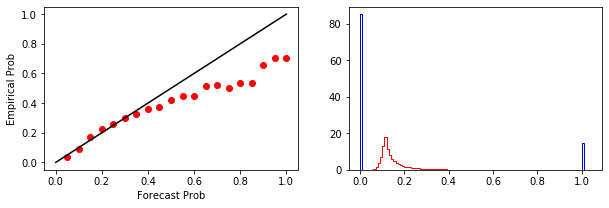

In [330]:
colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

for iL in np.arange(0,1):
    values_meanM = prob_est.where(mask).values.ravel()
    values_obs = ds_combined_meanM.y.where(mask).values.ravel()
    for ip in np.arange(0.05,1.05,0.05):
        vM = np.argwhere((values_meanM>=ip-0.025)&(values_meanM<=ip+0.025))
        vO = values_obs[vM]
        ax1.plot(ip,np.mean(vO),colcol[iL]+'o')
        
    ax2.hist(values_meanM, histtype='step',color=colcol[iL], bins=np.arange(0,1.05,0.01), density=True)
    ax2.hist(values_obs, histtype='step',color='b', bins=np.arange(0,1.05,0.01), density=True)
ax1.set_xlabel('Forecast Prob')
ax1.set_ylabel('Empirical Prob')
ax1.plot([0,1],[0,1],'k')

In [349]:
np.sum(np.isnan(values_meanM)==1)

4716630

(array([1475958.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  257514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

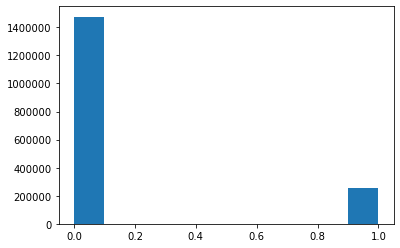

In [355]:
t1 = values_obs[np.isnan(values_meanM)]
t1[np.isnan(t1)==0]
plt.hist(t1[np.isnan(t1)==0])

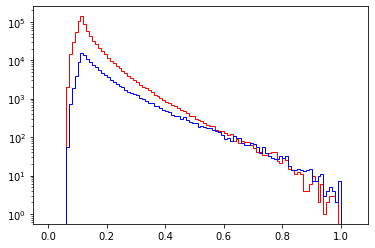

In [337]:
plt.hist(values_meanM[values_obs==0], histtype='step',color=colcol[iL], bins=np.arange(0,1.05,0.01))
plt.hist(values_meanM[values_obs==1], histtype='step',color='b', bins=np.arange(0,1.05,0.01))
plt.yscale('log')


In [343]:
values_obs

array([nan, nan, nan, ..., nan, nan, nan])

In [346]:
roc_auc_score(values_obs[values_meanM>=0], values_meanM[values_meanM>=0])

0.6654046842154727

In [339]:
np.nanmean(values_meanM[values_obs==0])

0.1433487502256882

In [340]:
np.nanmean(values_meanM[values_obs==1])

0.1863604781002529

In [326]:
values_obs

array([1., 1., 0., ..., 0., 1., 1.])

In [300]:
def correlate_target_clim(dsin):
    out = np.corrcoef(dsin.prob.values,dsin.y.values)
    out=out[0][1]
    return xr.DataArray(out)

In [303]:
corr_narri = []
for iL in np.arange(0,1):
    stack_f = prob_est.where(mask).to_dataset(name='prob').stack(allpoints=['lat','lon']) 
    stack_o = ds_combined_meanM.y.stack(allpoints=['lat','lon']) 
    ds_stack = xr.merge((xr.where(np.isnan(stack_f)==1, 0, stack_f), stack_o))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_narri.append(corr_clim_map)
corr_narr01_y_prob_est = xr.concat(corr_narri,dim='Lead')


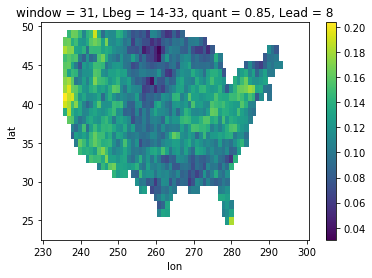

In [305]:
corr_narr01_gefs01.isel(Lead=0).plot()

In [318]:
prob_est.min()

<xarray.DataArray ()>
array(0.05366238)
Coordinates:
    Lead     int64 8

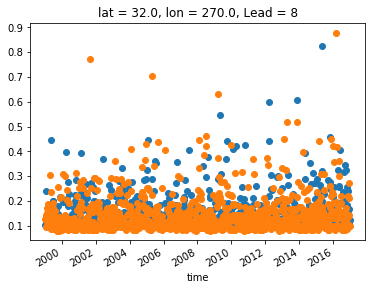

In [323]:
prob_est.sel(lat=31, lon=260).plot.line('o')
prob_est.sel(lat=32, lon=270).plot.line('o')
# ds_combined_meanM.y.sel(lat=31, lon=260).plot.line('o')

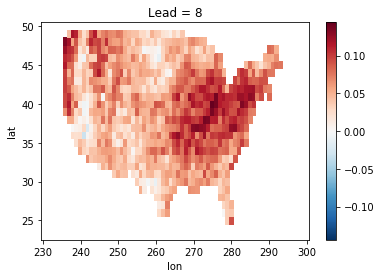

In [304]:
corr_narr01_y_prob_est.isel(Lead=0).plot()

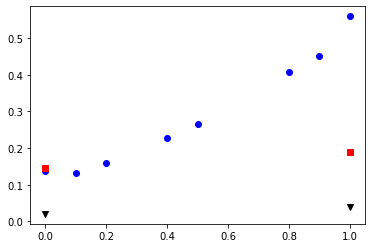

In [287]:
for ip in np.arange(0, 1.1, 0.1):
    plt.plot(ip, prob_est.where(ds_combined_meanM.isel(Lead=0).apcp01==ip).mean().values,'bo')
    plt.plot(ip, prob_est.where(ds_combined_meanM.isel(Lead=0).y==ip).mean().values,'rs')
    plt.plot(ip, 
             ds_combined_meanM.isel(Lead=0).apcp01.where(ds_combined_meanM.isel(Lead=0).y==ip).mean().values,'kv')

In [194]:
def fit_to_kernel(dsin, axis):
    print(dsin.shape)
    dsin = np.reshape(dsin, 
                      (dsin.shape[0], dsin.shape[1], dsin.shape[2], dsin.shape[3]*dsin.shape[4]))

    y = dsin[-1,]
    x = dsin[1:,]
    print(y.shape)
    print(x[0].shape)
#     df= dsin.to_dataframe()
#     df = df.reset_index()
#     df = df.set_index('time')
#     df = df.drop(columns=['Lead'])
#     df = df.dropna()
#     df['month'] = df.index.month
#     df['tas']  = df['tas']/3.
#     df['cape'] = df['cape']/3.

#     pick= random.sample(range(df.shape[0]), int(df.shape[0]/2))
#     pick = np.sort(pick)
#     picktest = missing_elements(pick,0,int(df.shape[0])-1)

#     train = df.iloc[pick]
#     test = df.iloc[picktest]
#     train['const']=1
#     test['const']=1
    logit_model=sm.Logit(y,x[0])
    resultall=logit_model.fit(disp=0,maxiter=100)
    return xr.DataArray(np.mean(dsin))

    

In [196]:
ds_fun = ds_fun.to_dataset(name='data')

In [198]:
ds_fun.rolling(lat=7, center=True).reduce(fit_to_kernel)

(6, 28, 71, 2809, 7)
(28, 71, 19663)
(28, 71, 19663)


ValueError: exog is not 1d or 2d

In [144]:
roll = ds_combined_meanM.isel(Lead=0).rolling(lat=7)#.reduce(fit_to_kernel, axis='time')
roll.construct("window_dim")

<xarray.Dataset>
Dimensions:    (lat: 28, lon: 71, time: 2809, window_dim: 7)
Coordinates:
  * lat        (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
    Lead       int64 8
  * lon        (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28
Dimensions without coordinates: window_dim
Data variables:
    apcp       (lat, lon, time, window_dim) float32 nan nan ... 10.898001
    tas        (lat, lon, time, window_dim) float32 nan nan ... 814.583 804.36
    cape       (lat, lon, time, window_dim) float32 nan nan nan ... 14.9 3.8
    apcp01     (lat, lon, time, window_dim) float64 nan nan nan ... 0.0 0.0 0.0
    apcp_diff  (lat, lon, time, window_dim) float64 nan nan nan ... nan nan nan
    y          (lat, lon, time, window_dim) float64 nan nan nan ... 0.0 0.0 1.0

In [130]:
ds_combined_meanM

<xarray.Dataset>
Dimensions:    (Lead: 3, lat: 28, lon: 71, time: 2809)
Coordinates:
  * lat        (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * Lead       (Lead) int64 8 10 12
  * lon        (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * time       (time) datetime64[ns] 1999-01-13 1999-01-15 ... 2016-12-28
Data variables:
    apcp       (lat, lon, time, Lead) float32 0.234 nan nan ... nan nan
    tas        (lat, lon, time, Lead) float32 875.1709 nan nan ... nan nan
    cape       (lat, lon, time, Lead) float32 7.2 nan nan nan ... 3.8 nan nan
    apcp01     (lat, lon, time, Lead) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    apcp_diff  (lat, lon, time, Lead) float64 nan nan nan nan ... nan nan nan
    y          (lat, lon, time) float64 1.0 1.0 0.0 0.0 1.0 ... 0.0 0.0 1.0 1.0

In [28]:
values_meanM = diff5.isel(Lead=iL).mean('M').values.ravel()
values_obs = diff_ds_narr5.transpose('lat','lon','time').values.ravel()


In [29]:
values_meanM

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
values_obs

array([1, 1, 0, ..., 0, 1, 1])

# CPC


In [65]:
cpc_out = cpc_out.rename({'rain':'apcp'})

In [66]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")

diff_ds_cpc = []
for iT in target_all:
    # extract values that correspond to the target dates
    temp = cpc_out.where((cpc_out.time.dt.month==iT.month.values[0])&
                          (cpc_out.time.dt.day==iT.day.values[0]), drop=True)
    smooth_data = cpc_clim_test_3d.isel(window=2).isel(quant=4).where((cpc_clim_test_3d.target_clim.dt.month==iT.month.values[0])&
                              (cpc_clim_test_3d.target_clim.dt.day==iT.day.values[0]), drop=True)
    #to match coordinates of the data
    smooth_data = smooth_data.rename({'target_clim':'time'})
    diff  = temp - smooth_data.isel(time=0) 
    diff_ds_cpc.append(diff)
diff_ds_cpc2 = xr.concat(diff_ds_cpc, dim='time')
diff_ds_cpc3 = diff_ds_cpc2.sortby('time')

In [67]:
diff3 = diff2.sortby('target_time')
cc = diff3.target_time-np.timedelta64(12, 'h')
cc = cc.sel(target_time=slice(diff_ds_cpc3.time[0],diff_ds_cpc3.time[-1]))
diff4 = diff3.sel(target_time=slice(diff_ds_cpc3.time[0],diff_ds_cpc3.time[-1]))
diff6 = xr.where(diff4.pr_sfc>0,1,0)

In [68]:
diff_ds_cpc3

<xarray.Dataset>
Dimensions:  (lat: 28, lon: 71, time: 6568)
Coordinates:
    window   int64 31
    quant    float64 0.85
  * lon      (lon) float64 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * lat      (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * time     (time) datetime64[ns] 1998-12-31 1999-01-01 ... 2016-12-29
Data variables:
    apcp     (time, lat, lon) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [69]:
diff_ds_cpc4 = diff_ds_cpc3.sel(time=cc.values)
diff_ds_cpc5 = xr.where(diff_ds_cpc4.apcp>0,1,0)

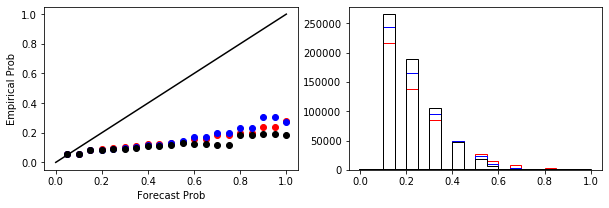

In [70]:
colcol = ['r','b','k']
plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)



In [93]:
corr_cpci = []
for iL in np.arange(0,3):
    stack_f = values_meanM = diff5.isel(Lead=iL).mean('M').stack(allpoints=['lat','lon']) 
    stack_o = diff_ds_cpc5.transpose('lat','lon','time') .stack(allpoints=['lat','lon']) 
    ds_stack = xr.merge((stack_f, stack_o))
    corr_clim = ds_stack.groupby('allpoints').apply(correlate_target_clim)
    corr_clim_map = corr_clim.unstack('allpoints')
    corr_clim_map = corr_clim_map.expand_dims('Lead')
    corr_cpci.append(corr_clim_map)
corr_cpc01_gefs01 = xr.concat(corr_cpci,dim='Lead')


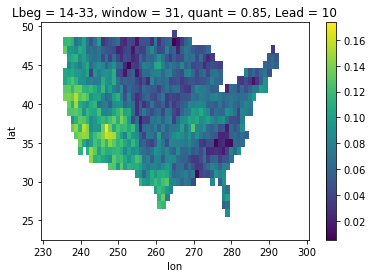

In [95]:
corr_cpc01_gefs01.sel(Lead=10).plot()

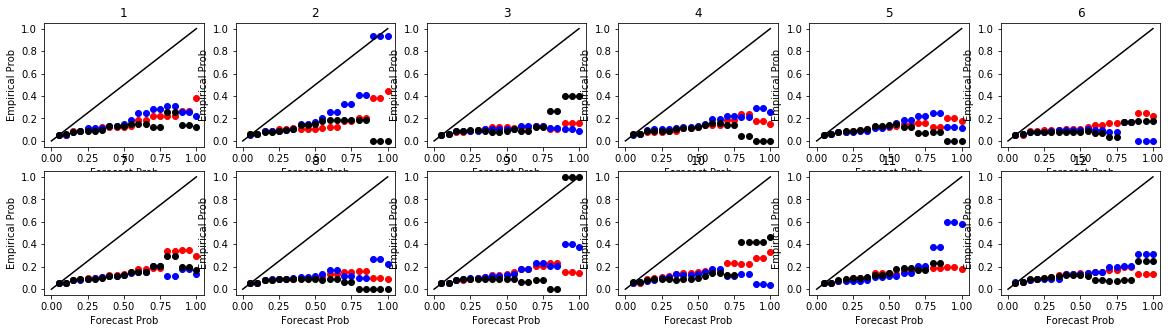

In [77]:
colcol = ['r','b','k']
fig =  plt.figure(figsize=(20,5))

for imonth in np.arange(1,13,1):
    ax1 = plt.subplot(2,6,imonth)
#     for iL in np.arange(0,3):
#         values_meanM = diff5.isel(Lead=iL).where(diff5.target_time.dt.month==imonth, drop=True).mean('M').values.ravel()
#         values_obs = diff_ds_narr5.where(diff_ds_narr5.time.dt.month==imonth, drop=True).transpose('lat','lon','time').values.ravel()
#         for ip in np.arange(0.05,1.05,0.05):
#             vM = np.argwhere((values_meanM>=ip-0.1)&(values_meanM<=ip))
#             vO = values_obs[vM]
#             ax1.plot(ip,np.mean(vO),colcol[iL]+'x')

#         plt.plot([0,1],[0,1],'-k')

    for iL in np.arange(0,3):
        values_meanM = diff6.isel(Lead=iL).where(diff6.target_time.dt.month==imonth, drop=True).mean('M').values.ravel()
        values_obs = diff_ds_cpc5.where(diff_ds_cpc5.time.dt.month==imonth, drop=True).transpose('lat','lon','time').values.ravel()
        for ip in np.arange(0.05,1.05,0.05):
            vM = np.argwhere((values_meanM>=ip-0.1)&(values_meanM<=ip))
            vO = values_obs[vM]
            ax1.plot(ip,np.mean(vO),colcol[iL]+'o')

    ax1.set_xlabel('Forecast Prob')
    ax1.set_ylabel('Empirical Prob')
    ax1.set_title(imonth)
    ax1.plot([0,1],[0,1],'k')


In [ ]:
box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)

LOGISTIC

In [96]:
all_variables_T3

<xarray.Dataset>
Dimensions:      (M: 10, lat: 28, lon: 71, target_time: 30987)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * target_time  (target_time) datetime64[ns] 1999-01-06T12:00:00 ... 2017-01-29T12:00:00
    St           (target_time) object (Timestamp('1999-01-06 00:00:00'), Timedelta('0 days 12:00:00')) ... (Timestamp('2016-12-28 00:00:00'), Timedelta('32 days 12:00:00'))
Data variables:
    pr_sfc       (M, lat, lon, target_time) float32 10.5 38.1 ... 1.0199976

In [106]:
# bits to extract the S and t of each target_time
y_ls = [y for (x,y) in all_variables_T3.St.values]
y_arr = np.array(y_ls)
different_lead1 = 8-1
different_lead2 = 8-1
    
all_variables_T3_L8 = all_variables_T3.sel(target_time=
                 (y_arr>=np.timedelta64(different_lead1,'D'))&
                 (y_arr<np.timedelta64(different_lead2+1,'D')))
    
all_variables_T3_L8

<xarray.Dataset>
Dimensions:      (M: 10, lat: 28, lon: 71, target_time: 939)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * target_time  (target_time) datetime64[ns] 1999-01-13T12:00:00 ... 2017-01-04T12:00:00
    St           (target_time) object (Timestamp('1999-01-06 00:00:00'), Timedelta('7 days 12:00:00')) ... (Timestamp('2016-12-28 00:00:00'), Timedelta('7 days 12:00:00'))
Data variables:
    pr_sfc       (M, lat, lon, target_time) float32 29.400002 ... 10.23

In [108]:
cc = all_variables_T3_L8.target_time-np.timedelta64(12, 'h')
cc = cc.sel(target_time=slice(narr_out.time[0],narr_out.time[-1]))
narr_out_time = narr_out.sel(time=cc)
all_variables_T3_L8 = all_variables_T3_L8.sel(target_time=cc+np.timedelta64(12, 'h'))

In [111]:
all_variables_T3_L8_mean = all_variables_T3_L8.mean('M')

In [110]:
narr_out_time

<xarray.Dataset>
Dimensions:      (lat: 28, lon: 71, target_time: 938)
Coordinates:
    time         (target_time) datetime64[ns] 1999-01-13 ... 2016-12-28
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * target_time  (target_time) datetime64[ns] 1999-01-13T12:00:00 ... 2016-12-28T12:00:00
    St           (target_time) object (Timestamp('1999-01-06 00:00:00'), Timedelta('7 days 12:00:00')) ... (Timestamp('2016-12-21 00:00:00'), Timedelta('7 days 12:00:00'))
Data variables:
    apcp         (target_time, lat, lon) float64 12.07 15.68 ... 22.33 22.07
Attributes:
    regrid_method:  bilinear